In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Создание ортологичных кластеров внутри таксона

In [ ]:
genomes10 = pd.read_csv('drive/MyDrive/group_project_bioinf/clusters/myproject.proteinortho', sep='\t')
genomes10.columns = genomes10.columns.map(lambda x: x.replace('protein', '_protein_'))
genomes10

,# Species,Genes,Alg.-Conn.,_protein_1.faa,_protein_10.faa,_protein_2.faa,_protein_3.faa,_protein_4.faa,_protein_5.faa,_protein_6.faa,_protein_7.faa,_protein_8.faa,_protein_9.faa
0,10,10,1.000,XP_041408609.1,EJS43772.1,SCW00957.1,XP_018210662.1,XP_007686571.1,KAG8205321.1,OEJ81173.1,EKJ79337.1,XP_752242.1,XP_003647986.1
1,10,10,1.000,XP_041404458.1,EJS43804.1,SCW01074.1,XP_018212049.1,XP_007692909.1,KAG8211841.1,OEJ81175.1,EKJ68299.1,XP_747357.1,XP_003647410.1
2,9,9,1.000,XP_041406909.1,*,SCW03569.1,XP_018213131.1,XP_007684881.1,KAG8206147.1,OEJ81176.1,EKJ73650.1,XP_755486.1,XP_003645100.1
3,10,10,1.000,XP_041404300.1,EJS41670.1,SCW02338.1,XP_018210650.1,XP_007687408.1,KAG8212437.1,OEJ81179.1,EKJ73895.1,XP_752650.1,XP_003644872.1
4,10,11,0.168,XP_041405447.1,EJS42115.1,SCW04580.1,XP_018212816.1,"XP_007689867.1,XP_007690531.1",KAG8207719.1,OEJ81180.1,EKJ75630.1,XP_753421.1,XP_003645826.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,2,2,1.000,*,*,*,*,*,*,OEJ82253.1,*,*,XP_003645024.1
10107,2,2,1.000,*,*,*,*,*,*,OEJ87457.1,*,*,XP_003645386.1
10108,2,2,1.000,*,*,*,*,*,*,OEJ87790.1,*,*,XP_003646765.1
10109,2,2,1.000,*,*,*,*,*,*,OEJ91420.1,*,*,XP_003644518.1


In [ ]:
file_names_proteinortho = [
                           '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/myproject.proteinortho',
                           '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/myproject.proteinortho',
                           '/content/drive/MyDrive/group_project_bioinf/Коновалов_Егор/myproject.proteinortho',
                           '/content/drive/MyDrive/group_project_bioinf/Крымов_Александр/myproject.proteinortho',
                           '/content/drive/MyDrive/group_project_bioinf/Михайлова_Ксения/myproject.proteinortho.txt',
                           '/content/drive/MyDrive/group_project_bioinf/Петропавловский_Андрей/myproject.proteinortho',
                           '/content/drive/MyDrive/group_project_bioinf/Сесикова_Ксения/myproject.proteinortho',
                           '/content/drive/MyDrive/group_project_bioinf/Чекова_Милена/myproject.proteinortho',
                           '/content/drive/MyDrive/group_project_bioinf/Шагалкина_Дарья/myproject.proteinortho',
                           '/content/drive/MyDrive/group_project_bioinf/Шилова_Ксения/myproject.proteinortho'
]
faa_names_main = [
            'Kazachstania_barnettii_protein.faa',
            'protein1.faa',
            'protein_op.faa',
            'Bipolaris_oryzae_ATCC_44560.faa',
            'Trichophyton_interdigitale.faa',
            'GCA_001749795.1.protein.faa',
            'GCA_000303195.2_FP7_protein.faa',
            'GCF_000002655.1_ASM265v1_protein.faa',
            'GCF_000235365.1_protein.faa',
            'GCA_000292725.1.faa'
]


df - таблицы с нашими отдельными кластеризациями

In [ ]:
df = []
for i in range(10):
  df.append(pd.read_csv(file_names_proteinortho[i], sep='\t'))

Создаем таблицу с кластеризацией всех 50-ти файлов

In [ ]:
genomes50 = genomes10.copy()
for i in range(10):
  for col_name in list(df[i].columns)[3:]:
    genomes50[col_name] = ['*'] * genomes50.shape[0]
genomes50.head(7)

,# Species,Genes,Alg.-Conn.,_protein_1.faa,_protein_10.faa,_protein_2.faa,_protein_3.faa,_protein_4.faa,_protein_5.faa,_protein_6.faa,...,GCF_000026945.1_ASM2694v1_protein.faa,GCF_000091025.4_ASM9102v4_protein.faa,GCF_000182965.3_ASM18296v3_protein.faa,GCF_000235365.1_ASM23536v1_protein.faa,GCF_000315875.1_ASM31587v1_protein.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
0,10,10,1.000,XP_041408609.1,EJS43772.1,SCW00957.1,XP_018210662.1,XP_007686571.1,KAG8205321.1,OEJ81173.1,...,*,*,*,*,*,*,*,*,*,*
1,10,10,1.000,XP_041404458.1,EJS43804.1,SCW01074.1,XP_018212049.1,XP_007692909.1,KAG8211841.1,OEJ81175.1,...,*,*,*,*,*,*,*,*,*,*
2,9,9,1.000,XP_041406909.1,*,SCW03569.1,XP_018213131.1,XP_007684881.1,KAG8206147.1,OEJ81176.1,...,*,*,*,*,*,*,*,*,*,*
3,10,10,1.000,XP_041404300.1,EJS41670.1,SCW02338.1,XP_018210650.1,XP_007687408.1,KAG8212437.1,OEJ81179.1,...,*,*,*,*,*,*,*,*,*,*
4,10,11,0.168,XP_041405447.1,EJS42115.1,SCW04580.1,XP_018212816.1,"XP_007689867.1,XP_007690531.1",KAG8207719.1,OEJ81180.1,...,*,*,*,*,*,*,*,*,*,*
5,10,10,1.000,XP_041405497.1,EJS41639.1,SCW03442.1,XP_018212971.1,XP_007685624.1,KAG8205908.1,OEJ81181.1,...,*,*,*,*,*,*,*,*,*,*
6,9,9,1.000,XP_041407532.1,EJS42398.1,SCW04199.1,XP_018211487.1,XP_007685044.1,*,OEJ81184.1,...,*,*,*,*,*,*,*,*,*,*


In [ ]:
# проходим по всем кластерам
for i in range(genomes10.shape[0]):
  for j in range(10):
    genome10_col_name = '_protein_'+str(j+1)+'.faa'
    prot_to_find = genomes10[genome10_col_name][i]
    # ищем в датафрейме под номером j
    for df_col_name in df[j].columns[3:]:
      # Если нашли нужный белок в какой-нибудь колонке
      if prot_to_find in list(df[j][df_col_name]):
        # ищем индекс этой строки - кластера который нужно вставить в общую таблицу
        ind = list(df[j][df_col_name]).index(prot_to_find)
        # вставляем строку в таблицу genomes50
        for df_col_name in df[j].columns[3:]:
          genomes50[df_col_name][i] = df[j][df_col_name][ind]
        break
genomes50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,# Species,Genes,Alg.-Conn.,_protein_1.faa,_protein_10.faa,_protein_2.faa,_protein_3.faa,_protein_4.faa,_protein_5.faa,_protein_6.faa,...,GCF_000026945.1_ASM2694v1_protein.faa,GCF_000091025.4_ASM9102v4_protein.faa,GCF_000182965.3_ASM18296v3_protein.faa,GCF_000235365.1_ASM23536v1_protein.faa,GCF_000315875.1_ASM31587v1_protein.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
0,10,10,1.000,XP_041408609.1,EJS43772.1,SCW00957.1,XP_018210662.1,XP_007686571.1,KAG8205321.1,OEJ81173.1,...,XP_002418283.1,NP_986680.1,XP_721019.2,XP_003647986.1,XP_003866934.1,XP_003669940.1,XP_003673140.1,EJS43772.1,XP_018222186.1,XP_033766318.1
1,10,10,1.000,XP_041404458.1,EJS43804.1,SCW01074.1,XP_018212049.1,XP_007692909.1,KAG8211841.1,OEJ81175.1,...,XP_002418126.1,NP_985742.1,XP_722518.1,XP_003647410.1,XP_003866532.1,XP_003668469.1,"XP_003674903.1,XP_003675007.1",EJS43804.1,XP_018222057.1,XP_033766188.1
2,9,9,1.000,XP_041406909.1,*,SCW03569.1,XP_018213131.1,XP_007684881.1,KAG8206147.1,OEJ81176.1,...,XP_002422135.1,NP_984155.2,XP_713488.2,XP_003645100.1,XP_003869489.1,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
3,10,10,1.000,XP_041404300.1,EJS41670.1,SCW02338.1,XP_018210650.1,XP_007687408.1,KAG8212437.1,OEJ81179.1,...,XP_002418262.1,NP_985684.1,XP_715332.2,XP_003644872.1,XP_003866918.1,XP_003669045.1,XP_003677882.1,EJS41670.1,XP_018219354.1,XP_033769271.1
4,10,11,0.168,XP_041405447.1,EJS42115.1,SCW04580.1,XP_018212816.1,"XP_007689867.1,XP_007690531.1",KAG8207719.1,OEJ81180.1,...,XP_002420421.1,NP_984663.1,XP_715717.2,XP_003645826.1,XP_003870319.1,XP_003668006.1,XP_003673930.1,EJS42115.1,XP_018219604.1,XP_033768672.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,2,2,1.000,*,*,*,*,*,*,OEJ82253.1,...,XP_002420286.1,*,XP_715419.2,XP_003645024.1,XP_003867264.1,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10107,2,2,1.000,*,*,*,*,*,*,OEJ87457.1,...,XP_002416814.1,NP_982719.1,XP_718158.1,XP_003645386.1,XP_003868172.1,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10108,2,2,1.000,*,*,*,*,*,*,OEJ87790.1,...,"XP_002418741.1,XP_002421397.1,XP_002421400.1",*,XP_716059.2,XP_003646765.1,*,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10109,2,2,1.000,*,*,*,*,*,*,OEJ91420.1,...,XP_002421786.1,NP_986078.1,XP_718277.1,XP_003644518.1,*,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1


In [ ]:
cols = genomes50.columns[13:]
len(cols)

50

# 2. Статистика по всем кластерам

Считаем количество видов в кластерах

In [ ]:
# 50 min
genomes50['# Species'] = [50 - (genomes50[cols].T[i] == '*').sum() for i in range(genomes50.shape[0])]
print(genomes50.shape)
genomes50 = genomes50[genomes50['# Species'] >= 25]
print(genomes50.shape)

(10111, 63)
(10035, 63)


In [ ]:
genomes50.index = range(genomes50.shape[0])

In [ ]:
summs = []
for i in range(genomes50.shape[0]):
  if i%500 == 0:
    print(i, 'out of', genomes50.shape[0])
  summ = 0 
  for col in cols:    
    if genomes50[col][i] != '*':
      if ',' in genomes50[col][i]:
        l = len(genomes50[col][i].split(','))
      else:
        l = 1
    else:
      l = 0
    summ += l
  summs.append(summ)  
genomes50['Genes'] = summs

0 out of 10035
500 out of 10035
1000 out of 10035
1500 out of 10035
2000 out of 10035
2500 out of 10035
3000 out of 10035
3500 out of 10035
4000 out of 10035
4500 out of 10035
5000 out of 10035
5500 out of 10035
6000 out of 10035
6500 out of 10035
7000 out of 10035
7500 out of 10035
8000 out of 10035
8500 out of 10035
9000 out of 10035
9500 out of 10035
10000 out of 10035


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
genomes50

,# Species,Genes,Alg.-Conn.,_protein_1.faa,_protein_10.faa,_protein_2.faa,_protein_3.faa,_protein_4.faa,_protein_5.faa,_protein_6.faa,...,GCF_000026945.1_ASM2694v1_protein.faa,GCF_000091025.4_ASM9102v4_protein.faa,GCF_000182965.3_ASM18296v3_protein.faa,GCF_000235365.1_ASM23536v1_protein.faa,GCF_000315875.1_ASM31587v1_protein.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
0,50,50,1.000,XP_041408609.1,EJS43772.1,SCW00957.1,XP_018210662.1,XP_007686571.1,KAG8205321.1,OEJ81173.1,...,XP_002418283.1,NP_986680.1,XP_721019.2,XP_003647986.1,XP_003866934.1,XP_003669940.1,XP_003673140.1,EJS43772.1,XP_018222186.1,XP_033766318.1
1,49,50,1.000,XP_041404458.1,EJS43804.1,SCW01074.1,XP_018212049.1,XP_007692909.1,KAG8211841.1,OEJ81175.1,...,XP_002418126.1,NP_985742.1,XP_722518.1,XP_003647410.1,XP_003866532.1,XP_003668469.1,"XP_003674903.1,XP_003675007.1",EJS43804.1,XP_018222057.1,XP_033766188.1
2,47,47,1.000,XP_041406909.1,*,SCW03569.1,XP_018213131.1,XP_007684881.1,KAG8206147.1,OEJ81176.1,...,XP_002422135.1,NP_984155.2,XP_713488.2,XP_003645100.1,XP_003869489.1,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
3,49,49,1.000,XP_041404300.1,EJS41670.1,SCW02338.1,XP_018210650.1,XP_007687408.1,KAG8212437.1,OEJ81179.1,...,XP_002418262.1,NP_985684.1,XP_715332.2,XP_003644872.1,XP_003866918.1,XP_003669045.1,XP_003677882.1,EJS41670.1,XP_018219354.1,XP_033769271.1
4,43,43,0.168,XP_041405447.1,EJS42115.1,SCW04580.1,XP_018212816.1,"XP_007689867.1,XP_007690531.1",KAG8207719.1,OEJ81180.1,...,XP_002420421.1,NP_984663.1,XP_715717.2,XP_003645826.1,XP_003870319.1,XP_003668006.1,XP_003673930.1,EJS42115.1,XP_018219604.1,XP_033768672.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,29,33,1.000,*,*,*,*,*,*,OEJ82253.1,...,XP_002420286.1,*,XP_715419.2,XP_003645024.1,XP_003867264.1,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10031,30,34,1.000,*,*,*,*,*,*,OEJ87457.1,...,XP_002416814.1,NP_982719.1,XP_718158.1,XP_003645386.1,XP_003868172.1,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10032,30,36,1.000,*,*,*,*,*,*,OEJ87790.1,...,"XP_002418741.1,XP_002421397.1,XP_002421400.1",*,XP_716059.2,XP_003646765.1,*,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10033,29,33,1.000,*,*,*,*,*,*,OEJ91420.1,...,XP_002421786.1,NP_986078.1,XP_718277.1,XP_003644518.1,*,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1


Text(0.5, 1.0, 'Species in clusters')

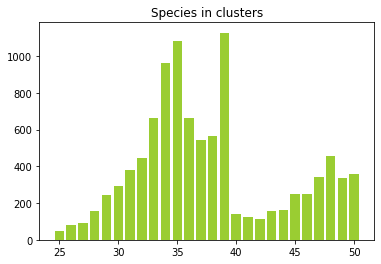

In [ ]:
plt.bar(range(np.min(genomes50['# Species']), np.max(genomes50['# Species']) + 1),
        height=[ genomes50[genomes50['# Species']==i].shape[0] for i in range(np.min(genomes50['# Species']),
                               np.max(genomes50['# Species'])+1) ], color='yellowgreen')
plt.title('Species in clusters')

Text(0.5, 1.0, 'Genes in clusters')

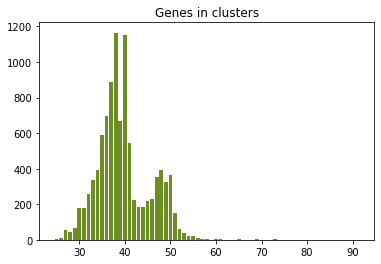

In [ ]:
plt.bar(range(np.min(genomes50['Genes']), np.max(genomes50['Genes']) + 1),
        height=[ genomes50[genomes50['Genes']==i].shape[0] for i in range(np.min(genomes50['Genes']),
                               np.max(genomes50['Genes'])+1) ], color='OliveDrab')
plt.title('Genes in clusters')

In [ ]:
np.savetxt('drive/MyDrive/group_project_bioinf/genomes50_1.txt', genomes50.values, delimiter='\t', fmt = '%s')

In [ ]:
genomes50.head(10)

,# Species,Genes,Alg.-Conn.,_protein_1.faa,_protein_10.faa,_protein_2.faa,_protein_3.faa,_protein_4.faa,_protein_5.faa,_protein_6.faa,...,GCF_000026945.1_ASM2694v1_protein.faa,GCF_000091025.4_ASM9102v4_protein.faa,GCF_000182965.3_ASM18296v3_protein.faa,GCF_000235365.1_ASM23536v1_protein.faa,GCF_000315875.1_ASM31587v1_protein.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
0,50,50,1.000,XP_041408609.1,EJS43772.1,SCW00957.1,XP_018210662.1,XP_007686571.1,KAG8205321.1,OEJ81173.1,...,XP_002418283.1,NP_986680.1,XP_721019.2,XP_003647986.1,XP_003866934.1,XP_003669940.1,XP_003673140.1,EJS43772.1,XP_018222186.1,XP_033766318.1
1,49,50,1.000,XP_041404458.1,EJS43804.1,SCW01074.1,XP_018212049.1,XP_007692909.1,KAG8211841.1,OEJ81175.1,...,XP_002418126.1,NP_985742.1,XP_722518.1,XP_003647410.1,XP_003866532.1,XP_003668469.1,"XP_003674903.1,XP_003675007.1",EJS43804.1,XP_018222057.1,XP_033766188.1
2,47,47,1.000,XP_041406909.1,*,SCW03569.1,XP_018213131.1,XP_007684881.1,KAG8206147.1,OEJ81176.1,...,XP_002422135.1,NP_984155.2,XP_713488.2,XP_003645100.1,XP_003869489.1,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
3,49,49,1.000,XP_041404300.1,EJS41670.1,SCW02338.1,XP_018210650.1,XP_007687408.1,KAG8212437.1,OEJ81179.1,...,XP_002418262.1,NP_985684.1,XP_715332.2,XP_003644872.1,XP_003866918.1,XP_003669045.1,XP_003677882.1,EJS41670.1,XP_018219354.1,XP_033769271.1
4,43,43,0.168,XP_041405447.1,EJS42115.1,SCW04580.1,XP_018212816.1,"XP_007689867.1,XP_007690531.1",KAG8207719.1,OEJ81180.1,...,XP_002420421.1,NP_984663.1,XP_715717.2,XP_003645826.1,XP_003870319.1,XP_003668006.1,XP_003673930.1,EJS42115.1,XP_018219604.1,XP_033768672.1
5,49,49,1.000,XP_041405497.1,EJS41639.1,SCW03442.1,XP_018212971.1,XP_007685624.1,KAG8205908.1,OEJ81181.1,...,XP_002419883.1,NP_986897.1,XP_720524.1,XP_003647772.1,XP_003869889.1,XP_003670223.1,XP_003674636.1,EJS41639.1,XP_018219407.1,XP_033769326.1
6,44,44,1.000,XP_041407532.1,EJS42398.1,SCW04199.1,XP_018211487.1,XP_007685044.1,*,OEJ81184.1,...,XP_002419255.1,NP_986481.1,XP_720026.2,XP_003646127.1,XP_003867537.1,XP_003672241.1,XP_003674810.1,EJS42398.1,XP_018223702.1,XP_033765382.1
7,47,48,1.000,XP_041407868.1,*,SCW02243.1,XP_018212655.1,XP_007685799.1,KAG8206332.1,OEJ81187.1,...,"XP_002418221.1,XP_002418248.1",NP_986964.2,XP_715352.2,XP_003647044.1,XP_003866835.1,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
8,39,45,0.165,"XP_041407928.1,XP_041408467.1",EJS41381.1,SCW03552.1,XP_018209945.1,*,KAG8209043.1,"OEJ81188.1,OEJ81520.1,OEJ81521.1",...,"XP_002419498.1,XP_002420602.1",NP_984243.2,"XP_019330876.1,XP_712033.2",XP_003645716.1,*,XP_003670363.1,XP_003675590.1,EJS41381.1,XP_018218980.1,XP_033769715.1
9,42,42,0.182,XP_041405525.1,EJS44730.1,SCW03610.1,XP_018213191.1,XP_007685746.1,"KAG8206795.1,KAG8209389.1",OEJ81191.1,...,XP_002418391.1,NP_984608.1,XP_712925.1,XP_003647718.1,XP_003867652.1,XP_003669456.1,XP_003674672.1,EJS44730.1,XP_018223222.1,XP_033764784.1


# Z-DNA в промотерах

In [ ]:
genomes50 = pd.read_csv('drive/MyDrive/group_project_bioinf/genomes50_1.txt', sep='\t', names = genomes50.columns)
genomes50

,# Species,Genes,Alg.-Conn.,_protein_1.faa,_protein_10.faa,_protein_2.faa,_protein_3.faa,_protein_4.faa,_protein_5.faa,_protein_6.faa,...,GCF_000026945.1_ASM2694v1_protein.faa,GCF_000091025.4_ASM9102v4_protein.faa,GCF_000182965.3_ASM18296v3_protein.faa,GCF_000235365.1_ASM23536v1_protein.faa,GCF_000315875.1_ASM31587v1_protein.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
0,50,50,1.000,XP_041408609.1,EJS43772.1,SCW00957.1,XP_018210662.1,XP_007686571.1,KAG8205321.1,OEJ81173.1,...,XP_002418283.1,NP_986680.1,XP_721019.2,XP_003647986.1,XP_003866934.1,XP_003669940.1,XP_003673140.1,EJS43772.1,XP_018222186.1,XP_033766318.1
1,49,50,1.000,XP_041404458.1,EJS43804.1,SCW01074.1,XP_018212049.1,XP_007692909.1,KAG8211841.1,OEJ81175.1,...,XP_002418126.1,NP_985742.1,XP_722518.1,XP_003647410.1,XP_003866532.1,XP_003668469.1,"XP_003674903.1,XP_003675007.1",EJS43804.1,XP_018222057.1,XP_033766188.1
2,47,47,1.000,XP_041406909.1,*,SCW03569.1,XP_018213131.1,XP_007684881.1,KAG8206147.1,OEJ81176.1,...,XP_002422135.1,NP_984155.2,XP_713488.2,XP_003645100.1,XP_003869489.1,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
3,49,49,1.000,XP_041404300.1,EJS41670.1,SCW02338.1,XP_018210650.1,XP_007687408.1,KAG8212437.1,OEJ81179.1,...,XP_002418262.1,NP_985684.1,XP_715332.2,XP_003644872.1,XP_003866918.1,XP_003669045.1,XP_003677882.1,EJS41670.1,XP_018219354.1,XP_033769271.1
4,43,43,0.168,XP_041405447.1,EJS42115.1,SCW04580.1,XP_018212816.1,"XP_007689867.1,XP_007690531.1",KAG8207719.1,OEJ81180.1,...,XP_002420421.1,NP_984663.1,XP_715717.2,XP_003645826.1,XP_003870319.1,XP_003668006.1,XP_003673930.1,EJS42115.1,XP_018219604.1,XP_033768672.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,29,33,1.000,*,*,*,*,*,*,OEJ82253.1,...,XP_002420286.1,*,XP_715419.2,XP_003645024.1,XP_003867264.1,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10031,30,34,1.000,*,*,*,*,*,*,OEJ87457.1,...,XP_002416814.1,NP_982719.1,XP_718158.1,XP_003645386.1,XP_003868172.1,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10032,30,36,1.000,*,*,*,*,*,*,OEJ87790.1,...,"XP_002418741.1,XP_002421397.1,XP_002421400.1",*,XP_716059.2,XP_003646765.1,*,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10033,29,33,1.000,*,*,*,*,*,*,OEJ91420.1,...,XP_002421786.1,NP_986078.1,XP_718277.1,XP_003644518.1,*,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1


In [ ]:
file_names_intersect = [
                           '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/intersect',
                           '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/intersect',
                           '/content/drive/MyDrive/group_project_bioinf/Коновалов_Егор/intersect',
                           '/content/drive/MyDrive/group_project_bioinf/Крымов_Александр/intersect',
                           '/content/drive/MyDrive/group_project_bioinf/Михайлова_Ксения/intersect',
                           '/content/drive/MyDrive/group_project_bioinf/Петропавловский_Андрей/intersect',
                           '/content/drive/MyDrive/group_project_bioinf/Сесикова_Ксения/intersect',
                           '/content/drive/MyDrive/group_project_bioinf/Чекова_Милена/intersect',
                           '/content/drive/MyDrive/group_project_bioinf/Шагалкина_Дарья/intersect',
                           '/content/drive/MyDrive/group_project_bioinf/Шилова_Ксения/intersect'
]
for i in range(10):
  lst = []
  for j in range(5):
    lst.append(file_names_intersect[i] + '/intersect' + str(j+1) + '.bed')
  file_names_intersect[i] = lst


In [ ]:
file_name = file_names_intersect[0][0]
file1 = open(file_name, "r")
lines = file1.readlines()
file1.close

<function TextIOWrapper.close>

In [ ]:
lines = []
for person in range(10):
  lines_p = []
  for j in range(5):
      file_name = file_names_intersect[person][j]
      file1 = open(file_name, "r")
      lines_file = file1.readlines()
      file1.close
      lines_p.append(lines_file)
      
  lines.append(lines_p)
  

In [ ]:
len(lines[4][0])

89328

In [ ]:
cols = genomes50.columns[13:]
# проходимся по каждой строке
for i in range(genomes50.shape[0]):
  if i% 100 == 0:
    print(i, 'out of', genomes50.shape[0])
  for person in range(10):
    for j in range(5):
      # Считываем список белков
      prots = genomes50[cols[person*5 + j]][i].split(',')
      genomes50[cols[person*5 + j]][i] = [prots]
      # Если нет белков
      if prots[0] == '*':
        genomes50[cols[person*5 + j]][i].append(0)
        continue
      # Если есть белки
      lines_file_name = lines[person][j]
      for prot in prots:
        # Надо их найти в соотвествующем файле intersect
        #file_name = file_names_intersect[person][j]
        #while True:
        for line in lines_file_name:
          #line = file1.readline()
          #if not line:
            #break
          if prot in line:
            # если это первый белок с zDNA, то пишем единичку
            if genomes50[cols[person*5 + j]][i] == [prots]:
              genomes50[cols[person*5 + j]][i].append(1)

            genomes50[cols[person*5 + j]][i].append({'zdna': [line.split()[1], line.split()[2]], 
                                                          'zh-score': line.split()[3],
                                                          'promoter': [line.split()[5], line.split()[6]],
                                                          'prot': line.split()[8], 
                                                          'gene': line.split()[9]})  
        #file1.close
      if genomes50[cols[person*5 + j]][i] == [prots]:
        genomes50[cols[person*5 + j]][i].append(0)


0 out of 10035


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


100 out of 10035
200 out of 10035
300 out of 10035
400 out of 10035
500 out of 10035
600 out of 10035
700 out of 10035
800 out of 10035
900 out of 10035
1000 out of 10035
1100 out of 10035
1200 out of 10035
1300 out of 10035
1400 out of 10035
1500 out of 10035
1600 out of 10035
1700 out of 10035
1800 out of 10035
1900 out of 10035
2000 out of 10035
2100 out of 10035
2200 out of 10035
2300 out of 10035
2400 out of 10035
2500 out of 10035
2600 out of 10035
2700 out of 10035
2800 out of 10035
2900 out of 10035
3000 out of 10035
3100 out of 10035
3200 out of 10035
3300 out of 10035
3400 out of 10035
3500 out of 10035
3600 out of 10035
3700 out of 10035
3800 out of 10035
3900 out of 10035
4000 out of 10035
4100 out of 10035
4200 out of 10035
4300 out of 10035
4400 out of 10035
4500 out of 10035
4600 out of 10035
4700 out of 10035
4800 out of 10035
4900 out of 10035
5000 out of 10035
5100 out of 10035
5200 out of 10035
5300 out of 10035
5400 out of 10035
5500 out of 10035
5600 out of 10035
5

In [ ]:
genomes50

,# Species,Genes,Alg.-Conn.,_protein_1.faa,_protein_10.faa,_protein_2.faa,_protein_3.faa,_protein_4.faa,_protein_5.faa,_protein_6.faa,...,GCF_000026945.1_ASM2694v1_protein.faa,GCF_000091025.4_ASM9102v4_protein.faa,GCF_000182965.3_ASM18296v3_protein.faa,GCF_000235365.1_ASM23536v1_protein.faa,GCF_000315875.1_ASM31587v1_protein.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
0,50,50,1.000,XP_041408609.1,EJS43772.1,SCW00957.1,XP_018210662.1,XP_007686571.1,KAG8205321.1,OEJ81173.1,...,"[[XP_002418283.1], 0]","[[NP_986680.1], 1, {'zdna': ['1059623', '10596...","[[XP_721019.2], 1, {'zdna': ['682005', '682015...","[[XP_003647986.1], 1, {'zdna': ['710565', '710...","[[XP_003866934.1], 0]","[[XP_003669940.1], 0]","[[XP_003673140.1], 0]","[[EJS43772.1], 0]","[[XP_018222186.1], 0]","[[XP_033766318.1], 0]"
1,49,50,1.000,XP_041404458.1,EJS43804.1,SCW01074.1,XP_018212049.1,XP_007692909.1,KAG8211841.1,OEJ81175.1,...,"[[XP_002418126.1], 1, {'zdna': ['288631', '288...","[[NP_985742.1], 1, {'zdna': ['793275', '793286...","[[XP_722518.1], 0]","[[XP_003647410.1], 1, {'zdna': ['394006', '394...","[[XP_003866532.1], 1, {'zdna': ['1569951', '15...","[[XP_003668469.1], 0]","[[XP_003674903.1, XP_003675007.1], 0]","[[EJS43804.1], 0]","[[XP_018222057.1], 0]","[[XP_033766188.1], 0]"
2,47,47,1.000,XP_041406909.1,*,SCW03569.1,XP_018213131.1,XP_007684881.1,KAG8206147.1,OEJ81176.1,...,"[[XP_002422135.1], 0]","[[NP_984155.2], 1, {'zdna': ['812242', '812248...","[[XP_713488.2], 1, {'zdna': ['1295657', '12956...","[[XP_003645100.1], 1, {'zdna': ['1103820', '11...","[[XP_003869489.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 1, {'zdna': ['105075', '105083'...","[[XP_018224098.1], 1, {'zdna': ['105254', '105...","[[XP_033764462.1], 0]"
3,49,49,1.000,XP_041404300.1,EJS41670.1,SCW02338.1,XP_018210650.1,XP_007687408.1,KAG8212437.1,OEJ81179.1,...,"[[XP_002418262.1], 1, {'zdna': ['628600', '628...","[[NP_985684.1], 1, {'zdna': ['686706', '686715...","[[XP_715332.2], 1, {'zdna': ['621800', '621812...","[[XP_003644872.1], 1, {'zdna': ['610263', '610...","[[XP_003866918.1], 0]","[[XP_003669045.1], 0]","[[XP_003677882.1], 0]","[[EJS41670.1], 1, {'zdna': ['542506', '542514'...","[[XP_018219354.1], 1, {'zdna': ['354530', '354...","[[XP_033769271.1], 0]"
4,43,43,0.168,XP_041405447.1,EJS42115.1,SCW04580.1,XP_018212816.1,"XP_007689867.1,XP_007690531.1",KAG8207719.1,OEJ81180.1,...,"[[XP_002420421.1], 1, {'zdna': ['290759', '290...","[[NP_984663.1], 1, {'zdna': ['260504', '260514...","[[XP_715717.2], 0]","[[XP_003645826.1], 1, {'zdna': ['1009627', '10...","[[XP_003870319.1], 1, {'zdna': ['1355372', '13...","[[XP_003668006.1], 0]","[[XP_003673930.1], 0]","[[EJS42115.1], 1, {'zdna': ['66508', '66516'],...","[[XP_018219604.1], 1, {'zdna': ['78314', '7832...","[[XP_033768672.1], 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,29,33,1.000,*,*,*,*,*,*,OEJ82253.1,...,"[[XP_002420286.1], 1, {'zdna': ['1586348', '15...","[[*], 0]","[[XP_715419.2], 1, {'zdna': ['1548385', '15483...","[[XP_003645024.1], 1, {'zdna': ['948381', '948...","[[XP_003867264.1], 1, {'zdna': ['219975', '219...","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 1, {'zdna': ['105075', '105083'...","[[XP_018224098.1], 1, {'zdna': ['105254', '105...","[[XP_033764462.1], 0]"
10031,30,34,1.000,*,*,*,*,*,*,OEJ87457.1,...,"[[XP_002416814.1], 0]","[[NP_982719.1], 1, {'zdna': ['660697', '660711...","[[XP_718158.1], 1, {'zdna': ['291547', '291556...","[[XP_003645386.1], 1, {'zdna': ['106780', '106...","[[XP_003868172.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 1, {'zdna': ['105075', '105083'...","[[XP_018224098.1], 1, {'zdna': ['105254', '105...","[[XP_033764462.1], 0]"
10032,30,36,1.000,*,*,*,*,*,*,OEJ87790.1,...,"[[XP_002418741.1, XP_002421397.1, XP_002421400...","[[*], 0]","[[XP_716059.2], 0]","[[XP_003646765.1], 1, {'zdna': ['359322', '359...","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","

In [ ]:
np.savetxt('drive/MyDrive/group_project_bioinf/genomes50_2.txt', genomes50.values, delimiter='\t', fmt = '%s')

Считаем в скольких видах есть Z-DNA в промотере хотя бы в одном гене

In [ ]:
sums = []
for i in range(genomes50.shape[0]):
  if i% 100 == 0:
    print(i, 'out of', genomes50.shape[0])
  summ = 0
  for person in range(10):
    for j in range(5):
      
      summ += genomes50[cols[person*5 + j]][i][1] # тут либо 0, либо 1
  sums.append(summ)
genomes50['ZDNA in promoter'] = sums
genomes50

0 out of 10035
100 out of 10035
200 out of 10035
300 out of 10035
400 out of 10035
500 out of 10035
600 out of 10035
700 out of 10035
800 out of 10035
900 out of 10035
1000 out of 10035
1100 out of 10035
1200 out of 10035
1300 out of 10035
1400 out of 10035
1500 out of 10035
1600 out of 10035
1700 out of 10035
1800 out of 10035
1900 out of 10035
2000 out of 10035
2100 out of 10035
2200 out of 10035
2300 out of 10035
2400 out of 10035
2500 out of 10035
2600 out of 10035
2700 out of 10035
2800 out of 10035
2900 out of 10035
3000 out of 10035
3100 out of 10035
3200 out of 10035
3300 out of 10035
3400 out of 10035
3500 out of 10035
3600 out of 10035
3700 out of 10035
3800 out of 10035
3900 out of 10035
4000 out of 10035
4100 out of 10035
4200 out of 10035
4300 out of 10035
4400 out of 10035
4500 out of 10035
4600 out of 10035
4700 out of 10035
4800 out of 10035
4900 out of 10035
5000 out of 10035
5100 out of 10035
5200 out of 10035
5300 out of 10035
5400 out of 10035
5500 out of 10035
5600

,# Species,Genes,Alg.-Conn.,_protein_1.faa,_protein_10.faa,_protein_2.faa,_protein_3.faa,_protein_4.faa,_protein_5.faa,_protein_6.faa,...,GCF_000091025.4_ASM9102v4_protein.faa,GCF_000182965.3_ASM18296v3_protein.faa,GCF_000235365.1_ASM23536v1_protein.faa,GCF_000315875.1_ASM31587v1_protein.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa,ZDNA in promoter
0,50,50,1.000,XP_041408609.1,EJS43772.1,SCW00957.1,XP_018210662.1,XP_007686571.1,KAG8205321.1,OEJ81173.1,...,"[[NP_986680.1], 1, {'zdna': ['1059623', '10596...","[[XP_721019.2], 1, {'zdna': ['682005', '682015...","[[XP_003647986.1], 1, {'zdna': ['710565', '710...","[[XP_003866934.1], 0]","[[XP_003669940.1], 0]","[[XP_003673140.1], 0]","[[EJS43772.1], 0]","[[XP_018222186.1], 0]","[[XP_033766318.1], 0]",13
1,49,50,1.000,XP_041404458.1,EJS43804.1,SCW01074.1,XP_018212049.1,XP_007692909.1,KAG8211841.1,OEJ81175.1,...,"[[NP_985742.1], 1, {'zdna': ['793275', '793286...","[[XP_722518.1], 0]","[[XP_003647410.1], 1, {'zdna': ['394006', '394...","[[XP_003866532.1], 1, {'zdna': ['1569951', '15...","[[XP_003668469.1], 0]","[[XP_003674903.1, XP_003675007.1], 0]","[[EJS43804.1], 0]","[[XP_018222057.1], 0]","[[XP_033766188.1], 0]",20
2,47,47,1.000,XP_041406909.1,*,SCW03569.1,XP_018213131.1,XP_007684881.1,KAG8206147.1,OEJ81176.1,...,"[[NP_984155.2], 1, {'zdna': ['812242', '812248...","[[XP_713488.2], 1, {'zdna': ['1295657', '12956...","[[XP_003645100.1], 1, {'zdna': ['1103820', '11...","[[XP_003869489.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 1, {'zdna': ['105075', '105083'...","[[XP_018224098.1], 1, {'zdna': ['105254', '105...","[[XP_033764462.1], 0]",19
3,49,49,1.000,XP_041404300.1,EJS41670.1,SCW02338.1,XP_018210650.1,XP_007687408.1,KAG8212437.1,OEJ81179.1,...,"[[NP_985684.1], 1, {'zdna': ['686706', '686715...","[[XP_715332.2], 1, {'zdna': ['621800', '621812...","[[XP_003644872.1], 1, {'zdna': ['610263', '610...","[[XP_003866918.1], 0]","[[XP_003669045.1], 0]","[[XP_003677882.1], 0]","[[EJS41670.1], 1, {'zdna': ['542506', '542514'...","[[XP_018219354.1], 1, {'zdna': ['354530', '354...","[[XP_033769271.1], 0]",20
4,43,43,0.168,XP_041405447.1,EJS42115.1,SCW04580.1,XP_018212816.1,"XP_007689867.1,XP_007690531.1",KAG8207719.1,OEJ81180.1,...,"[[NP_984663.1], 1, {'zdna': ['260504', '260514...","[[XP_715717.2], 0]","[[XP_003645826.1], 1, {'zdna': ['1009627', '10...","[[XP_003870319.1], 1, {'zdna': ['1355372', '13...","[[XP_003668006.1], 0]","[[XP_003673930.1], 0]","[[EJS42115.1], 1, {'zdna': ['66508', '66516'],...","[[XP_018219604.1], 1, {'zdna': ['78314', '7832...","[[XP_033768672.1], 0]",15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,29,33,1.000,*,*,*,*,*,*,OEJ82253.1,...,"[[*], 0]","[[XP_715419.2], 1, {'zdna': ['1548385', '15483...","[[XP_003645024.1], 1, {'zdna': ['948381', '948...","[[XP_003867264.1], 1, {'zdna': ['219975', '219...","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 1, {'zdna': ['105075', '105083'...","[[XP_018224098.1], 1, {'zdna': ['105254', '105...","[[XP_033764462.1], 0]",18
10031,30,34,1.000,*,*,*,*,*,*,OEJ87457.1,...,"[[NP_982719.1], 1, {'zdna': ['660697', '660711...","[[XP_718158.1], 1, {'zdna': ['291547', '291556...","[[XP_003645386.1], 1, {'zdna': ['106780', '106...","[[XP_003868172.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 1, {'zdna': ['105075', '105083'...","[[XP_018224098.1], 1, {'zdna': ['105254', '105...","[[XP_033764462.1], 0]",17
10032,30,36,1.000,*,*,*,*,*,*,OEJ87790.1,...,"[[*], 0]","[[XP_716059.2], 0]","[[XP_003646765.1], 1, {'zdna': ['359322', '359...","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 1, {'zdna': ['105075', '105083'...","[[XP_018224098.1], 1, {'zdna': ['105254', '105...","[[XP_033764462.1], 0]",16
10033,29,33,1.000,*,*,*,*,*,*,OEJ91420.1,...,"[[NP_986078.1], 1, {'zdna': ['1393146', '13931...","[[XP_718277.1], 1, {'zdna': ['462209', '462215...","[[XP_003644518.1], 1, {'zdna': ['978954', '978...","

Ищем максимальный zh score и средний

In [ ]:
z_hunts_max = []
z_hunts_mean = []

for i in range(genomes50.shape[0]):
  if i% 100 == 0:
    print(i, 'out of', genomes50.shape[0])
  z_hunts = []
  for person in range(10):
    for j in range(5):
      if genomes50[cols[person*5 + j]][i][1] == 1:
        for k in range(2, len(genomes50[cols[person*5 + j]][i])):
          z_hunts.append(float(genomes50[cols[person*5 + j]][i][k]['zh-score']))
  z_hunts_max.append(np.max(z_hunts))
  z_hunts_mean.append(np.mean(z_hunts))
genomes50['Mean ZH-Score'] = z_hunts_mean
genomes50['Max ZH-Score'] = z_hunts_max
genomes50

0 out of 10035
100 out of 10035
200 out of 10035
300 out of 10035
400 out of 10035
500 out of 10035
600 out of 10035
700 out of 10035
800 out of 10035
900 out of 10035
1000 out of 10035
1100 out of 10035
1200 out of 10035
1300 out of 10035
1400 out of 10035
1500 out of 10035
1600 out of 10035
1700 out of 10035
1800 out of 10035
1900 out of 10035
2000 out of 10035
2100 out of 10035
2200 out of 10035
2300 out of 10035
2400 out of 10035
2500 out of 10035
2600 out of 10035
2700 out of 10035
2800 out of 10035
2900 out of 10035
3000 out of 10035
3100 out of 10035
3200 out of 10035
3300 out of 10035
3400 out of 10035
3500 out of 10035
3600 out of 10035
3700 out of 10035
3800 out of 10035
3900 out of 10035
4000 out of 10035
4100 out of 10035
4200 out of 10035
4300 out of 10035
4400 out of 10035
4500 out of 10035
4600 out of 10035
4700 out of 10035
4800 out of 10035
4900 out of 10035
5000 out of 10035
5100 out of 10035
5200 out of 10035
5300 out of 10035
5400 out of 10035
5500 out of 10035
5600

,# Species,Genes,Alg.-Conn.,_protein_1.faa,_protein_10.faa,_protein_2.faa,_protein_3.faa,_protein_4.faa,_protein_5.faa,_protein_6.faa,...,GCF_000235365.1_ASM23536v1_protein.faa,GCF_000315875.1_ASM31587v1_protein.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa,ZDNA in promoter,Mean ZH-Score,Max ZH-Score
0,50,50,1.000,XP_041408609.1,EJS43772.1,SCW00957.1,XP_018210662.1,XP_007686571.1,KAG8205321.1,OEJ81173.1,...,"[[XP_003647986.1], 1, {'zdna': ['710565', '710...","[[XP_003866934.1], 0]","[[XP_003669940.1], 0]","[[XP_003673140.1], 0]","[[EJS43772.1], 0]","[[XP_018222186.1], 0]","[[XP_033766318.1], 0]",13,35478.912272,941334.2
1,49,50,1.000,XP_041404458.1,EJS43804.1,SCW01074.1,XP_018212049.1,XP_007692909.1,KAG8211841.1,OEJ81175.1,...,"[[XP_003647410.1], 1, {'zdna': ['394006', '394...","[[XP_003866532.1], 1, {'zdna': ['1569951', '15...","[[XP_003668469.1], 0]","[[XP_003674903.1, XP_003675007.1], 0]","[[EJS43804.1], 0]","[[XP_018222057.1], 0]","[[XP_033766188.1], 0]",20,51362.229397,941334.2
2,47,47,1.000,XP_041406909.1,*,SCW03569.1,XP_018213131.1,XP_007684881.1,KAG8206147.1,OEJ81176.1,...,"[[XP_003645100.1], 1, {'zdna': ['1103820', '11...","[[XP_003869489.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 1, {'zdna': ['105075', '105083'...","[[XP_018224098.1], 1, {'zdna': ['105254', '105...","[[XP_033764462.1], 0]",19,48157.464828,941334.2
3,49,49,1.000,XP_041404300.1,EJS41670.1,SCW02338.1,XP_018210650.1,XP_007687408.1,KAG8212437.1,OEJ81179.1,...,"[[XP_003644872.1], 1, {'zdna': ['610263', '610...","[[XP_003866918.1], 0]","[[XP_003669045.1], 0]","[[XP_003677882.1], 0]","[[EJS41670.1], 1, {'zdna': ['542506', '542514'...","[[XP_018219354.1], 1, {'zdna': ['354530', '354...","[[XP_033769271.1], 0]",20,56486.008000,941334.2
4,43,43,0.168,XP_041405447.1,EJS42115.1,SCW04580.1,XP_018212816.1,"XP_007689867.1,XP_007690531.1",KAG8207719.1,OEJ81180.1,...,"[[XP_003645826.1], 1, {'zdna': ['1009627', '10...","[[XP_003870319.1], 1, {'zdna': ['1355372', '13...","[[XP_003668006.1], 0]","[[XP_003673930.1], 0]","[[EJS42115.1], 1, {'zdna': ['66508', '66516'],...","[[XP_018219604.1], 1, {'zdna': ['78314', '7832...","[[XP_033768672.1], 0]",15,16034.564338,941334.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,29,33,1.000,*,*,*,*,*,*,OEJ82253.1,...,"[[XP_003645024.1], 1, {'zdna': ['948381', '948...","[[XP_003867264.1], 1, {'zdna': ['219975', '219...","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 1, {'zdna': ['105075', '105083'...","[[XP_018224098.1], 1, {'zdna': ['105254', '105...","[[XP_033764462.1], 0]",18,39754.065181,941334.2
10031,30,34,1.000,*,*,*,*,*,*,OEJ87457.1,...,"[[XP_003645386.1], 1, {'zdna': ['106780', '106...","[[XP_003868172.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 1, {'zdna': ['105075', '105083'...","[[XP_018224098.1], 1, {'zdna': ['105254', '105...","[[XP_033764462.1], 0]",17,36814.896603,941334.2
10032,30,36,1.000,*,*,*,*,*,*,OEJ87790.1,...,"[[XP_003646765.1], 1, {'zdna': ['359322', '359...","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 1, {'zdna': ['105075', '105083'...","[[XP_018224098.1], 1, {'zdna': ['105254', '105...","[[XP_033764462.1], 0]",16,41083.784822,941334.2
10033,29,33,1.000,*,*,*,*,*,*,OEJ91420.1,...,"[[XP_003644518.1], 1, {'zdna': ['978954', '978...","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 1, {'zdna': ['105075', '105083'...","[[XP_018224098.1], 1, {'zdna': ['105254', '105...","[[XP_033764462.1], 0]",18,39334.476534,941334.2


In [ ]:
genomes50.columns

Index(['# Species', 'Genes', 'Alg.-Conn.', '_protein_1.faa', '_protein_10.faa',
       '_protein_2.faa', '_protein_3.faa', '_protein_4.faa', '_protein_5.faa',
       '_protein_6.faa', '_protein_7.faa', '_protein_8.faa', '_protein_9.faa',
       'protein_1.faa', 'protein_2.faa', 'protein_3.faa', 'protein_4.faa',
       'protein_5.faa', 'protein1.faa', 'protein2.faa', 'protein3.faa',
       'protein4.faa', 'protein5.faa', 'protein_aa.faa', 'protein_ar.faa',
       'protein_oa.faa', 'protein_oh.faa', 'protein_op.faa',
       'Bipolaris_maydis_ATCC_48331.faa', 'Bipolaris_oryzae_ATCC_44560.faa',
       'Bipolaris_sorokiniana_ND90Pr.faa', 'Bipolaris_victoriae_FI3.faa',
       'Bipolaris_zeicola_26-R-13.faa', 'e.faa', 'i.faa', 'r.faa', 't.faa',
       'v.faa', 'GCA_001664025.1.faa', 'GCA_001747045.1.faa',
       'GCA_001749795.1.faa', 'GCA_017311265.1.faa', 'GCA_017311285.1.faa',
       'GCA_000149555.1_ASM14955v1_protein.faa',
       'GCA_000303195.2_FP7_protein.faa',
       'GCA_019609905.1

In [ ]:
genomes50_reindexed = genomes50.reindex(columns=['# Species', 'Genes', 'Alg.-Conn.', 'ZDNA in promoter', 'Mean ZH-Score',
       'Max ZH-Score', '_protein_1.faa', '_protein_10.faa',
       '_protein_2.faa', '_protein_3.faa', '_protein_4.faa', '_protein_5.faa',
       '_protein_6.faa', '_protein_7.faa', '_protein_8.faa', '_protein_9.faa',
       'protein_1.faa', 'protein_2.faa', 'protein_3.faa', 'protein_4.faa',
       'protein_5.faa', 'protein1.faa', 'protein2.faa', 'protein3.faa',
       'protein4.faa', 'protein5.faa', 'protein_aa.faa', 'protein_ar.faa',
       'protein_oa.faa', 'protein_oh.faa', 'protein_op.faa',
       'Bipolaris_maydis_ATCC_48331.faa', 'Bipolaris_oryzae_ATCC_44560.faa',
       'Bipolaris_sorokiniana_ND90Pr.faa', 'Bipolaris_victoriae_FI3.faa',
       'Bipolaris_zeicola_26-R-13.faa', 'e.faa', 'i.faa', 'r.faa', 't.faa',
       'v.faa', 'GCA_001664025.1.faa', 'GCA_001747045.1.faa',
       'GCA_001749795.1.faa', 'GCA_017311265.1.faa', 'GCA_017311285.1.faa',
       'GCA_000149555.1_ASM14955v1_protein.faa',
       'GCA_000303195.2_FP7_protein.faa',
       'GCA_019609905.1_ASM1960990v1_protein.faa',
       'GCA_019915245.1_ASM1991524v1_protein.faa',
       'GCA_900007375.1_ASM90000737v1_protein.faa', 'Ach.faa', 'Afl.faa',
       'Afu.faa', 'Alu.faa', 'Apu.faa',
       'GCF_000026945.1_ASM2694v1_protein.faa',
       'GCF_000091025.4_ASM9102v4_protein.faa',
       'GCF_000182965.3_ASM18296v3_protein.faa',
       'GCF_000235365.1_ASM23536v1_protein.faa',
       'GCF_000315875.1_ASM31587v1_protein.faa', 'GCA_000227115.2.faa',
       'GCA_000237345.1.faa', 'GCA_000292725.1.faa', 'GCA_001298625.1.faa',
       'GCA_002079055.1.faa'])
genomes50_reindexed

,# Species,Genes,Alg.-Conn.,ZDNA in promoter,Mean ZH-Score,Max ZH-Score,_protein_1.faa,_protein_10.faa,_protein_2.faa,_protein_3.faa,...,GCF_000026945.1_ASM2694v1_protein.faa,GCF_000091025.4_ASM9102v4_protein.faa,GCF_000182965.3_ASM18296v3_protein.faa,GCF_000235365.1_ASM23536v1_protein.faa,GCF_000315875.1_ASM31587v1_protein.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
0,50,50,1.000,13,35478.912272,941334.2,XP_041408609.1,EJS43772.1,SCW00957.1,XP_018210662.1,...,"[[XP_002418283.1], 0]","[[NP_986680.1], 1, {'zdna': ['1059623', '10596...","[[XP_721019.2], 1, {'zdna': ['682005', '682015...","[[XP_003647986.1], 1, {'zdna': ['710565', '710...","[[XP_003866934.1], 0]","[[XP_003669940.1], 0]","[[XP_003673140.1], 0]","[[EJS43772.1], 0]","[[XP_018222186.1], 0]","[[XP_033766318.1], 0]"
1,49,50,1.000,20,51362.229397,941334.2,XP_041404458.1,EJS43804.1,SCW01074.1,XP_018212049.1,...,"[[XP_002418126.1], 1, {'zdna': ['288631', '288...","[[NP_985742.1], 1, {'zdna': ['793275', '793286...","[[XP_722518.1], 0]","[[XP_003647410.1], 1, {'zdna': ['394006', '394...","[[XP_003866532.1], 1, {'zdna': ['1569951', '15...","[[XP_003668469.1], 0]","[[XP_003674903.1, XP_003675007.1], 0]","[[EJS43804.1], 0]","[[XP_018222057.1], 0]","[[XP_033766188.1], 0]"
2,47,47,1.000,19,48157.464828,941334.2,XP_041406909.1,*,SCW03569.1,XP_018213131.1,...,"[[XP_002422135.1], 0]","[[NP_984155.2], 1, {'zdna': ['812242', '812248...","[[XP_713488.2], 1, {'zdna': ['1295657', '12956...","[[XP_003645100.1], 1, {'zdna': ['1103820', '11...","[[XP_003869489.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 1, {'zdna': ['105075', '105083'...","[[XP_018224098.1], 1, {'zdna': ['105254', '105...","[[XP_033764462.1], 0]"
3,49,49,1.000,20,56486.008000,941334.2,XP_041404300.1,EJS41670.1,SCW02338.1,XP_018210650.1,...,"[[XP_002418262.1], 1, {'zdna': ['628600', '628...","[[NP_985684.1], 1, {'zdna': ['686706', '686715...","[[XP_715332.2], 1, {'zdna': ['621800', '621812...","[[XP_003644872.1], 1, {'zdna': ['610263', '610...","[[XP_003866918.1], 0]","[[XP_003669045.1], 0]","[[XP_003677882.1], 0]","[[EJS41670.1], 1, {'zdna': ['542506', '542514'...","[[XP_018219354.1], 1, {'zdna': ['354530', '354...","[[XP_033769271.1], 0]"
4,43,43,0.168,15,16034.564338,941334.2,XP_041405447.1,EJS42115.1,SCW04580.1,XP_018212816.1,...,"[[XP_002420421.1], 1, {'zdna': ['290759', '290...","[[NP_984663.1], 1, {'zdna': ['260504', '260514...","[[XP_715717.2], 0]","[[XP_003645826.1], 1, {'zdna': ['1009627', '10...","[[XP_003870319.1], 1, {'zdna': ['1355372', '13...","[[XP_003668006.1], 0]","[[XP_003673930.1], 0]","[[EJS42115.1], 1, {'zdna': ['66508', '66516'],...","[[XP_018219604.1], 1, {'zdna': ['78314', '7832...","[[XP_033768672.1], 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,29,33,1.000,18,39754.065181,941334.2,*,*,*,*,...,"[[XP_002420286.1], 1, {'zdna': ['1586348', '15...","[[*], 0]","[[XP_715419.2], 1, {'zdna': ['1548385', '15483...","[[XP_003645024.1], 1, {'zdna': ['948381', '948...","[[XP_003867264.1], 1, {'zdna': ['219975', '219...","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 1, {'zdna': ['105075', '105083'...","[[XP_018224098.1], 1, {'zdna': ['105254', '105...","[[XP_033764462.1], 0]"
10031,30,34,1.000,17,36814.896603,941334.2,*,*,*,*,...,"[[XP_002416814.1], 0]","[[NP_982719.1], 1, {'zdna': ['660697', '660711...","[[XP_718158.1], 1, {'zdna': ['291547', '291556...","[[XP_003645386.1], 1, {'zdna': ['106780', '106...","[[XP_003868172.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 1, {'zdna': ['105075', '105083'...","[[XP_018224098.1], 1, {'zdna': ['105254', '105...","[[XP_033764462.1], 0]"
10032,30,36,1.000,16,41083.784822,941334.2,*,*,*,*,...,"[[XP_002418741.1, XP_002421397.1, XP_002421400...","[[*], 0]","[[XP_716059.2], 0]","[[XP_003646765.1], 1, {'zdna': ['359322', '359...","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 1, {'zdna': ['105075', '105083'...","[[XP_0

In [ ]:
np.savetxt('drive/MyDrive/group_project_bioinf/genomes50_final.txt', genomes50_reindexed.values, delimiter='\t', fmt = '%s')

Сортируем по mean ZH-Score

In [ ]:
genomes50_reindexed = pd.read_csv('/content/drive/MyDrive/group_project_bioinf/genomes50_final.txt', names=['# Species', 'Genes', 'Alg.-Conn.', 'ZDNA in promoter', 'Mean ZH-Score',
       'Max ZH-Score', '_protein_1.faa', '_protein_10.faa',
       '_protein_2.faa', '_protein_3.faa', '_protein_4.faa', '_protein_5.faa',
       '_protein_6.faa', '_protein_7.faa', '_protein_8.faa', '_protein_9.faa',
       'protein_1.faa', 'protein_2.faa', 'protein_3.faa', 'protein_4.faa',
       'protein_5.faa', 'protein1.faa', 'protein2.faa', 'protein3.faa',
       'protein4.faa', 'protein5.faa', 'protein_aa.faa', 'protein_ar.faa',
       'protein_oa.faa', 'protein_oh.faa', 'protein_op.faa',
       'Bipolaris_maydis_ATCC_48331.faa', 'Bipolaris_oryzae_ATCC_44560.faa',
       'Bipolaris_sorokiniana_ND90Pr.faa', 'Bipolaris_victoriae_FI3.faa',
       'Bipolaris_zeicola_26-R-13.faa', 'e.faa', 'i.faa', 'r.faa', 't.faa',
       'v.faa', 'GCA_001664025.1.faa', 'GCA_001747045.1.faa',
       'GCA_001749795.1.faa', 'GCA_017311265.1.faa', 'GCA_017311285.1.faa',
       'GCA_000149555.1_ASM14955v1_protein.faa',
       'GCA_000303195.2_FP7_protein.faa',
       'GCA_019609905.1_ASM1960990v1_protein.faa',
       'GCA_019915245.1_ASM1991524v1_protein.faa',
       'GCA_900007375.1_ASM90000737v1_protein.faa', 'Ach.faa', 'Afl.faa',
       'Afu.faa', 'Alu.faa', 'Apu.faa',
       'GCF_000026945.1_ASM2694v1_protein.faa',
       'GCF_000091025.4_ASM9102v4_protein.faa',
       'GCF_000182965.3_ASM18296v3_protein.faa',
       'GCF_000235365.1_ASM23536v1_protein.faa',
       'GCF_000315875.1_ASM31587v1_protein.faa', 'GCA_000227115.2.faa',
       'GCA_000237345.1.faa', 'GCA_000292725.1.faa', 'GCA_001298625.1.faa',
       'GCA_002079055.1.faa'], sep = '\t' )
genomes50_reindexed

,# Species,Genes,Alg.-Conn.,ZDNA in promoter,Mean ZH-Score,Max ZH-Score,_protein_1.faa,_protein_10.faa,_protein_2.faa,_protein_3.faa,...,GCF_000026945.1_ASM2694v1_protein.faa,GCF_000091025.4_ASM9102v4_protein.faa,GCF_000182965.3_ASM18296v3_protein.faa,GCF_000235365.1_ASM23536v1_protein.faa,GCF_000315875.1_ASM31587v1_protein.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
0,50,50,1.000,13,35478.912272,941334.2,XP_041408609.1,EJS43772.1,SCW00957.1,XP_018210662.1,...,"[['XP_002418283.1'], 0]","[['NP_986680.1'], 1, {'zdna': ['1059623', '105...","[['XP_721019.2'], 1, {'zdna': ['682005', '6820...","[['XP_003647986.1'], 1, {'zdna': ['710565', '7...","[['XP_003866934.1'], 0]","[['XP_003669940.1'], 0]","[['XP_003673140.1'], 0]","[['EJS43772.1'], 0]","[['XP_018222186.1'], 0]","[['XP_033766318.1'], 0]"
1,49,50,1.000,20,51362.229397,941334.2,XP_041404458.1,EJS43804.1,SCW01074.1,XP_018212049.1,...,"[['XP_002418126.1'], 1, {'zdna': ['288631', '2...","[['NP_985742.1'], 1, {'zdna': ['793275', '7932...","[['XP_722518.1'], 0]","[['XP_003647410.1'], 1, {'zdna': ['394006', '3...","[['XP_003866532.1'], 1, {'zdna': ['1569951', '...","[['XP_003668469.1'], 0]","[['XP_003674903.1', 'XP_003675007.1'], 0]","[['EJS43804.1'], 0]","[['XP_018222057.1'], 0]","[['XP_033766188.1'], 0]"
2,47,47,1.000,19,48157.464828,941334.2,XP_041406909.1,*,SCW03569.1,XP_018213131.1,...,"[['XP_002422135.1'], 0]","[['NP_984155.2'], 1, {'zdna': ['812242', '8122...","[['XP_713488.2'], 1, {'zdna': ['1295657', '129...","[['XP_003645100.1'], 1, {'zdna': ['1103820', '...","[['XP_003869489.1'], 0]","[['*'], 0]","[['XP_003677020.1'], 0]","[['EJS44867.1'], 1, {'zdna': ['105075', '10508...","[['XP_018224098.1'], 1, {'zdna': ['105254', '1...","[['XP_033764462.1'], 0]"
3,49,49,1.000,20,56486.008000,941334.2,XP_041404300.1,EJS41670.1,SCW02338.1,XP_018210650.1,...,"[['XP_002418262.1'], 1, {'zdna': ['628600', '6...","[['NP_985684.1'], 1, {'zdna': ['686706', '6867...","[['XP_715332.2'], 1, {'zdna': ['621800', '6218...","[['XP_003644872.1'], 1, {'zdna': ['610263', '6...","[['XP_003866918.1'], 0]","[['XP_003669045.1'], 0]","[['XP_003677882.1'], 0]","[['EJS41670.1'], 1, {'zdna': ['542506', '54251...","[['XP_018219354.1'], 1, {'zdna': ['354530', '3...","[['XP_033769271.1'], 0]"
4,43,43,0.168,15,16034.564338,941334.2,XP_041405447.1,EJS42115.1,SCW04580.1,XP_018212816.1,...,"[['XP_002420421.1'], 1, {'zdna': ['290759', '2...","[['NP_984663.1'], 1, {'zdna': ['260504', '2605...","[['XP_715717.2'], 0]","[['XP_003645826.1'], 1, {'zdna': ['1009627', '...","[['XP_003870319.1'], 1, {'zdna': ['1355372', '...","[['XP_003668006.1'], 0]","[['XP_003673930.1'], 0]","[['EJS42115.1'], 1, {'zdna': ['66508', '66516'...","[['XP_018219604.1'], 1, {'zdna': ['78314', '78...","[['XP_033768672.1'], 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,29,33,1.000,18,39754.065181,941334.2,*,*,*,*,...,"[['XP_002420286.1'], 1, {'zdna': ['1586348', '...","[['*'], 0]","[['XP_715419.2'], 1, {'zdna': ['1548385', '154...","[['XP_003645024.1'], 1, {'zdna': ['948381', '9...","[['XP_003867264.1'], 1, {'zdna': ['219975', '2...","[['*'], 0]","[['XP_003677020.1'], 0]","[['EJS44867.1'], 1, {'zdna': ['105075', '10508...","[['XP_018224098.1'], 1, {'zdna': ['105254', '1...","[['XP_033764462.1'], 0]"
10031,30,34,1.000,17,36814.896603,941334.2,*,*,*,*,...,"[['XP_002416814.1'], 0]","[['NP_982719.1'], 1, {'zdna': ['660697', '6607...","[['XP_718158.1'], 1, {'zdna': ['291547', '2915...","[['XP_003645386.1'], 1, {'zdna': ['106780', '1...","[['XP_003868172.1'], 0]","[['*'], 0]","[['XP_003677020.1'], 0]","[['EJS44867.1'], 1, {'zdna': ['105075', '10508...","[['XP_018224098.1'], 1, {'zdna': ['105254', '1...","[['XP_033764462.1'], 0]"
10032,30,36,1.000,16,41083.784822,941334.2,*,*,*,*,...,"[['XP_002418741.1', 'XP_002421397.1', 'XP_0024...","[['*'], 0]","[['XP_716059.2'], 0]","[['XP_003646765.1'], 1, {'zdna': ['359322', '3...","[['*'], 0]","[['*'], 0]","[[

In [ ]:
genomes50_sorted = genomes50_reindexed.sort_values(['ZDNA in promoter', 'Mean ZH-Score'], ascending=[False, False])
genomes50_sorted

,# Species,Genes,Alg.-Conn.,ZDNA in promoter,Mean ZH-Score,Max ZH-Score,_protein_1.faa,_protein_10.faa,_protein_2.faa,_protein_3.faa,...,GCF_000026945.1_ASM2694v1_protein.faa,GCF_000091025.4_ASM9102v4_protein.faa,GCF_000182965.3_ASM18296v3_protein.faa,GCF_000235365.1_ASM23536v1_protein.faa,GCF_000315875.1_ASM31587v1_protein.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
2740,49,49,0.476,32,22037.523130,302785.50,XP_041405690.1,EJS42080.1,SCW03935.1,XP_018209678.1,...,"[['XP_002417029.1'], 1, {'zdna': ['823649', '8...","[['NP_982748.1'], 1, {'zdna': ['36294', '36308...","[['XP_713631.2'], 1, {'zdna': ['802914', '8029...","[['XP_003647669.1'], 1, {'zdna': ['931241', '9...","[['XP_003867776.1'], 0]","[['XP_003670945.1'], 0]","[['XP_003677372.1'], 0]","[['EJS42080.1'], 1, {'zdna': ['201984', '20199...","[['XP_018219660.1'], 1, {'zdna': ['207296', '2...","[['XP_033768726.1'], 1, {'zdna': ['212074', '2..."
486,48,49,0.667,29,64996.572626,941334.20,*,EJS43014.1,SCV99530.1,XP_018210374.1,...,"[['XP_002417050.1'], 1, {'zdna': ['878823', '8...","[['NP_983449.2'], 1, {'zdna': ['441375', '4413...","[['XP_711973.2'], 1, {'zdna': ['851066', '8510...","[['XP_003648354.1'], 1, {'zdna': ['517767', '5...","[['XP_003867982.1'], 1, {'zdna': ['1738523', '...","[['XP_003669277.1'], 1, {'zdna': ['854692', '8...","[['XP_003677065.1'], 1, {'zdna': ['450580', '4...","[['EJS43014.1'], 1, {'zdna': ['403858', '40387...","[['XP_018221305.1'], 1, {'zdna': ['409344', '4...","[['XP_033767262.1'], 1, {'zdna': ['413443', '4..."
83,49,49,1.000,29,59047.386632,941334.20,XP_041408407.1,EJS43771.1,SCW00962.1,XP_018212572.1,...,"[['XP_002416845.1'], 1, {'zdna': ['399290', '3...","[['NP_986676.2'], 1, {'zdna': ['1054453', '105...","[['XP_712962.1'], 1, {'zdna': ['384844', '3848...","[['XP_003647990.1'], 1, {'zdna': ['716670', '7...","[['XP_003867941.1'], 1, {'zdna': ['1674087', '...","[['XP_003669836.1'], 0]","[['XP_003673525.1'], 0]","[['EJS43771.1'], 1, {'zdna': ['409509', '40951...","[['XP_018222184.1'], 1, {'zdna': ['414231', '4...","[['XP_033766316.1'], 0]"
1493,50,50,1.000,29,44270.848371,941334.20,XP_041404757.1,EJS41408.1,SCW03362.1,XP_018212554.1,...,"[['XP_002418994.1'], 1, {'zdna': ['74273', '74...","[['NP_983539.2'], 1, {'zdna': ['589900', '5899...","[['XP_717785.1'], 1, {'zdna': ['72176', '72186...","[['XP_003644951.1'], 1, {'zdna': ['780921', '7...","[['XP_003869653.1'], 0]","[['XP_003670300.1'], 1, {'zdna': ['498992', '4...","[['XP_003675524.1'], 1, {'zdna': ['309871', '3...","[['EJS41408.1'], 0]","[['XP_018218886.1'], 0]","[['XP_033769619.1'], 0]"
1580,50,50,0.800,29,38003.635897,941334.20,XP_041406277.1,EJS42383.1,SCW04531.1,XP_018212791.1,...,"[['XP_002418758.1'], 1, {'zdna': ['1781569', '...","[['NP_982903.1'], 1, {'zdna': ['312096', '3121...","[['XP_714453.1'], 1, {'zdna': ['1763632', '176...","[['XP_003648046.1'], 1, {'zdna': ['830312', '8...","[['XP_003868523.1'], 1, {'zdna': ['525102', '5...","[['XP_003671641.1'], 0]","[['XP_003673725.1'], 0]","[['EJS42383.1'], 1, {'zdna': ['425543', '42555...","[['XP_018220150.1'], 1, {'zdna': ['446394', '4...","[['XP_033768397.1'], 1, {'zdna': ['438368', '4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,25,26,0.158,8,2024.879621,13713.99,XP_041407658.1,EJS41368.1,SCW03591.1,XP_018212642.1,...,"[['*'], 0]","[['*'], 0]","[['XP_019331047.1'], 1, {'zdna': ['87289', '87...","[['*'], 0]","[['XP_003865881.1'], 1, {'zdna': ['94286', '94...","[['XP_003668718.1', 'XP_003670347.1'], 0]","[['XP_003675163.1'], 0]","[['EJS41368.1'], 0]","[['XP_018218964.1'], 0]","[['XP_033769697.1'], 0]"
1638,37,37,0.290,7,280885.402562,941334.20,"XP_041408036.1,XP_041408844.1",EJS42992.1,SCV99423.1,"XP_018208586.1,XP_018212575.1",...,"[['XP_002418348.1'], 0]","[['NP_984963.1'], 1, {'zdna': ['832980', '8329...","[['XP_720943.1'], 1, {'zdna': ['840955', '8409...","[['XP_003647691.1'], 1, {'zdna': ['34029', '34...","[['XP_003866682.1'],

Рисуем гистограммы

Text(0.5, 1.0, 'Mean ZH-Score in clusters')

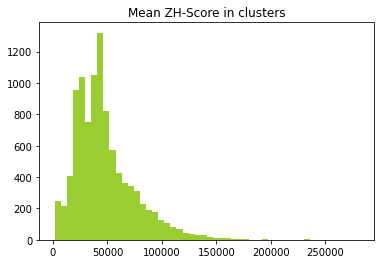

In [ ]:
plt.hist(genomes50_sorted['Mean ZH-Score'], color='yellowgreen', bins=50)
plt.title('Mean ZH-Score in clusters')

Text(0.5, 1.0, 'Max ZH-Score in clusters')

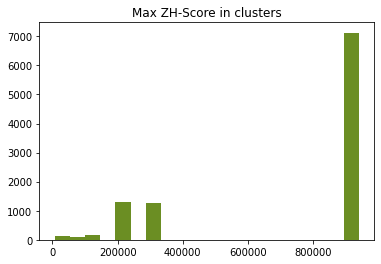

In [ ]:
plt.hist(genomes50_sorted['Max ZH-Score'], color='olivedrab', bins=20)
plt.title('Max ZH-Score in clusters')

Text(0.5, 1.0, 'ZDNA in promoter in clusters')

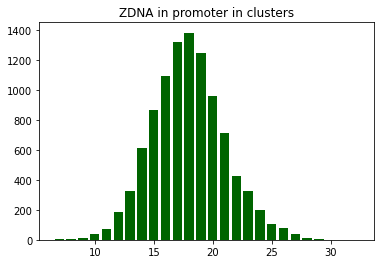

In [ ]:
plt.bar(range(np.min(genomes50_sorted['ZDNA in promoter']), np.max(genomes50_sorted['ZDNA in promoter']) + 1),
        height=[ genomes50_sorted[genomes50_sorted['ZDNA in promoter']==i].shape[0] for i in range(np.min(genomes50_sorted['ZDNA in promoter']),
                               np.max(genomes50_sorted['ZDNA in promoter'])+1) ], color='darkgreen')
plt.title('ZDNA in promoter in clusters')

In [ ]:
np.savetxt('drive/MyDrive/group_project_bioinf/genomes50_final_sorted.txt', genomes50_sorted.values, delimiter='\t', fmt = '%s')

In [ ]:
np.savetxt('drive/MyDrive/group_project_bioinf/genomes50_final_sorted_csv.txt', genomes50_sorted.values, delimiter=';', fmt = '%s')

In [ ]:
clusters = genomes50_sorted[:10]
clusters

,# Species,Genes,Alg.-Conn.,ZDNA in promoter,Mean ZH-Score,Max ZH-Score,_protein_1.faa,_protein_10.faa,_protein_2.faa,_protein_3.faa,...,GCF_000026945.1_ASM2694v1_protein.faa,GCF_000091025.4_ASM9102v4_protein.faa,GCF_000182965.3_ASM18296v3_protein.faa,GCF_000235365.1_ASM23536v1_protein.faa,GCF_000315875.1_ASM31587v1_protein.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
2740,49,49,0.476,32,22037.523130,302785.5,XP_041405690.1,EJS42080.1,SCW03935.1,XP_018209678.1,...,"[[XP_002417029.1], 1, {'zdna': ['823649', '823...","[[NP_982748.1], 1, {'zdna': ['36294', '36308']...","[[XP_713631.2], 1, {'zdna': ['802914', '802922...","[[XP_003647669.1], 1, {'zdna': ['931241', '931...","[[XP_003867776.1], 0]","[[XP_003670945.1], 0]","[[XP_003677372.1], 0]","[[EJS42080.1], 1, {'zdna': ['201984', '201992'...","[[XP_018219660.1], 1, {'zdna': ['207296', '207...","[[XP_033768726.1], 1, {'zdna': ['212074', '212..."
486,48,49,0.667,29,64996.572626,941334.2,*,EJS43014.1,SCV99530.1,XP_018210374.1,...,"[[XP_002417050.1], 1, {'zdna': ['878823', '878...","[[NP_983449.2], 1, {'zdna': ['441375', '441385...","[[XP_711973.2], 1, {'zdna': ['851066', '851078...","[[XP_003648354.1], 1, {'zdna': ['517767', '517...","[[XP_003867982.1], 1, {'zdna': ['1738523', '17...","[[XP_003669277.1], 1, {'zdna': ['854692', '854...","[[XP_003677065.1], 1, {'zdna': ['450580', '450...","[[EJS43014.1], 1, {'zdna': ['403858', '403875'...","[[XP_018221305.1], 1, {'zdna': ['409344', '409...","[[XP_033767262.1], 1, {'zdna': ['413443', '413..."
83,49,49,1.000,29,59047.386632,941334.2,XP_041408407.1,EJS43771.1,SCW00962.1,XP_018212572.1,...,"[[XP_002416845.1], 1, {'zdna': ['399290', '399...","[[NP_986676.2], 1, {'zdna': ['1054453', '10544...","[[XP_712962.1], 1, {'zdna': ['384844', '384852...","[[XP_003647990.1], 1, {'zdna': ['716670', '716...","[[XP_003867941.1], 1, {'zdna': ['1674087', '16...","[[XP_003669836.1], 0]","[[XP_003673525.1], 0]","[[EJS43771.1], 1, {'zdna': ['409509', '409519'...","[[XP_018222184.1], 1, {'zdna': ['414231', '414...","[[XP_033766316.1], 0]"
1493,50,50,1.000,29,44270.848371,941334.2,XP_041404757.1,EJS41408.1,SCW03362.1,XP_018212554.1,...,"[[XP_002418994.1], 1, {'zdna': ['74273', '7429...","[[NP_983539.2], 1, {'zdna': ['589900', '589912...","[[XP_717785.1], 1, {'zdna': ['72176', '72186']...","[[XP_003644951.1], 1, {'zdna': ['780921', '780...","[[XP_003869653.1], 0]","[[XP_003670300.1], 1, {'zdna': ['498992', '499...","[[XP_003675524.1], 1, {'zdna': ['309871', '309...","[[EJS41408.1], 0]","[[XP_018218886.1], 0]","[[XP_033769619.1], 0]"
1580,50,50,0.800,29,38003.635897,941334.2,XP_041406277.1,EJS42383.1,SCW04531.1,XP_018212791.1,...,"[[XP_002418758.1], 1, {'zdna': ['1781569', '17...","[[NP_982903.1], 1, {'zdna': ['312096', '312111...","[[XP_714453.1], 1, {'zdna': ['1763632', '17636...","[[XP_003648046.1], 1, {'zdna': ['830312', '830...","[[XP_003868523.1], 1, {'zdna': ['525102', '525...","[[XP_003671641.1], 0]","[[XP_003673725.1], 0]","[[EJS42383.1], 1, {'zdna': ['425543', '425555'...","[[XP_018220150.1], 1, {'zdna': ['446394', '446...","[[XP_033768397.1], 1, {'zdna': ['438368', '438..."
1140,48,48,1.000,29,37989.972827,941334.2,XP_041407924.1,EJS41281.1,SCW02362.1,XP_018208876.1,...,"[[XP_002418821.1], 1, {'zdna': ['1921550', '19...","[[NP_986920.1], 1, {'zdna': ['1538263', '15382...","[[XP_714267.2], 1, {'zdna': ['1904632', '19046...","[[XP_003646278.1], 1, {'zdna': ['849055', '849...","[[XP_003868918.1], 1, {'zdna': ['1434150', '14...","[[XP_003668852.1], 1, {'zdna': ['1398880', '13...","[[XP_003677183.1], 0]","[[EJS41281.1], 0]","[[XP_018219144.1], 1, {'zdna': ['785221', '785...","[[XP_033769882.1], 1, {'zdna': ['787202', '787..."
1082,50,50,1.000,29,34814.510150,302785.5,XP_041406142.1,EJS43786.1,SCW00442.1,XP_018212113.1,...,"[[XP_002420185.1], 1, {'zdna': ['1320935', '13...","[[NP_985443.1], 1, {'zdna': ['240769', '240782...","[[XP_716569.2], 1, {'zdna': ['1271899', '12719...","[[XP_003644754.1], 1, {

In [ ]:
clusters


(10, 66)

In [ ]:
clusters = clusters[['# Species', 'Genes', 'Alg.-Conn.', 'ZDNA in promoter', 'Mean ZH-Score',
       'Max ZH-Score',
       'protein_1.faa', 'protein_2.faa', 'protein_3.faa', 'protein_4.faa',
       'protein_5.faa', 'protein1.faa', 'protein2.faa', 'protein3.faa',
       'protein4.faa', 'protein5.faa', 'protein_aa.faa', 'protein_ar.faa',
       'protein_oa.faa', 'protein_oh.faa', 'protein_op.faa',
       'Bipolaris_maydis_ATCC_48331.faa', 'Bipolaris_oryzae_ATCC_44560.faa',
       'Bipolaris_sorokiniana_ND90Pr.faa', 'Bipolaris_victoriae_FI3.faa',
       'Bipolaris_zeicola_26-R-13.faa', 'e.faa', 'i.faa', 'r.faa', 't.faa',
       'v.faa', 'GCA_001664025.1.faa', 'GCA_001747045.1.faa',
       'GCA_001749795.1.faa', 'GCA_017311265.1.faa', 'GCA_017311285.1.faa',
       'GCA_000149555.1_ASM14955v1_protein.faa',
       'GCA_000303195.2_FP7_protein.faa',
       'GCA_019609905.1_ASM1960990v1_protein.faa',
       'GCA_019915245.1_ASM1991524v1_protein.faa',
       'GCA_900007375.1_ASM90000737v1_protein.faa', 'Ach.faa', 'Afl.faa',
       'Afu.faa', 'Alu.faa', 'Apu.faa',
       'GCF_000026945.1_ASM2694v1_protein.faa',
       'GCF_000091025.4_ASM9102v4_protein.faa',
       'GCF_000182965.3_ASM18296v3_protein.faa',
       'GCF_000235365.1_ASM23536v1_protein.faa',
       'GCF_000315875.1_ASM31587v1_protein.faa', 'GCA_000227115.2.faa',
       'GCA_000237345.1.faa', 'GCA_000292725.1.faa', 'GCA_001298625.1.faa',
       'GCA_002079055.1.faa']]
clusters.shape

(10, 56)

In [ ]:
np.savetxt('drive/MyDrive/group_project_bioinf/clusters.txt', clusters.values, delimiter='\t', fmt = '%s')

# Тепловая карта

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
names = ['# Species', 'Genes', 'Alg.-Conn.', 'ZDNA in promoter', 'Mean ZH-Score',
       'Max ZH-Score',
       'protein_1.faa', 'protein_2.faa', 'protein_3.faa', 'protein_4.faa',
       'protein_5.faa', 'protein1.faa', 'protein2.faa', 'protein3.faa',
       'protein4.faa', 'protein5.faa', 'protein_aa.faa', 'protein_ar.faa',
       'protein_oa.faa', 'protein_oh.faa', 'protein_op.faa',
       'Bipolaris_maydis_ATCC_48331.faa', 'Bipolaris_oryzae_ATCC_44560.faa',
       'Bipolaris_sorokiniana_ND90Pr.faa', 'Bipolaris_victoriae_FI3.faa',
       'Bipolaris_zeicola_26-R-13.faa', 'e.faa', 'i.faa', 'r.faa', 't.faa',
       'v.faa', 'GCA_001664025.1.faa', 'GCA_001747045.1.faa',
       'GCA_001749795.1.faa', 'GCA_017311265.1.faa', 'GCA_017311285.1.faa',
       'GCA_000149555.1_ASM14955v1_protein.faa',
       'GCA_000303195.2_FP7_protein.faa',
       'GCA_019609905.1_ASM1960990v1_protein.faa',
       'GCA_019915245.1_ASM1991524v1_protein.faa',
       'GCA_900007375.1_ASM90000737v1_protein.faa', 'Ach.faa', 'Afl.faa',
       'Afu.faa', 'Alu.faa', 'Apu.faa',
       'GCF_000026945.1_ASM2694v1_protein.faa',
       'GCF_000091025.4_ASM9102v4_protein.faa',
       'GCF_000182965.3_ASM18296v3_protein.faa',
       'GCF_000235365.1_ASM23536v1_protein.faa',
       'GCF_000315875.1_ASM31587v1_protein.faa', 'GCA_000227115.2.faa',
       'GCA_000237345.1.faa', 'GCA_000292725.1.faa', 'GCA_001298625.1.faa',
       'GCA_002079055.1.faa']

In [ ]:
! wget https://raw.githubusercontent.com/kseniashilova/hse22_project_Ascomycetes1/main/tables_of_50_genomes/clusters.txt

--2022-06-15 21:59:41--  https://raw.githubusercontent.com/kseniashilova/hse22_project_Ascomycetes1/main/tables_of_50_genomes/clusters.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 321345 (314K) [text/plain]
Saving to: ‘clusters.txt’

clusters.txt        100%[===================>] 313.81K  --.-KB/s    in 0.03s   

2022-06-15 21:59:42 (9.43 MB/s) - ‘clusters.txt’ saved [321345/321345]



In [ ]:
clusters = pd.read_csv('clusters.txt', names=names, sep='\t')
clusters

,# Species,Genes,Alg.-Conn.,ZDNA in promoter,Mean ZH-Score,Max ZH-Score,protein_1.faa,protein_2.faa,protein_3.faa,protein_4.faa,...,GCF_000026945.1_ASM2694v1_protein.faa,GCF_000091025.4_ASM9102v4_protein.faa,GCF_000182965.3_ASM18296v3_protein.faa,GCF_000235365.1_ASM23536v1_protein.faa,GCF_000315875.1_ASM31587v1_protein.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
0,49,49,0.476,32,22037.523130,302785.5,"[['XP_003955368.1'], 0]","[['XP_022464997.1'], 1, {'zdna': ['150124', '1...","[['XP_041405690.1'], 1, {'zdna': ['662843', '6...","[['SMN19762.1'], 0]",...,"[['XP_002417029.1'], 1, {'zdna': ['823649', '8...","[['NP_982748.1'], 1, {'zdna': ['36294', '36308...","[['XP_713631.2'], 1, {'zdna': ['802914', '8029...","[['XP_003647669.1'], 1, {'zdna': ['931241', '9...","[['XP_003867776.1'], 0]","[['XP_003670945.1'], 0]","[['XP_003677372.1'], 0]","[['EJS42080.1'], 1, {'zdna': ['201984', '20199...","[['XP_018219660.1'], 1, {'zdna': ['207296', '2...","[['XP_033768726.1'], 1, {'zdna': ['212074', '2..."
1,48,49,0.667,29,64996.572626,941334.2,"[['*'], 0]","[['XP_022466876.1'], 0]","[['XP_041408807.1'], 0]","[['SMN21379.1'], 1, {'zdna': ['45938', '45948'...",...,"[['XP_002417050.1'], 1, {'zdna': ['878823', '8...","[['NP_983449.2'], 1, {'zdna': ['441375', '4413...","[['XP_711973.2'], 1, {'zdna': ['851066', '8510...","[['XP_003648354.1'], 1, {'zdna': ['517767', '5...","[['XP_003867982.1'], 1, {'zdna': ['1738523', '...","[['XP_003669277.1'], 1, {'zdna': ['854692', '8...","[['XP_003677065.1'], 1, {'zdna': ['450580', '4...","[['EJS43014.1'], 1, {'zdna': ['403858', '40387...","[['XP_018221305.1'], 1, {'zdna': ['409344', '4...","[['XP_033767262.1'], 1, {'zdna': ['413443', '4..."
2,49,49,1.000,29,59047.386632,941334.2,"[['XP_003958047.1'], 0]","[['XP_022464318.1'], 1, {'zdna': ['580917', '5...","[['XP_041408407.1'], 0]","[['SMN21927.1'], 0]",...,"[['XP_002416845.1'], 1, {'zdna': ['399290', '3...","[['NP_986676.2'], 1, {'zdna': ['1054453', '105...","[['XP_712962.1'], 1, {'zdna': ['384844', '3848...","[['XP_003647990.1'], 1, {'zdna': ['716670', '7...","[['XP_003867941.1'], 1, {'zdna': ['1674087', '...","[['XP_003669836.1'], 0]","[['XP_003673525.1'], 0]","[['EJS43771.1'], 1, {'zdna': ['409509', '40951...","[['XP_018222184.1'], 1, {'zdna': ['414231', '4...","[['XP_033766316.1'], 0]"
3,50,50,1.000,29,44270.848371,941334.2,"[['XP_003958789.1'], 0]","[['XP_022466494.1'], 1, {'zdna': ['307054', '3...","[['XP_041404757.1'], 0]","[['SMN22127.1'], 0]",...,"[['XP_002418994.1'], 1, {'zdna': ['74273', '74...","[['NP_983539.2'], 1, {'zdna': ['589900', '5899...","[['XP_717785.1'], 1, {'zdna': ['72176', '72186...","[['XP_003644951.1'], 1, {'zdna': ['780921', '7...","[['XP_003869653.1'], 0]","[['XP_003670300.1'], 1, {'zdna': ['498992', '4...","[['XP_003675524.1'], 1, {'zdna': ['309871', '3...","[['EJS41408.1'], 0]","[['XP_018218886.1'], 0]","[['XP_033769619.1'], 0]"
4,50,50,0.800,29,38003.635897,941334.2,"[['XP_003954642.1'], 0]","[['XP_022464753.1'], 1, {'zdna': ['490175', '4...","[['XP_041406277.1'], 0]","[['SMN19151.1'], 0]",...,"[['XP_002418758.1'], 1, {'zdna': ['1781569', '...","[['NP_982903.1'], 1, {'zdna': ['312096', '3121...","[['XP_714453.1'], 1, {'zdna': ['1763632', '176...","[['XP_003648046.1'], 1, {'zdna': ['830312', '8...","[['XP_003868523.1'], 1, {'zdna': ['525102', '5...","[['XP_003671641.1'], 0]","[['XP_003673725.1'], 0]","[['EJS42383.1'], 1, {'zdna': ['425543', '42555...","[['XP_018220150.1'], 1, {'zdna': ['446394', '4...","[['XP_033768397.1'], 1, {'zdna': ['438368', '4..."
5,48,48,1.000,29,37989.972827,941334.2,"[['XP_003956089.1'], 0]","[['XP_022462685.1'], 1, {'zdna': ['1253653', '...","[['XP_041407924.1'], 1, {'zdna': ['265926', '2...","[['SMN22335.1'], 1, {'zdna': ['237331', '23733...",...,"[['XP_002418821.1'], 1, {'zdna': ['1921550', '...","[['NP_986920.1'], 1, {'zdna': ['1538263', '153...","[['XP_714267.2'], 1, {'zdna': ['1904632', '190...","[['XP_003646278.1'], 1, {'zdna': ['849055', '8.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

names = ['# Species', 'Genes', 'Alg.-Conn.', 'ZDNA in promoter', 'Mean ZH-Score',
       'Max ZH-Score',
       'protein_1.faa', 'protein_2.faa', 'protein_3.faa', 'protein_4.faa',
       'protein_5.faa', 'protein1.faa', 'protein2.faa', 'protein3.faa',
       'protein4.faa', 'protein5.faa', 'protein_aa.faa', 'protein_ar.faa',
       'protein_oa.faa', 'protein_oh.faa', 'protein_op.faa',
       'Bipolaris_maydis_ATCC_48331.faa', 'Bipolaris_oryzae_ATCC_44560.faa',
       'Bipolaris_sorokiniana_ND90Pr.faa', 'Bipolaris_victoriae_FI3.faa',
       'Bipolaris_zeicola_26-R-13.faa', 'e.faa', 'i.faa', 'r.faa', 't.faa',
       'v.faa', 'GCA_001664025.1.faa', 'GCA_001747045.1.faa',
       'GCA_001749795.1.faa', 'GCA_017311265.1.faa', 'GCA_017311285.1.faa',
       'GCA_000149555.1_ASM14955v1_protein.faa',
       'GCA_000303195.2_FP7_protein.faa',
       'GCA_019609905.1_ASM1960990v1_protein.faa',
       'GCA_019915245.1_ASM1991524v1_protein.faa',
       'GCA_900007375.1_ASM90000737v1_protein.faa', 'Ach.faa', 'Afl.faa',
       'Afu.faa', 'Alu.faa', 'Apu.faa',
       'GCF_000026945.1_ASM2694v1_protein.faa',
       'GCF_000091025.4_ASM9102v4_protein.faa',
       'GCF_000182965.3_ASM18296v3_protein.faa',
       'GCF_000235365.1_ASM23536v1_protein.faa',
       'GCF_000315875.1_ASM31587v1_protein.faa', 'GCA_000227115.2.faa',
       'GCA_000237345.1.faa', 'GCA_000292725.1.faa', 'GCA_001298625.1.faa',
       'GCA_002079055.1.faa']

columns_species = {
       'protein_1.faa': 'Kazachstania africana CBS 2517',
       'protein_2.faa' : 'Kazachstania naganishii CBS 8797',
       'protein_3.faa' : 'Kazachstania barnettii]',
       'protein_4.faa' : 'Kazachstania saulgeensis',
       'protein_5.faa' : 'Kazachstania exigua',

        'protein1.faa' : 'Lachancea fermentati',
        'protein2.faa' : 'Lachancea lanzarotensis',
        'protein3.faa' : 'Lachancea mirantina',
        'protein4.faa' : 'Lachancea quebecensis',
        'protein5.faa' : 'Lachancea thermotolerans CBS 6340',
        
        'protein_aa.faa' : 'Alternaria atra',
        'protein_ar.faa' : 'Alternaria rosae',
        'protein_oa.faa' : 'Ogataea angusta',
        'protein_oh.faa' : 'Ogataea haglerorum',
        'protein_op.faa' : 'Ogataea polymorpha',

        'Bipolaris_maydis_ATCC_48331.faa' : 'Bipolaris maydis ATCC 48331',
        'Bipolaris_oryzae_ATCC_44560.faa' : 'Bipolaris oryzae ATCC 44560',
        'Bipolaris_sorokiniana_ND90Pr.faa' : 'Bipolaris sorokiniana ND90Pr',
        'Bipolaris_victoriae_FI3.faa' : 'Bipolaris victoriae FI3',
        'Bipolaris_zeicola_26-R-13.faa' : 'Bipolaris zeicola 26-R-13',
       
        'e.faa' : 'Trichophyton equinum CBS 127.97',
        'i.faa' : 'Trichophyton interdigitale',
        'r.faa' : 'Trichophyton rubrum CBS 118892',
        't.faa' : 'Trichophyton tonsurans CBS 112818',
        'v.faa' : 'Trichophyton verrucosum HKI 0517',
       
        'GCA_001664025.1.faa' : 'Hanseniaspora valbyensis NRRL Y-1626',
        'GCA_001747045.1.faa' : 'Hanseniaspora osmophila',
        'GCA_001749795.1.faa' : 'Hanseniaspora opuntiae',
        'GCA_017311265.1.faa' : 'Pneumocystis canis',
        'GCA_017311285.1.faa' : 'Pneumocystis oryctolagi',

        'GCA_000149555.1_ASM14955v1_protein.faa' : 'Fusarium verticillioides 7600',
        'GCA_000303195.2_FP7_protein.faa' : 'Fusarium pseudograminearum CS3096',
        'GCA_019609905.1_ASM1960990v1_protein.faa' : 'Fusarium poae',
        'GCA_019915245.1_ASM1991524v1_protein.faa' : 'Fusarium musae',
        'GCA_900007375.1_ASM90000737v1_protein.faa' : 'Fusarium venenatum',
       
        'Ach.faa' : 'Aspergillus chevalieri',
        'Afl.faa' : 'Aspergillus flavus NRRL3357',
        'Afu.faa' : 'Aspergillus fumigatus Af293',
        'Alu.faa' : 'Aspergillus luchuensis',
        'Apu.faa' : 'Aspergillus puulaauensis',

        'GCF_000026945.1_ASM2694v1_protein.faa' : 'Candida dubliniensis CD36',
        'GCF_000091025.4_ASM9102v4_protein.faa' : 'Eremothecium gossypii ATCC 10895',
        'GCF_000182965.3_ASM18296v3_protein.faa' : 'Candida albicans SC5314',
        'GCF_000235365.1_ASM23536v1_protein.faa' : 'Eremothecium cymbalariae DBVPG#7215',
        'GCF_000315875.1_ASM31587v1_protein.faa' : 'Candida orthopsilosis Co 90-125',
       
        'GCA_000227115.2.faa' : 'Naumovozyma dairenensis CBS 421',
        'GCA_000237345.1.faa' : 'Naumovozyma castellii CBS 4309',
        'GCA_000292725.1.faa' : 'Saccharomyces arboricola H-6',
        'GCA_001298625.1.faa' : 'Saccharomyces eubayanus',
        'GCA_002079055.1.faa' : 'Saccharomyces paradoxus'
       }

new_cols = []
clusters = pd.read_csv('clusters.txt', names=names, sep='\t')
df = clusters.drop(columns=['# Species', 'Genes', 'Alg.-Conn.', 'ZDNA in promoter', 'Mean ZH-Score',
       'Max ZH-Score'])

for i in df.columns:
  new_cols.append(columns_species[i])

df.columns = new_cols
df = df.T

for index, row in df.iterrows():
  new_row = []
  for e in row:
    e = e.split("'")
    if e[1] == '*':
      e = float(1)
    else:
      if '0' in e[2]:
        e = 0
      else:
        try:
          e = float(e[11])
        except ValueError:
          e = float(e[13])
    new_row.append(e)
  df.loc[index] = new_row

df = df.replace(0, np.nan)
print(df)

                                                0            1            2  \
Kazachstania africana CBS 2517                NaN       1.0000          NaN   
Kazachstania naganishii CBS 8797        2752.4470          NaN    1743.1070   
Kazachstania barnettii]                  712.1870          NaN          NaN   
Kazachstania saulgeensis                      NaN     783.8230          NaN   
Kazachstania exigua                      650.9198     980.8116    2091.0830   
Lachancea fermentati                          NaN          NaN          NaN   
Lachancea lanzarotensis                       NaN          NaN          NaN   
Lachancea mirantina                           NaN          NaN          NaN   
Lachancea quebecensis                         NaN          NaN          NaN   
Lachancea thermotolerans CBS 6340        783.8230   29467.8800    1116.6210   
Alternaria atra                          908.3955    2752.4470    1820.5850   
Alternaria rosae                         783.8230   

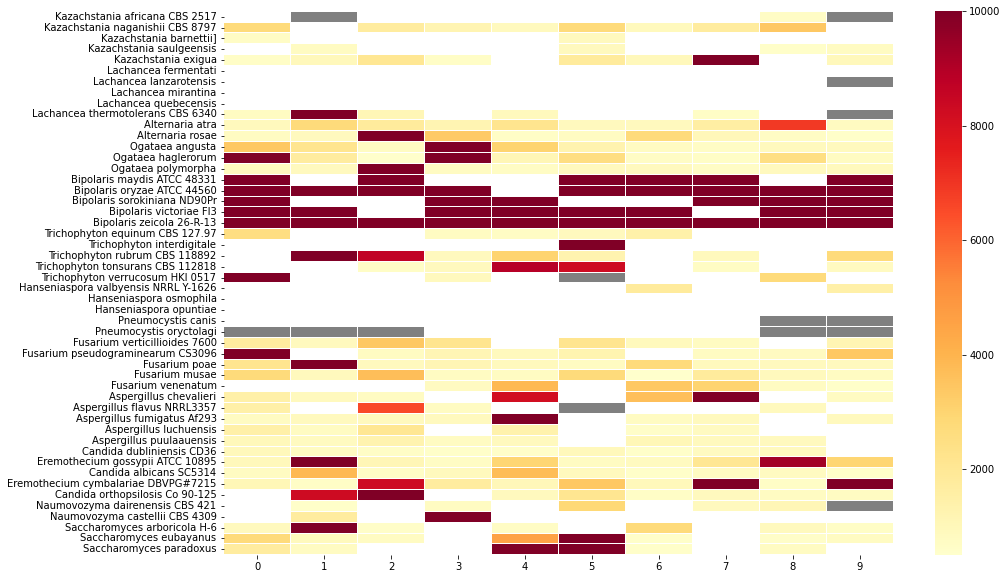

In [ ]:
cmap =  sns.color_palette("YlOrRd", as_cmap=True)
cmap.set_under('gray')
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df, vmax = 10000, vmin=500, linewidth=0.05, cmap=cmap, mask=df.isnull())

# 5. Названия для кластеров

In [ ]:
features = pd.read_csv('/content/drive/MyDrive/group_project_bioinf/features.csv', sep='\t')
features

,Unnamed: 0,# Species,Genes,Alg.-Conn.,ZNDA in promoter,Mean ZH-Score,Max ZH-Score,protein_1.faa,protein_2.faa,protein_3.faa,...,feature_GCF_000026945.1_ASM2694v1_protein.faa,feature_GCF_000091025.4_ASM9102v4_protein.faa,feature_GCF_000182965.3_ASM18296v3_protein.faa,feature_GCF_000235365.1_ASM23536v1_protein.faa,feature_GCF_000315875.1_ASM31587v1_protein.faa,feature_GCA_000227115.2.faa,feature_GCA_000237345.1.faa,feature_GCA_000292725.1.faa,feature_GCA_001298625.1.faa,feature_GCA_002079055.1.faa
0,0,49,49,0.476,32,22037.523130,302785.5,"[['XP_003955368.1'], 0]","[['XP_022464997.1'], 1, {'zdna': ['150124', '1...","[['XP_041405690.1'], 1, {'zdna': ['662843', '6...",...,"3'-5' exoribonuclease, exosome subunit, putative",ABL199Wp,transcription elongation factor DST1,hypothetical protein,hypothetical protein,hypothetical protein,hypothetical protein,csl4p,CSL4-like protein,Csl4
1,1,48,49,0.667,29,64996.572626,941334.2,"[['*'], 0]","[['XP_022466876.1'], 0]","[['XP_041408807.1'], 0]",...,nucleolar protein required for 18S rRNA synth...,ABL044Cp,mRNA splicing protein,Hypothetical protein,U3-containing 90S preribosome subunit,hypothetical protein,hypothetical protein,YJL010C,NOP9-like protein,Nop9
2,2,49,49,1.000,29,59047.386632,941334.2,"[['XP_003958047.1'], 0]","[['XP_022464318.1'], 1, {'zdna': ['580917', '5...","[['XP_041408407.1'], 0]",...,"DNA strand transfer protein alpha, putative",AGR254Cp,snoRNA-binding rRNA-processing protein,hypothetical protein,Dst1 protein,hypothetical protein,hypothetical protein,dst1p,DST1-like protein,Dst1
3,3,50,50,1.000,29,44270.848371,941334.2,"[['XP_003958789.1'], 0]","[['XP_022466494.1'], 1, {'zdna': ['307054', '3...","[['XP_041404757.1'], 0]",...,"pre-mRNA-splicing factor, putative",AFL107Wp,_,Hypothetical protein,hypothetical protein,hypothetical protein,hypothetical protein,prp46p,PRP46-like protein,Prp46
4,4,50,50,0.800,29,38003.635897,941334.2,"[['XP_003954642.1'], 0]","[['XP_022464753.1'], 1, {'zdna': ['490175', '4...","[['XP_041406277.1'], 0]",...,"U3 small nucleolar RNA-associated protein, pu...",AFR172Cp,_,hypothetical protein,Utp15 small subunit (SSU) processome component,hypothetical protein,hypothetical protein,utp15p,UTP15-like protein,Utp15
5,5,48,48,1.000,29,37989.972827,941334.2,"[['XP_003956089.1'], 0]","[['XP_022462685.1'], 1, {'zdna': ['1253653', '...","[['XP_041407924.1'], 1, {'zdna': ['265926', '2...",...,Tafazzin homolog,AFR085Wp,_,hypothetical protein,Taz1 protein,hypothetical protein,hypothetical protein,taz1p,TAZ1-like protein,Taz1
6,6,50,50,1.000,29,34814.510150,302785.5,"[['XP_003959726.1'], 0]","[['XP_022465104.1'], 1, {'zdna': ['366895', '3...","[['XP_041406142.1'], 0]",...,"GTP-RNA guanylyltransferase, putative",AGL041Cp,_,Hypothetical protein,Cgt1 mRNA 5' guanylyltransferase,hypothetical protein,hypothetical protein,ceg1p,CEG1-like protein,Ceg1
7,7,50,50,0.600,29,31399.653735,941334.2,"[['XP_003956420.1'], 0]","[['XP_022465439.1'], 1, {'zdna': ['300967', '3...","[['XP_041404455.1'], 0]",...,"histone deacetylase, putative",_,_,Hypothetical protein,Hos2 histone deacetylase,hypothetical protein,hypothetical protein,hos2p,HOS2-like protein,Hos2
8,8,48,48,1.000,28,91242.214467,941334.2,"[['XP_003954710.1'], 1, {'zdna': ['265514', '2...","[['XP_022462862.1'], 1, {'zdna': ['315833', '3...","[['XP_041408808.1'], 0]",...,"elongation factor G2, mitochondrial precursor...",_,_,hypothetical protein,Mef2 mitochondrial translation elongation factor,hypothetical protein,hypothetical protein,mef2p,MEF2-like protein,Mef2
9,9,44,45,1.000,28,69088.650956,941334.2,"[['*'], 0]","[['XP_022466876.1'], 0]","[['XP_041408807.1'], 0]",...,"Cu-transporting ATPase type-1, putative",_,_,hypothetical protein,Crp1 plasma membrane copper transporter,*,hypothetical protein,swc3p,SWC3-like protein,Swc3


In [ ]:
columns2 = []
for col in features.columns:
  if 'feature' in col:
    columns2.append(col)

In [ ]:
features[columns2]

,feature_protein_1.faa,feature_protein_2.faa,feature_protein_3.faa,feature_protein_4.faa,feature_protein_5.faa,feature_protein1.faa,feature_protein2.faa,feature_protein3.faa,feature_protein4.faa,feature_protein5.faa,...,feature_GCF_000026945.1_ASM2694v1_protein.faa,feature_GCF_000091025.4_ASM9102v4_protein.faa,feature_GCF_000182965.3_ASM18296v3_protein.faa,feature_GCF_000235365.1_ASM23536v1_protein.faa,feature_GCF_000315875.1_ASM31587v1_protein.faa,feature_GCA_000227115.2.faa,feature_GCA_000237345.1.faa,feature_GCA_000292725.1.faa,feature_GCA_001298625.1.faa,feature_GCA_002079055.1.faa
0,hypothetical protein,hypothetical protein,exosome non-catalytic core subunit CSL4,similar to Saccharomyces cerevisiae YNL232W C...,exosome 3'->5 exonuclease subunit ski4 (Csl4),SCU98501.1,CUS22454.1,uncharacterized protein,SCW03935.1,KLTH0B08426p,...,"3'-5' exoribonuclease, exosome subunit, putative",ABL199Wp,transcription elongation factor DST1,hypothetical protein,hypothetical protein,hypothetical protein,hypothetical protein,csl4p,CSL4-like protein,Csl4
1,*,hypothetical protein,uncharacterized protein,similar to Saccharomyces cerevisiae YMR318C A...,alcohol dehydrogenase,ion of 18S rRNA and assembly of small ribosoma...,ion of 18S rRNA and assembly of small ribosoma...,ion of 18S rRNA and assembly of small ribosoma...,ion of 18S rRNA and assembly of small ribosoma...,KLTH0G07612p,...,nucleolar protein required for 18S rRNA synth...,ABL044Cp,mRNA splicing protein,Hypothetical protein,U3-containing 90S preribosome subunit,hypothetical protein,hypothetical protein,YJL010C,NOP9-like protein,Nop9
2,hypothetical protein,hypothetical protein,transcription elongation factor DST1,similar to Saccharomyces cerevisiae YGL043W D...,RNA polymerase II elongation factor,SCV00528.1,CUS20700.1,uncharacterized protein,SCW00962.1,KLTH0D04136p,...,"DNA strand transfer protein alpha, putative",AGR254Cp,snoRNA-binding rRNA-processing protein,hypothetical protein,Dst1 protein,hypothetical protein,hypothetical protein,dst1p,DST1-like protein,Dst1
3,hypothetical protein,hypothetical protein,mRNA splicing protein PRP46,similar to Saccharomyces cerevisiae YPL151C P...,pre-mRNA-splicing factor prp46,SCU95929.1,CUS20404.1,uncharacterized protein,SCW03362.1,KLTH0D11132p,...,"pre-mRNA-splicing factor, putative",AFL107Wp,_,Hypothetical protein,hypothetical protein,hypothetical protein,hypothetical protein,prp46p,PRP46-like protein,Prp46
4,hypothetical protein,hypothetical protein,snoRNA-binding rRNA-processing protein UTP15,similar to Saccharomyces cerevisiae YMR093W U...,snoRNA-binding rRNA-processing protein,SCV00349.1,CUS20647.1,uncharacterized protein,SCW04531.1,KLTH0D05346p,...,"U3 small nucleolar RNA-associated protein, pu...",AFR172Cp,_,hypothetical protein,Utp15 small subunit (SSU) processome component,hypothetical protein,hypothetical protein,utp15p,UTP15-like protein,Utp15
5,hypothetical protein,hypothetical protein,lysophosphatidylcholine acyltransferase,similar to Saccharomyces cerevisiae YPR140W T...,Lyso-phosphatidylcholine acyltransferase,SCV02968.1,CUS21880.1,uncharacterized protein,SCW02362.1,KLTH0F14476p,...,Tafazzin homolog,AFR085Wp,_,hypothetical protein,Taz1 protein,hypothetical protein,hypothetical protein,taz1p,TAZ1-like protein,Taz1
6,hypothetical protein,hypothetical protein,mRNA guanylyltransferase,similar to Saccharomyces cerevisiae YGL130W C...,Dcp1p-Dcp2p decapping enzyme complex alpha su...,SCV01213.1,CUS23171.1,uncharacterized protein,SCW00442.1,KLTH0H03850p,...,"GTP-RNA guanylyltransferase, putative",AGL041Cp,_,Hypothetical protein,Cgt1 mRNA 5' guanylyltransferase,hypothetical protein,hypothetical protein,ceg1p,CEG1-like protein,Ceg1
7,hypothetical protein,hypothetical protein,histone deacetylase HOS2,similar to Saccharomyces cerevisiae YGL194C H...,histone deacetylase,SCU87808.1,CUS22981.1,uncharacterized protein,SCW01077.1,KLTH0E06446p,...,"histone deacetylase, putative",_,_,Hypothetical protein,Hos2 histone deacetylase,hypothetical protei

In [ ]:
from scipy import stats

In [ ]:
features['Features Mode'] = [stats.mode(features[columns2].T[i].T) for i in range(10)]
features['Features Mode']

0    ([ hypothetical protein], [13])
1     ([ hypothetical protein], [6])
2    ([ hypothetical protein], [10])
3    ([ hypothetical protein], [10])
4    ([ hypothetical protein], [12])
5    ([ hypothetical protein], [14])
6    ([ hypothetical protein], [11])
7    ([ hypothetical protein], [10])
8    ([ hypothetical protein], [11])
9                         ([_], [9])
Name: Features Mode, dtype: object

In [ ]:
lst = ['*'] * 10
lst[0] = 'Exosome complex component, Exosome exonuclease subunit'
lst[1] = 'Nucleolar protein, rRNA processing protein, alcohol dehydrogenase, ion of 18S rRNA and assembly of small ribosoma'
lst[2] = 'transcription elongation factor, RNA polymerase II elongation factor'
lst[3] = '(pre-) mRNA splicing protein'
lst[4] = 'small nucleolar RNA-associated protein'
lst[5] = 'Lysophosphatidylcholine acyltransferase'
lst[6] = 'mRNA-capping enzyme subunit alpha'
lst[7] = 'histone deacetylase'
lst[8] = 'Ribosome-releasing factor 2, mitochondrial'
lst[9] = 'putative copper-transporting ATPase'
features['Features Mode better'] = lst

In [ ]:
features[columns2].T[7].T

feature_protein_1.faa                                                             hypothetical protein
feature_protein_2.faa                                                             hypothetical protein
feature_protein_3.faa                                                         histone deacetylase HOS2
feature_protein_4.faa                                 similar to Saccharomyces cerevisiae YGL194C H...
feature_protein_5.faa                                                              histone deacetylase
feature_protein1.faa                                                                        SCU87808.1
feature_protein2.faa                                                                        CUS22981.1
feature_protein3.faa                                                           uncharacterized protein
feature_protein4.faa                                                                        SCW01077.1
feature_protein5.faa                                                     

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
features2 = pd.read_csv('/content/drive/MyDrive/group_project_bioinf/features2.csv', sep='\t')
features2

,Unnamed: 0,# Species,Genes,Alg.-Conn.,ZNDA in promoter,Mean ZH-Score,Max ZH-Score,protein_1.faa,protein_2.faa,protein_3.faa,...,feature_GCF_000026945.1_ASM2694v1_protein.faa,feature_GCF_000091025.4_ASM9102v4_protein.faa,feature_GCF_000182965.3_ASM18296v3_protein.faa,feature_GCF_000235365.1_ASM23536v1_protein.faa,feature_GCF_000315875.1_ASM31587v1_protein.faa,feature_GCA_000227115.2.faa,feature_GCA_000237345.1.faa,feature_GCA_000292725.1.faa,feature_GCA_001298625.1.faa,feature_GCA_002079055.1.faa
0,0,49,49,0.476,32,22037.523130,302785.5,"[['XP_003955368.1'], 0]","[['XP_022464997.1'], 1, {'zdna': ['150124', '1...","[['XP_041405690.1'], 1, {'zdna': ['662843', '6...",...,"3'-5' exoribonuclease, exosome subunit, putative",ABL199Wp,transcription elongation factor DST1,hypothetical protein,hypothetical protein,hypothetical protein,hypothetical protein,csl4p,CSL4-like protein,Csl4
1,1,48,49,0.667,29,64996.572626,941334.2,"[['*'], 0]","[['XP_022466876.1'], 0]","[['XP_041408807.1'], 0]",...,nucleolar protein required for 18S rRNA synth...,ABL044Cp,mRNA splicing protein,Hypothetical protein,U3-containing 90S preribosome subunit,hypothetical protein,hypothetical protein,YJL010C,NOP9-like protein,Nop9
2,2,49,49,1.000,29,59047.386632,941334.2,"[['XP_003958047.1'], 0]","[['XP_022464318.1'], 1, {'zdna': ['580917', '5...","[['XP_041408407.1'], 0]",...,"DNA strand transfer protein alpha, putative",AGR254Cp,snoRNA-binding rRNA-processing protein,hypothetical protein,Dst1 protein,hypothetical protein,hypothetical protein,dst1p,DST1-like protein,Dst1
3,3,50,50,1.000,29,44270.848371,941334.2,"[['XP_003958789.1'], 0]","[['XP_022466494.1'], 1, {'zdna': ['307054', '3...","[['XP_041404757.1'], 0]",...,"pre-mRNA-splicing factor, putative",AFL107Wp,Crp1p,Hypothetical protein,hypothetical protein,hypothetical protein,hypothetical protein,prp46p,PRP46-like protein,Prp46
4,4,50,50,0.800,29,38003.635897,941334.2,"[['XP_003954642.1'], 0]","[['XP_022464753.1'], 1, {'zdna': ['490175', '4...","[['XP_041406277.1'], 0]",...,"U3 small nucleolar RNA-associated protein, pu...",AFR172Cp,Mef2p,hypothetical protein,Utp15 small subunit (SSU) processome component,hypothetical protein,hypothetical protein,utp15p,UTP15-like protein,Utp15
5,5,48,48,1.000,29,37989.972827,941334.2,"[['XP_003956089.1'], 0]","[['XP_022462685.1'], 1, {'zdna': ['1253653', '...","[['XP_041407924.1'], 1, {'zdna': ['265926', '2...",...,Tafazzin homolog,AFR085Wp,histone deacetylase,hypothetical protein,Taz1 protein,hypothetical protein,hypothetical protein,taz1p,TAZ1-like protein,Taz1
6,6,50,50,1.000,29,34814.510150,302785.5,"[['XP_003959726.1'], 0]","[['XP_022465104.1'], 1, {'zdna': ['366895', '3...","[['XP_041406142.1'], 0]",...,"GTP-RNA guanylyltransferase, putative",AGL041Cp,mRNA guanylyltransferase,Hypothetical protein,Cgt1 mRNA 5' guanylyltransferase,hypothetical protein,hypothetical protein,ceg1p,CEG1-like protein,Ceg1
7,7,50,50,0.600,29,31399.653735,941334.2,"[['XP_003956420.1'], 0]","[['XP_022465439.1'], 1, {'zdna': ['300967', '3...","[['XP_041404455.1'], 0]",...,"histone deacetylase, putative",AFR172Cp,lysophosphatidylcholine acyltransferase,Hypothetical protein,Hos2 histone deacetylase,hypothetical protein,hypothetical protein,hos2p,HOS2-like protein,Hos2
8,8,48,48,1.000,28,91242.214467,941334.2,"[['XP_003954710.1'], 1, {'zdna': ['265514', '2...","[['XP_022462862.1'], 1, {'zdna': ['315833', '3...","[['XP_041408808.1'], 0]",...,"elongation factor G2, mitochondrial precursor...",AFR085Wp,snoRNA-binding rRNA-processing protein,hypothetical protein,Mef2 mitochondrial translation elongation factor,hypothetical protein,hypothetical protein,mef2p,MEF2-like protein,Mef2
9,9,44,45,1.000,28,69088.650956,941334.2,"[['*'], 0]","[['XP_022466876.1'], 0]","[['XP_041408807.1'], 0]",...,"Cu-transporting ATPase type-1, putative",AGL041Cp,mRNA splicing protein,hypothetical protein,Crp1 plasma membrane copper transporter,*,hypothetical protein,swc3p,SWC3-like protein,Swc3


In [ ]:
columns2 = []
for col in features2.columns:
  if 'feature' in col:
    columns2.append(col)

In [ ]:
features2[columns2]

,feature_protein_1.faa,feature_protein_2.faa,feature_protein_3.faa,feature_protein_4.faa,feature_protein_5.faa,feature_protein1.faa,feature_protein2.faa,feature_protein3.faa,feature_protein4.faa,feature_protein5.faa,...,feature_GCF_000026945.1_ASM2694v1_protein.faa,feature_GCF_000091025.4_ASM9102v4_protein.faa,feature_GCF_000182965.3_ASM18296v3_protein.faa,feature_GCF_000235365.1_ASM23536v1_protein.faa,feature_GCF_000315875.1_ASM31587v1_protein.faa,feature_GCA_000227115.2.faa,feature_GCA_000237345.1.faa,feature_GCA_000292725.1.faa,feature_GCA_001298625.1.faa,feature_GCA_002079055.1.faa
0,hypothetical protein,hypothetical protein,exosome non-catalytic core subunit CSL4,similar to Saccharomyces cerevisiae YNL232W C...,exosome 3'->5 exonuclease subunit ski4 (Csl4),SCU98501.1,CUS22454.1,uncharacterized protein,SCW03935.1,KLTH0B08426p,...,"3'-5' exoribonuclease, exosome subunit, putative",ABL199Wp,transcription elongation factor DST1,hypothetical protein,hypothetical protein,hypothetical protein,hypothetical protein,csl4p,CSL4-like protein,Csl4
1,*,hypothetical protein,uncharacterized protein,similar to Saccharomyces cerevisiae YMR318C A...,alcohol dehydrogenase,ion of 18S rRNA and assembly of small ribosoma...,ion of 18S rRNA and assembly of small ribosoma...,ion of 18S rRNA and assembly of small ribosoma...,ion of 18S rRNA and assembly of small ribosoma...,KLTH0G07612p,...,nucleolar protein required for 18S rRNA synth...,ABL044Cp,mRNA splicing protein,Hypothetical protein,U3-containing 90S preribosome subunit,hypothetical protein,hypothetical protein,YJL010C,NOP9-like protein,Nop9
2,hypothetical protein,hypothetical protein,transcription elongation factor DST1,similar to Saccharomyces cerevisiae YGL043W D...,RNA polymerase II elongation factor,SCV00528.1,CUS20700.1,uncharacterized protein,SCW00962.1,KLTH0D04136p,...,"DNA strand transfer protein alpha, putative",AGR254Cp,snoRNA-binding rRNA-processing protein,hypothetical protein,Dst1 protein,hypothetical protein,hypothetical protein,dst1p,DST1-like protein,Dst1
3,hypothetical protein,hypothetical protein,mRNA splicing protein PRP46,similar to Saccharomyces cerevisiae YPL151C P...,pre-mRNA-splicing factor prp46,SCU95929.1,CUS20404.1,uncharacterized protein,SCW03362.1,KLTH0D11132p,...,"pre-mRNA-splicing factor, putative",AFL107Wp,Crp1p,Hypothetical protein,hypothetical protein,hypothetical protein,hypothetical protein,prp46p,PRP46-like protein,Prp46
4,hypothetical protein,hypothetical protein,snoRNA-binding rRNA-processing protein UTP15,similar to Saccharomyces cerevisiae YMR093W U...,snoRNA-binding rRNA-processing protein,SCV00349.1,CUS20647.1,uncharacterized protein,SCW04531.1,KLTH0D05346p,...,"U3 small nucleolar RNA-associated protein, pu...",AFR172Cp,Mef2p,hypothetical protein,Utp15 small subunit (SSU) processome component,hypothetical protein,hypothetical protein,utp15p,UTP15-like protein,Utp15
5,hypothetical protein,hypothetical protein,lysophosphatidylcholine acyltransferase,similar to Saccharomyces cerevisiae YPR140W T...,Lyso-phosphatidylcholine acyltransferase,SCV02968.1,CUS21880.1,uncharacterized protein,SCW02362.1,KLTH0F14476p,...,Tafazzin homolog,AFR085Wp,histone deacetylase,hypothetical protein,Taz1 protein,hypothetical protein,hypothetical protein,taz1p,TAZ1-like protein,Taz1
6,hypothetical protein,hypothetical protein,mRNA guanylyltransferase,similar to Saccharomyces cerevisiae YGL130W C...,Dcp1p-Dcp2p decapping enzyme complex alpha su...,SCV01213.1,CUS23171.1,uncharacterized protein,SCW00442.1,KLTH0H03850p,...,"GTP-RNA guanylyltransferase, putative",AGL041Cp,mRNA guanylyltransferase,Hypothetical protein,Cgt1 mRNA 5' guanylyltransferase,hypothetical protein,hypothetical protein,ceg1p,CEG1-like protein,Ceg1
7,hypothetical protein,hypothetical protein,histone deacetylase HOS2,similar to Saccharomyces cerevisiae YGL194C H...,histone deacetylase,SCU87808.1,CUS22981.1,uncharacterized protein,SCW01077.1,KLTH0E06446p,...,"histone deacetylase, putative",AFR172Cp,lysophospha

In [ ]:
from scipy import stats

In [ ]:
features2['Features Mode'] = [stats.mode(features2[columns2].T[i].T) for i in range(10)]
features2['Features Mode']

0    ([ hypothetical protein], [13])
1     ([ hypothetical protein], [6])
2    ([ hypothetical protein], [10])
3    ([ hypothetical protein], [10])
4    ([ hypothetical protein], [12])
5    ([ hypothetical protein], [14])
6    ([ hypothetical protein], [11])
7    ([ hypothetical protein], [10])
8    ([ hypothetical protein], [11])
9     ([ hypothetical protein], [7])
Name: Features Mode, dtype: object

In [ ]:
features2[columns2].T[0].T

feature_protein_1.faa                                                             hypothetical protein
feature_protein_2.faa                                                             hypothetical protein
feature_protein_3.faa                                          exosome non-catalytic core subunit CSL4
feature_protein_4.faa                                 similar to Saccharomyces cerevisiae YNL232W C...
feature_protein_5.faa                                    exosome 3'->5 exonuclease subunit ski4 (Csl4)
feature_protein1.faa                                                                        SCU98501.1
feature_protein2.faa                                                                        CUS22454.1
feature_protein3.faa                                                           uncharacterized protein
feature_protein4.faa                                                                        SCW03935.1
feature_protein5.faa                                                     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 6. Визуализация и выравнивание

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
clusters = pd.read_csv('drive/MyDrive/group_project_bioinf/clusters.txt', names=['# Species', 'Genes', 'Alg.-Conn.', 'ZDNA in promoter', 'Mean ZH-Score',
       'Max ZH-Score',
       'protein_1.faa', 'protein_2.faa', 'protein_3.faa', 'protein_4.faa',
       'protein_5.faa', 'protein1.faa', 'protein2.faa', 'protein3.faa',
       'protein4.faa', 'protein5.faa', 'protein_aa.faa', 'protein_ar.faa',
       'protein_oa.faa', 'protein_oh.faa', 'protein_op.faa',
       'Bipolaris_maydis_ATCC_48331.faa', 'Bipolaris_oryzae_ATCC_44560.faa',
       'Bipolaris_sorokiniana_ND90Pr.faa', 'Bipolaris_victoriae_FI3.faa',
       'Bipolaris_zeicola_26-R-13.faa', 'e.faa', 'i.faa', 'r.faa', 't.faa',
       'v.faa', 'GCA_001664025.1.faa', 'GCA_001747045.1.faa',
       'GCA_001749795.1.faa', 'GCA_017311265.1.faa', 'GCA_017311285.1.faa',
       'GCA_000149555.1_ASM14955v1_protein.faa',
       'GCA_000303195.2_FP7_protein.faa',
       'GCA_019609905.1_ASM1960990v1_protein.faa',
       'GCA_019915245.1_ASM1991524v1_protein.faa',
       'GCA_900007375.1_ASM90000737v1_protein.faa', 'Ach.faa', 'Afl.faa',
       'Afu.faa', 'Alu.faa', 'Apu.faa',
       'GCF_000026945.1_ASM2694v1_protein.faa',
       'GCF_000091025.4_ASM9102v4_protein.faa',
       'GCF_000182965.3_ASM18296v3_protein.faa',
       'GCF_000235365.1_ASM23536v1_protein.faa',
       'GCF_000315875.1_ASM31587v1_protein.faa', 'GCA_000227115.2.faa',
       'GCA_000237345.1.faa', 'GCA_000292725.1.faa', 'GCA_001298625.1.faa',
       'GCA_002079055.1.faa'], sep='\t')
clusters

,# Species,Genes,Alg.-Conn.,ZDNA in promoter,Mean ZH-Score,Max ZH-Score,protein_1.faa,protein_2.faa,protein_3.faa,protein_4.faa,...,GCF_000026945.1_ASM2694v1_protein.faa,GCF_000091025.4_ASM9102v4_protein.faa,GCF_000182965.3_ASM18296v3_protein.faa,GCF_000235365.1_ASM23536v1_protein.faa,GCF_000315875.1_ASM31587v1_protein.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
0,49,49,0.476,32,22037.523130,302785.5,"[['XP_003955368.1'], 0]","[['XP_022464997.1'], 1, {'zdna': ['150124', '1...","[['XP_041405690.1'], 1, {'zdna': ['662843', '6...","[['SMN19762.1'], 0]",...,"[['XP_002417029.1'], 1, {'zdna': ['823649', '8...","[['NP_982748.1'], 1, {'zdna': ['36294', '36308...","[['XP_713631.2'], 1, {'zdna': ['802914', '8029...","[['XP_003647669.1'], 1, {'zdna': ['931241', '9...","[['XP_003867776.1'], 0]","[['XP_003670945.1'], 0]","[['XP_003677372.1'], 0]","[['EJS42080.1'], 1, {'zdna': ['201984', '20199...","[['XP_018219660.1'], 1, {'zdna': ['207296', '2...","[['XP_033768726.1'], 1, {'zdna': ['212074', '2..."
1,48,49,0.667,29,64996.572626,941334.2,"[['*'], 0]","[['XP_022466876.1'], 0]","[['XP_041408807.1'], 0]","[['SMN21379.1'], 1, {'zdna': ['45938', '45948'...",...,"[['XP_002417050.1'], 1, {'zdna': ['878823', '8...","[['NP_983449.2'], 1, {'zdna': ['441375', '4413...","[['XP_711973.2'], 1, {'zdna': ['851066', '8510...","[['XP_003648354.1'], 1, {'zdna': ['517767', '5...","[['XP_003867982.1'], 1, {'zdna': ['1738523', '...","[['XP_003669277.1'], 1, {'zdna': ['854692', '8...","[['XP_003677065.1'], 1, {'zdna': ['450580', '4...","[['EJS43014.1'], 1, {'zdna': ['403858', '40387...","[['XP_018221305.1'], 1, {'zdna': ['409344', '4...","[['XP_033767262.1'], 1, {'zdna': ['413443', '4..."
2,49,49,1.000,29,59047.386632,941334.2,"[['XP_003958047.1'], 0]","[['XP_022464318.1'], 1, {'zdna': ['580917', '5...","[['XP_041408407.1'], 0]","[['SMN21927.1'], 0]",...,"[['XP_002416845.1'], 1, {'zdna': ['399290', '3...","[['NP_986676.2'], 1, {'zdna': ['1054453', '105...","[['XP_712962.1'], 1, {'zdna': ['384844', '3848...","[['XP_003647990.1'], 1, {'zdna': ['716670', '7...","[['XP_003867941.1'], 1, {'zdna': ['1674087', '...","[['XP_003669836.1'], 0]","[['XP_003673525.1'], 0]","[['EJS43771.1'], 1, {'zdna': ['409509', '40951...","[['XP_018222184.1'], 1, {'zdna': ['414231', '4...","[['XP_033766316.1'], 0]"
3,50,50,1.000,29,44270.848371,941334.2,"[['XP_003958789.1'], 0]","[['XP_022466494.1'], 1, {'zdna': ['307054', '3...","[['XP_041404757.1'], 0]","[['SMN22127.1'], 0]",...,"[['XP_002418994.1'], 1, {'zdna': ['74273', '74...","[['NP_983539.2'], 1, {'zdna': ['589900', '5899...","[['XP_717785.1'], 1, {'zdna': ['72176', '72186...","[['XP_003644951.1'], 1, {'zdna': ['780921', '7...","[['XP_003869653.1'], 0]","[['XP_003670300.1'], 1, {'zdna': ['498992', '4...","[['XP_003675524.1'], 1, {'zdna': ['309871', '3...","[['EJS41408.1'], 0]","[['XP_018218886.1'], 0]","[['XP_033769619.1'], 0]"
4,50,50,0.800,29,38003.635897,941334.2,"[['XP_003954642.1'], 0]","[['XP_022464753.1'], 1, {'zdna': ['490175', '4...","[['XP_041406277.1'], 0]","[['SMN19151.1'], 0]",...,"[['XP_002418758.1'], 1, {'zdna': ['1781569', '...","[['NP_982903.1'], 1, {'zdna': ['312096', '3121...","[['XP_714453.1'], 1, {'zdna': ['1763632', '176...","[['XP_003648046.1'], 1, {'zdna': ['830312', '8...","[['XP_003868523.1'], 1, {'zdna': ['525102', '5...","[['XP_003671641.1'], 0]","[['XP_003673725.1'], 0]","[['EJS42383.1'], 1, {'zdna': ['425543', '42555...","[['XP_018220150.1'], 1, {'zdna': ['446394', '4...","[['XP_033768397.1'], 1, {'zdna': ['438368', '4..."
5,48,48,1.000,29,37989.972827,941334.2,"[['XP_003956089.1'], 0]","[['XP_022462685.1'], 1, {'zdna': ['1253653', '...","[['XP_041407924.1'], 1, {'zdna': ['265926', '2...","[['SMN22335.1'], 1, {'zdna': ['237331', '23733...",...,"[['XP_002418821.1'], 1, {'zdna': ['1921550', '...","[['NP_986920.1'], 1, {'zdna': ['1538263', '153...","[['XP_714267.2'], 1, {'zdna': ['1904632', '190...","[['XP_003646278.1'], 1, {'zdna': ['849055', '8.

## Кластер 2

In [ ]:
clusters.T[2].T

# Species                                                                                   49
Genes                                                                                       49
Alg.-Conn.                                                                                 1.0
ZDNA in promoter                                                                            29
Mean ZH-Score                                                                     59047.386632
Max ZH-Score                                                                          941334.2
protein_1.faa                                                          [['XP_003958047.1'], 0]
protein_2.faa                                [['XP_022464318.1'], 1, {'zdna': ['580917', '5...
protein_3.faa                                                          [['XP_041408407.1'], 0]
protein_4.faa                                                              [['SMN21927.1'], 0]
protein_5.faa                                [['KA

In [ ]:
n = 0
for element in (clusters[['protein_2.faa', 'Bipolaris_maydis_ATCC_48331.faa', 'r.faa',
                          'Ach.faa', 'GCF_000182965.3_ASM18296v3_protein.faa', 'GCF_000091025.4_ASM9102v4_protein.faa', 'GCA_001298625.1.faa']].T[2]):
  print(element)
  n += 1

[['XP_022464318.1'], 1, {'zdna': ['580917', '580931'], 'zh-score': '1743.107', 'promoter': ['580915', '581515'], 'prot': 'XP_022464318.1', 'gene': 'KNAG_0D03260'}, {'zdna': ['580984', '580990'], 'zh-score': '883.5764', 'promoter': ['580915', '581515'], 'prot': 'XP_022464318.1', 'gene': 'KNAG_0D03260'}, {'zdna': ['581360', '581370'], 'zh-score': '908.3955', 'promoter': ['580915', '581515'], 'prot': 'XP_022464318.1', 'gene': 'KNAG_0D03260'}, {'zdna': ['581387', '581395'], 'zh-score': '883.5764', 'promoter': ['580915', '581515'], 'prot': 'XP_022464318.1', 'gene': 'KNAG_0D03260'}, {'zdna': ['581464', '581476'], 'zh-score': '561.1757', 'promoter': ['580915', '581515'], 'prot': 'XP_022464318.1', 'gene': 'KNAG_0D03260'}]
[['XP_014081585.1'], 1, {'zdna': ['852634', '852659'], 'zh-score': '94590.41', 'promoter': ['852371', '854630'], 'prot': 'XP_014081585.1', 'gene': 'COCC4DRAFT_163917'}, {'zdna': ['852634', '852659'], 'zh-score': '94590.41', 'promoter': ['852371', '854630'], 'prot': 'XP_014081

In [ ]:
strand = [1, 1, -1, 1, -1, 1, 1]
coords = [[581215, 582144], [852671,854330], [1396903,1397796], [940648,941574], [383753, 384670], [1054753,1055667], [414292,415224]]

In [ ]:
! pip install dna_features_viewer
from dna_features_viewer import GraphicFeature, GraphicRecord
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 12.5 MB/s 


In [ ]:
cols = ['protein_2.faa', 'Bipolaris_maydis_ATCC_48331.faa', 'r.faa',
                          'Ach.faa', 'GCF_000182965.3_ASM18296v3_protein.faa', 'GCF_000091025.4_ASM9102v4_protein.faa', 'GCA_001298625.1.faa']
lst = clusters[cols].T[2]
lst

protein_2.faa                             [['XP_022464318.1'], 1, {'zdna': ['580917', '5...
Bipolaris_maydis_ATCC_48331.faa           [['XP_014081585.1'], 1, {'zdna': ['852634', '8...
r.faa                                     [['EGD85819.1'], 1, {'zdna': ['1397950', '1397...
Ach.faa                                   [['XP_043139977.1'], 1, {'zdna': ['940373', '9...
GCF_000182965.3_ASM18296v3_protein.faa    [['XP_712962.1'], 1, {'zdna': ['384844', '3848...
GCF_000091025.4_ASM9102v4_protein.faa     [['NP_986676.2'], 1, {'zdna': ['1054453', '105...
GCA_001298625.1.faa                       [['XP_018222184.1'], 1, {'zdna': ['414231', '4...
Name: 2, dtype: object

In [ ]:
len(lst)

7

[581215, 582144] [580917, 580931]
[852671, 854330] [852634, 852659]
[1396903, 1397796] [1397950, 1397965]
[940648, 941574] [940373, 940385]
[383753, 384670] [384844, 384852]
[1054753, 1055667] [1054453, 1054463]
[414292, 415224] [414231, 414241]


Text(0.5, 0.98, 'Clust2. Scores: 1743.107, 94590.41, 8697.46, 766.6232, 650.9198, 1122.597, 766.6232')

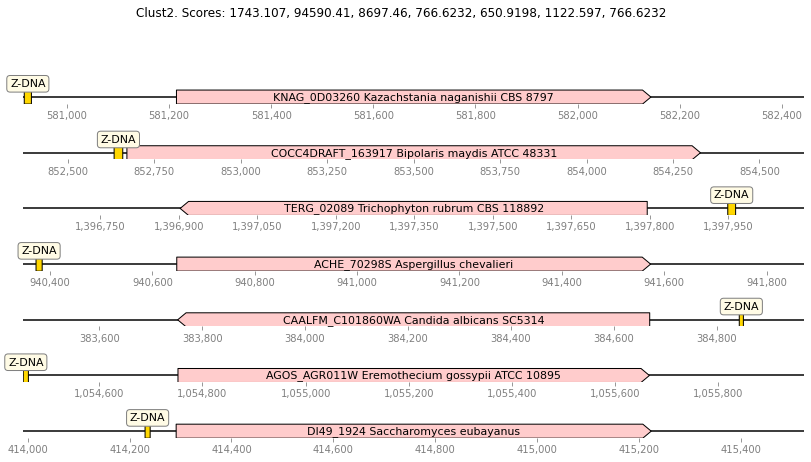

In [ ]:

scores = []
fig, ((ax1, ax2, ax3, ax4, ax5, ax6,ax7)) = plt.subplots(nrows=7, ncols=1,figsize=(14, 7))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]
for i in range(7): # для каждого рода
  
  zdna = lst[i].split('\'zdna\': ')[1].split('], ')[0].replace('[', '').replace('\'', '').split(', ')
  zdna = [int(zdna[0]), int(zdna[1])]
  gene = coords[i]
  label1='Z-DNA'
  label2= lst[i].split('\'gene\': ')[1].split('}')[0].replace('[', '').replace('\'', '') +' '+ columns_species[cols[i]]
  score = lst[i].split('\'zh-score\': ')[1].split(',')[0].replace('\'', '')
  scores.append(score)
  features=[
    GraphicFeature(start=zdna[0], end=zdna[1], color="#ffd700", 
                label=label1),
    GraphicFeature(start=gene[0], end=gene[1], color="#ffcccc", strand = strand[i],
                  label=label2),
    ]
  print(gene, zdna)
  record = GraphicRecord(sequence_length=gene[1] - gene[0] + 600, features=features, first_index=gene[0] - 300)
  record.plot(ax=ax[i])
  
fig.suptitle('Clust2' + '. Scores: ' + ', '.join(scores))
#fig.savefig('clust' + str(clust_number) +'.png')

# Кластер 5

In [ ]:
clusters.T[5].T

# Species                                                                                   48
Genes                                                                                       48
Alg.-Conn.                                                                                 1.0
ZDNA in promoter                                                                            29
Mean ZH-Score                                                                     37989.972827
Max ZH-Score                                                                          941334.2
protein_1.faa                                                          [['XP_003956089.1'], 0]
protein_2.faa                                [['XP_022462685.1'], 1, {'zdna': ['1253653', '...
protein_3.faa                                [['XP_041407924.1'], 1, {'zdna': ['265926', '2...
protein_4.faa                                [['SMN22335.1'], 1, {'zdna': ['237331', '23733...
protein_5.faa                                [['KA

In [ ]:
n = 0
for element in (clusters[['protein_5.faa', 'Bipolaris_victoriae_FI3.faa', 't.faa',
        'GCF_000315875.1_ASM31587v1_protein.faa', 'GCA_000227115.2.faa', 
        'GCA_002079055.1.faa']].T[5]):
  print(element)
  n += 1

[['KAG0662871.1'], 1, {'zdna': ['4970', '4985'], 'zh-score': '1820.585', 'promoter': ['4965', '5565'], 'prot': 'KAG0662871.1', 'gene': 'C6P45_000954'}, {'zdna': ['5031', '5046'], 'zh-score': '583.4285', 'promoter': ['4965', '5565'], 'prot': 'KAG0662871.1', 'gene': 'C6P45_000954'}, {'zdna': ['5120', '5131'], 'zh-score': '612.3848', 'promoter': ['4965', '5565'], 'prot': 'KAG0662871.1', 'gene': 'C6P45_000954'}, {'zdna': ['5175', '5192'], 'zh-score': '1323.054', 'promoter': ['4965', '5565'], 'prot': 'KAG0662871.1', 'gene': 'C6P45_000954'}, {'zdna': ['5198', '5212'], 'zh-score': '731.8227', 'promoter': ['4965', '5565'], 'prot': 'KAG0662871.1', 'gene': 'C6P45_000954'}, {'zdna': ['5268', '5281'], 'zh-score': '2091.083', 'promoter': ['4965', '5565'], 'prot': 'KAG0662871.1', 'gene': 'C6P45_000954'}, {'zdna': ['5304', '5314'], 'zh-score': '980.8116', 'promoter': ['4965', '5565'], 'prot': 'KAG0662871.1', 'gene': 'C6P45_000954'}, {'zdna': ['5329', '5353'], 'zh-score': '2659.79', 'promoter': ['4965

In [ ]:
strand = [1, 1, -1, 1, 1,1]
coords = [[5265,6491], [16920,18212], [22616, 23967], [1434266,1435489], [1398742,1399965], [787176,788324]]

In [ ]:
! pip install dna_features_viewer
from dna_features_viewer import GraphicFeature, GraphicRecord
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 12.5 MB/s 


In [ ]:
cols = ['protein_5.faa', 'Bipolaris_victoriae_FI3.faa', 't.faa',
        'GCF_000315875.1_ASM31587v1_protein.faa', 'GCA_000227115.2.faa', 
        'GCA_002079055.1.faa']
lst = clusters[cols].T[5]
lst

protein_5.faa                             [['KAG0662871.1'], 1, {'zdna': ['4970', '4985'...
Bipolaris_victoriae_FI3.faa               [['XP_014552082.1'], 1, {'zdna': ['16733', '16...
t.faa                                     [['EGE00380.1'], 1, {'zdna': ['23693', '23715'...
GCF_000315875.1_ASM31587v1_protein.faa    [['XP_003868918.1'], 1, {'zdna': ['1434150', '...
GCA_000227115.2.faa                       [['XP_003668852.1'], 1, {'zdna': ['1398880', '...
GCA_002079055.1.faa                       [['XP_033769882.1'], 1, {'zdna': ['787202', '7...
Name: 5, dtype: object

In [ ]:
len(lst)

7

[5265, 6491] [4970, 4985]
[16920, 18212] [16733, 16796]
[22616, 23967] [23693, 23715]
[1434266, 1435489] [1434150, 1434163]
[1398742, 1399965] [1398880, 1398895]
[787176, 788324] [787202, 787214]


Text(0.5, 0.98, 'Clust5. Scores: 1820.585, 74987.35, 8323.257, 2096.109, 2881.403, 13713.99')

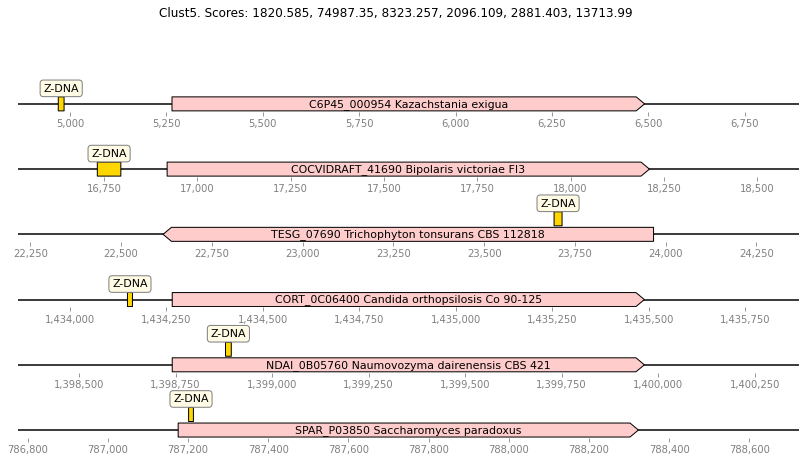

In [ ]:

scores = []
fig, ((ax1, ax2, ax3, ax4, ax5, ax6)) = plt.subplots(nrows=6, ncols=1,figsize=(14, 7))
ax = [ax1, ax2, ax3, ax4, ax5, ax6]
for i in range(6): # для каждого рода
  
  zdna = lst[i].split('\'zdna\': ')[1].split('], ')[0].replace('[', '').replace('\'', '').split(', ')
  zdna = [int(zdna[0]), int(zdna[1])]
  gene = coords[i]
  label1='Z-DNA'
  label2= lst[i].split('\'gene\': ')[1].split('}')[0].replace('[', '').replace('\'', '') +' '+ columns_species[cols[i]]
  score = lst[i].split('\'zh-score\': ')[1].split(',')[0].replace('\'', '')
  scores.append(score)
  features=[
    GraphicFeature(start=zdna[0], end=zdna[1], color="#ffd700", 
                label=label1),
    GraphicFeature(start=gene[0], end=gene[1], color="#ffcccc", strand = strand[i],
                  label=label2),
    ]
  print(gene, zdna)
  record = GraphicRecord(sequence_length=gene[1] - gene[0] + 800, features=features, first_index=gene[0] - 400)
  record.plot(ax=ax[i])
  
fig.suptitle('Clust5' + '. Scores: ' + ', '.join(scores))
#fig.savefig('clust' + str(clust_number) +'.png')

# Кластер 7

In [ ]:
clusters.T[7].T

# Species                                                                                   50
Genes                                                                                       50
Alg.-Conn.                                                                                 0.6
ZDNA in promoter                                                                            29
Mean ZH-Score                                                                     31399.653735
Max ZH-Score                                                                          941334.2
protein_1.faa                                                          [['XP_003956420.1'], 0]
protein_2.faa                                [['XP_022465439.1'], 1, {'zdna': ['300967', '3...
protein_3.faa                                                          [['XP_041404455.1'], 0]
protein_4.faa                                                              [['SMN18503.1'], 0]
protein_5.faa                                [['KA

In [ ]:
n = 0
for element in (clusters[['protein_5.faa', 't.faa',
                          'Ach.faa',
        'GCF_000235365.1_ASM23536v1_protein.faa', 'GCF_000315875.1_ASM31587v1_protein.faa']].T[7]):
  print(element)
  n += 1

[['KAG0667811.1'], 1, {'zdna': ['27772', '27785'], 'zh-score': '13713.99', 'promoter': ['27690', '28290'], 'prot': 'KAG0667811.1', 'gene': 'C6P45_005361'}, {'zdna': ['27829', '27849'], 'zh-score': '766.6232', 'promoter': ['27690', '28290'], 'prot': 'KAG0667811.1', 'gene': 'C6P45_005361'}, {'zdna': ['27915', '27927'], 'zh-score': '833.0093', 'promoter': ['27690', '28290'], 'prot': 'KAG0667811.1', 'gene': 'C6P45_005361'}, {'zdna': ['27930', '27946'], 'zh-score': '783.823', 'promoter': ['27690', '28290'], 'prot': 'KAG0667811.1', 'gene': 'C6P45_005361'}, {'zdna': ['28040', '28050'], 'zh-score': '783.823', 'promoter': ['27690', '28290'], 'prot': 'KAG0667811.1', 'gene': 'C6P45_005361'}, {'zdna': ['28084', '28096'], 'zh-score': '583.4285', 'promoter': ['27690', '28290'], 'prot': 'KAG0667811.1', 'gene': 'C6P45_005361'}, {'zdna': ['28102', '28114'], 'zh-score': '712.7101', 'promoter': ['27690', '28290'], 'prot': 'KAG0667811.1', 'gene': 'C6P45_005361'}, {'zdna': ['28138', '28158'], 'zh-score': '

In [ ]:
strand = [1, -1, 1, -1, 1]
coords = [[27990,29339], [34795,36246], [1940616,1942076], [678792,680249], [1334478,1335722]]

In [ ]:
! pip install dna_features_viewer
from dna_features_viewer import GraphicFeature, GraphicRecord
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 12.5 MB/s 


In [ ]:
cols = ['protein_5.faa', 't.faa',
                          'Ach.faa',
        'GCF_000235365.1_ASM23536v1_protein.faa', 'GCF_000315875.1_ASM31587v1_protein.faa']
lst = clusters[cols].T[7]
lst

protein_5.faa                             [['KAG0667811.1'], 1, {'zdna': ['27772', '2778...
t.faa                                     [['EGD97197.1'], 1, {'zdna': ['35954', '35966'...
Ach.faa                                   [['XP_043133739.1'], 1, {'zdna': ['1940867', '...
GCF_000235365.1_ASM23536v1_protein.faa    [['XP_003644898.1'], 1, {'zdna': ['678526', '6...
GCF_000315875.1_ASM31587v1_protein.faa    [['XP_003869617.1'], 1, {'zdna': ['1334635', '...
Name: 7, dtype: object

In [ ]:
len(lst)

5

[27990, 29339] [27772, 27785]
[34795, 36246] [35954, 35966]
[1940616, 1942076] [1940867, 1940877]
[678792, 680249] [680101, 680109]
[1334478, 1335722] [1334635, 1334641]


Text(0.5, 0.98, 'Clust7. Scores: 13713.99, 752.603, 13713.99, 883.5764, 883.5764')

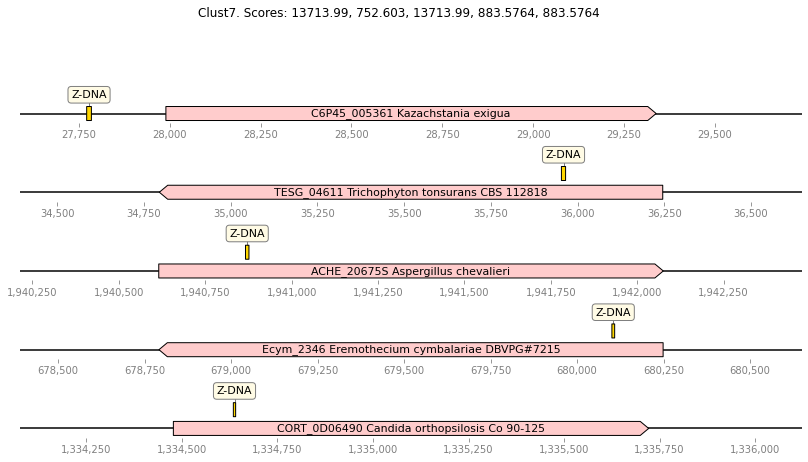

In [ ]:

scores = []
fig, ((ax1, ax2, ax3, ax4, ax5)) = plt.subplots(nrows=5, ncols=1,figsize=(14, 7))
ax = [ax1, ax2, ax3, ax4, ax5]
for i in range(5): # для каждого рода
  if i == 3:
    zdna = lst[i].split('\'zdna\': ')[5].split('], ')[0].replace('[', '').replace('\'', '').split(', ')
  else:
    zdna = lst[i].split('\'zdna\': ')[1].split('], ')[0].replace('[', '').replace('\'', '').split(', ')
  zdna = [int(zdna[0]), int(zdna[1])]
  gene = coords[i]
  label1='Z-DNA'
  label2= lst[i].split('\'gene\': ')[1].split('}')[0].replace('[', '').replace('\'', '') +' '+ columns_species[cols[i]]
  if i == 3:
    score = lst[i].split('\'zh-score\': ')[5].split(',')[0].replace('\'', '')
  else:
    score = lst[i].split('\'zh-score\': ')[1].split(',')[0].replace('\'', '')
  scores.append(score)
  features=[
    GraphicFeature(start=zdna[0], end=zdna[1], color="#ffd700", 
                label=label1),
    GraphicFeature(start=gene[0], end=gene[1], color="#ffcccc", strand = strand[i],
                  label=label2),
    ]
  print(gene, zdna)
  record = GraphicRecord(sequence_length=gene[1] - gene[0] + 800, features=features, first_index=gene[0] - 400)
  record.plot(ax=ax[i])
  
fig.suptitle('Clust7' + '. Scores: ' + ', '.join(scores))
#fig.savefig('clust' + str(clust_number) +'.png')

# Выравнивание

## Аминокислотные последовательности

In [ ]:
faa_names = [
             [
              'drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/Kazachstania_africana_CBS_2517_protein.faa',
              'drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/Kazachstania_naganishii_CBS 8797_protein.faa',
              'drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/Kazachstania_barnettii_protein.faa',
              'drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/Kazachstania_saulgeensis_protein.faa',
              'drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/Kazachstania_exigua_protein.faa'
             ],
             [
              'drive/MyDrive/group_project_bioinf/Зелина_Полина/protein1.faa',
              'drive/MyDrive/group_project_bioinf/Зелина_Полина/protein2.faa',
              'drive/MyDrive/group_project_bioinf/Зелина_Полина/protein3.faa',
              'drive/MyDrive/group_project_bioinf/Зелина_Полина/protein4.faa',
              'drive/MyDrive/group_project_bioinf/Зелина_Полина/protein5.faa'
             ],
             [
              'drive/MyDrive/group_project_bioinf/Коновалов_Егор/1protein_aa.faa',
              'drive/MyDrive/group_project_bioinf/Коновалов_Егор/2protein_ar.faa',
              'drive/MyDrive/group_project_bioinf/Коновалов_Егор/3protein_oa.faa',
              'drive/MyDrive/group_project_bioinf/Коновалов_Егор/4protein_oh.faa',
              'drive/MyDrive/group_project_bioinf/Коновалов_Егор/5protein_op.faa',
             ],
             [
              'drive/MyDrive/group_project_bioinf/Крымов_Александр/Bipolaris_maydis_ATCC_48331.faa',
              'drive/MyDrive/group_project_bioinf/Крымов_Александр/Bipolaris_oryzae_ATCC_44560.faa',
              'drive/MyDrive/group_project_bioinf/Крымов_Александр/Bipolaris_sorokiniana_ND90Pr.faa',
              'drive/MyDrive/group_project_bioinf/Крымов_Александр/Bipolaris_victoriae_FI3.faa',
              'drive/MyDrive/group_project_bioinf/Крымов_Александр/Bipolaris_zeicola_26-R-13.faa'
              ],
             [
              'drive/MyDrive/group_project_bioinf/Михайлова_Ксения/Trichophyton_equinum.faa',
              'drive/MyDrive/group_project_bioinf/Михайлова_Ксения/Trichophyton_interdigitale.faa',
              'drive/MyDrive/group_project_bioinf/Михайлова_Ксения/Trichophyton_rubrum.faa',
              'drive/MyDrive/group_project_bioinf/Михайлова_Ксения/Trichophyton_tonsurans.faa',
              'drive/MyDrive/group_project_bioinf/Михайлова_Ксения/Trichophyton_verrucosum.faa'
             ],
             [
              '/content/drive/MyDrive/group_project_bioinf/Петропавловский_Андрей/GCA_001664025.1.protein.faa',
              '/content/drive/MyDrive/group_project_bioinf/Петропавловский_Андрей/GCA_001747045.1.protein.faa',
              '/content/drive/MyDrive/group_project_bioinf/Петропавловский_Андрей/GCA_001749795.1.protein.faa',
              '/content/drive/MyDrive/group_project_bioinf/Петропавловский_Андрей/GCA_017311265.1.protein.faa',
              '/content/drive/MyDrive/group_project_bioinf/Петропавловский_Андрей/GCA_017311285.1.protein.faa'
             ],
             [
              '/content/drive/MyDrive/group_project_bioinf/Сесикова_Ксения/GCA_000149555.1_ASM14955v1_protein.faa',
              '/content/drive/MyDrive/group_project_bioinf/Сесикова_Ксения/GCA_000303195.2_FP7_protein.faa',
              '/content/drive/MyDrive/group_project_bioinf/Сесикова_Ксения/GCA_019609905.1_ASM1960990v1_protein.faa',
              '/content/drive/MyDrive/group_project_bioinf/Сесикова_Ксения/GCA_019915245.1_ASM1991524v1_protein.faa',
              '/content/drive/MyDrive/group_project_bioinf/Сесикова_Ксения/GCA_900007375.1_ASM90000737v1_protein.faa'
             ],
             [
              '/content/drive/MyDrive/group_project_bioinf/Чекова_Милена/GCF_016861735.1_AchevalieriM1_assembly01_protein.faa',
              '/content/drive/MyDrive/group_project_bioinf/Чекова_Милена/GCF_014117465.1_ASM1411746v1_protein.faa',
              '/content/drive/MyDrive/group_project_bioinf/Чекова_Милена/GCF_000002655.1_ASM265v1_protein.faa',
              '/content/drive/MyDrive/group_project_bioinf/Чекова_Милена/GCF_016861735.1_AchevalieriM1_assembly01_protein.faa',
              '/content/drive/MyDrive/group_project_bioinf/Чекова_Милена/GCF_016861865.1_ApuulaauensisMK2_assembly01_protein.faa'
             ],
             [
              '/content/drive/MyDrive/group_project_bioinf/Шагалкина_Дарья/GCF_000026945.1_protein.faa',
              '/content/drive/MyDrive/group_project_bioinf/Шагалкина_Дарья/GCF_000091025.4_protein.faa',
              '/content/drive/MyDrive/group_project_bioinf/Шагалкина_Дарья/GCF_000182965.3_protein.faa',
              '/content/drive/MyDrive/group_project_bioinf/Шагалкина_Дарья/GCF_000235365.1_protein.faa',
              '/content/drive/MyDrive/group_project_bioinf/Шагалкина_Дарья/GCF_000315875.1_protein.faa'
             ],
             [
              '/content/drive/MyDrive/group_project_bioinf/Шилова_Ксения/GCA_000227115.2.faa',
              '/content/drive/MyDrive/group_project_bioinf/Шилова_Ксения/GCA_000237345.1.faa',
              '/content/drive/MyDrive/group_project_bioinf/Шилова_Ксения/GCA_000292725.1.faa',
              '/content/drive/MyDrive/group_project_bioinf/Шилова_Ксения/GCA_001298625.1.faa',
              '/content/drive/MyDrive/group_project_bioinf/Шилова_Ксения/GCA_002079055.1.faa'
             ]
]

In [ ]:
clust = clusters.T[2].T [6:]
clust

protein_1.faa                                                          [['XP_003958047.1'], 0]
protein_2.faa                                [['XP_022464318.1'], 1, {'zdna': ['580917', '5...
protein_3.faa                                                          [['XP_041408407.1'], 0]
protein_4.faa                                                              [['SMN21927.1'], 0]
protein_5.faa                                [['KAG0654520.1'], 1, {'zdna': ['1', '67'], 'z...
protein1.faa                                                               [['SCV00528.1'], 0]
protein2.faa                                                               [['CUS20700.1'], 0]
protein3.faa                                                           [['XP_022629808.1'], 0]
protein4.faa                                                               [['SCW00962.1'], 0]
protein5.faa                                 [['XP_002552903.1'], 1, {'zdna': ['393327', '3...
protein_aa.faa                               [['XP

In [ ]:
len(clust)

50

In [ ]:
res_file = []
prots=[]
for i in range(len(clust)):
#for i in range(2):
  el=clust[i]
  file_name = faa_names[i//5][i%5]
  file1 = open(file_name, "r")
  lines = file1.readlines()
  print(file_name)
  #print(el[-2])
  if '0'!=el[-2]:
    for i in range(1, len(el.split('\'prot\': '))):
      prot = el.split('\'prot\': ')[i].split(',')[0].replace('\'', '')
      if prot in prots:
        continue
      prots.append(prot)
      #print(prot)
      for j in range(len(lines)):
        line = lines[j]
        if prot in line:
          res_file.append(line)
          for k in range(j+1, len(lines)):
            line = lines[k]
            if '>' in line:
              break
            res_file.append(line)
          break
      
  file1.close  

drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/Kazachstania_africana_CBS_2517_protein.faa
drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/Kazachstania_naganishii_CBS 8797_protein.faa
drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/Kazachstania_barnettii_protein.faa
drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/Kazachstania_saulgeensis_protein.faa
drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/Kazachstania_exigua_protein.faa
drive/MyDrive/group_project_bioinf/Зелина_Полина/protein1.faa
drive/MyDrive/group_project_bioinf/Зелина_Полина/protein2.faa
drive/MyDrive/group_project_bioinf/Зелина_Полина/protein3.faa
drive/MyDrive/group_project_bioinf/Зелина_Полина/protein4.faa
drive/MyDrive/group_project_bioinf/Зелина_Полина/protein5.faa
drive/MyDrive/group_project_bioinf/Коновалов_Егор/1protein_aa.faa
drive/MyDrive/group_project_bioinf/Коновалов_Егор/2protein_ar.faa
drive/MyDrive/group_project_bioinf/Коновалов_Егор/3protein_oa.faa
drive/MyDrive/group_project_bi

In [ ]:
f = open( 'clust2_aminoacid.fasta', 'w' )
f.write(''.join(res_file));
f.close()

## Нуклеотидные последовательности

In [ ]:
columns_species = {
       'protein_1.faa': 'Kazachstania africana CBS 2517',
       'protein_2.faa' : 'Kazachstania naganishii CBS 8797',
       'protein_3.faa' : 'Kazachstania barnettii]',
       'protein_4.faa' : 'Kazachstania saulgeensis',
       'protein_5.faa' : 'Kazachstania exigua',

        'protein1.faa' : 'Lachancea fermentati',
        'protein2.faa' : 'Lachancea lanzarotensis',
        'protein3.faa' : 'Lachancea mirantina',
        'protein4.faa' : 'Lachancea quebecensis',
        'protein5.faa' : 'Lachancea thermotolerans CBS 6340',
        
        'protein_aa.faa' : 'Alternaria atra',
        'protein_ar.faa' : 'Alternaria rosae',
        'protein_oa.faa' : 'Ogataea angusta',
        'protein_oh.faa' : 'Ogataea haglerorum',
        'protein_op.faa' : 'Ogataea polymorpha',

        'Bipolaris_maydis_ATCC_48331.faa' : 'Bipolaris maydis ATCC 48331',
        'Bipolaris_oryzae_ATCC_44560.faa' : 'Bipolaris oryzae ATCC 44560',
        'Bipolaris_sorokiniana_ND90Pr.faa' : 'Bipolaris sorokiniana ND90Pr',
        'Bipolaris_victoriae_FI3.faa' : 'Bipolaris victoriae FI3',
        'Bipolaris_zeicola_26-R-13.faa' : 'Bipolaris zeicola 26-R-13',
       
        'e.faa' : 'Trichophyton equinum CBS 127.97',
        'i.faa' : 'Trichophyton interdigitale',
        'r.faa' : 'Trichophyton rubrum CBS 118892',
        't.faa' : 'Trichophyton tonsurans CBS 112818',
        'v.faa' : 'Trichophyton verrucosum HKI 0517',
       
        'GCA_001664025.1.faa' : 'Hanseniaspora valbyensis NRRL Y-1626',
        'GCA_001747045.1.faa' : 'Hanseniaspora osmophila',
        'GCA_001749795.1.faa' : 'Hanseniaspora opuntiae',
        'GCA_017311265.1.faa' : 'Pneumocystis canis',
        'GCA_017311285.1.faa' : 'Pneumocystis oryctolagi',

        'GCA_000149555.1_ASM14955v1_protein.faa' : 'Fusarium verticillioides 7600',
        'GCA_000303195.2_FP7_protein.faa' : 'Fusarium pseudograminearum CS3096',
        'GCA_019609905.1_ASM1960990v1_protein.faa' : 'Fusarium poae',
        'GCA_019915245.1_ASM1991524v1_protein.faa' : 'Fusarium musae',
        'GCA_900007375.1_ASM90000737v1_protein.faa' : 'Fusarium venenatum',
       
        'Ach.faa' : 'Aspergillus chevalieri',
        'Afl.faa' : 'Aspergillus flavus NRRL3357',
        'Afu.faa' : 'Aspergillus fumigatus Af293',
        'Alu.faa' : 'Aspergillus luchuensis',
        'Apu.faa' : 'Aspergillus puulaauensis',

        'GCF_000026945.1_ASM2694v1_protein.faa' : 'Candida dubliniensis CD36',
        'GCF_000091025.4_ASM9102v4_protein.faa' : 'Eremothecium gossypii ATCC 10895',
        'GCF_000182965.3_ASM18296v3_protein.faa' : 'Candida albicans SC5314',
        'GCF_000235365.1_ASM23536v1_protein.faa' : 'Eremothecium cymbalariae DBVPG#7215',
        'GCF_000315875.1_ASM31587v1_protein.faa' : 'Candida orthopsilosis Co 90-125',
       
        'GCA_000227115.2.faa' : 'Naumovozyma dairenensis CBS 421',
        'GCA_000237345.1.faa' : 'Naumovozyma castellii CBS 4309',
        'GCA_000292725.1.faa' : 'Saccharomyces arboricola H-6',
        'GCA_001298625.1.faa' : 'Saccharomyces eubayanus',
        'GCA_002079055.1.faa' : 'Saccharomyces paradoxus'
       }


In [ ]:
file_names_fna = [
                           '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Коновалов_Егор/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Крымов_Александр/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Михайлова_Ксения/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Петропавловский_Андрей/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Сесикова_Ксения/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Чекова_Милена/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Шагалкина_Дарья/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Шилова_Ксения/fna'
]
for i in range(10):
  lst = []
  for j in range(5):
    lst.append(file_names_fna[i] + '/'+ str(j+1) + '.fna')
  file_names_fna[i] = lst
file_names_fna

[['/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/fna/1.fna',
  '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/fna/2.fna',
  '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/fna/3.fna',
  '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/fna/4.fna',
  '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/fna/5.fna'],
 ['/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/fna/1.fna',
  '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/fna/2.fna',
  '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/fna/3.fna',
  '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/fna/4.fna',
  '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/fna/5.fna'],
 ['/content/drive/MyDrive/group_project_bioinf/Коновалов_Егор/fna/1.fna',
  '/content/drive/MyDrive/group_project_bioinf/Коновалов_Егор/fna/2.fna',
  '/content/drive/MyDrive/group_project_bioinf/Коновалов_Егор/fna/3.fna',
  '/content/drive/MyD

In [ ]:
file_names_gtf = [
                           '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/gtf',
                           '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/gtf',
                           '/content/drive/MyDrive/group_project_bioinf/Коновалов_Егор/gtf',
                           '/content/drive/MyDrive/group_project_bioinf/Крымов_Александр/gtf',
                           '/content/drive/MyDrive/group_project_bioinf/Михайлова_Ксения/gtf',
                           '/content/drive/MyDrive/group_project_bioinf/Петропавловский_Андрей/gtf',
                           '/content/drive/MyDrive/group_project_bioinf/Сесикова_Ксения/gtf',
                           '/content/drive/MyDrive/group_project_bioinf/Чекова_Милена/gtf',
                           '/content/drive/MyDrive/group_project_bioinf/Шагалкина_Дарья/gtf',
                           '/content/drive/MyDrive/group_project_bioinf/Шилова_Ксения/gtf'
]
for i in range(10):
  lst = []
  for j in range(5):
    lst.append(file_names_gtf[i] + '/'+ str(j+1) + '.gtf')
  file_names_gtf[i] = lst
file_names_gtf

[['/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/gtf/1.gtf',
  '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/gtf/2.gtf',
  '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/gtf/3.gtf',
  '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/gtf/4.gtf',
  '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/gtf/5.gtf'],
 ['/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/gtf/1.gtf',
  '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/gtf/2.gtf',
  '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/gtf/3.gtf',
  '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/gtf/4.gtf',
  '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/gtf/5.gtf'],
 ['/content/drive/MyDrive/group_project_bioinf/Коновалов_Егор/gtf/1.gtf',
  '/content/drive/MyDrive/group_project_bioinf/Коновалов_Егор/gtf/2.gtf',
  '/content/drive/MyDrive/group_project_bioinf/Коновалов_Егор/gtf/3.gtf',
  '/content/drive/MyD

In [ ]:
def get_gene_coords_Shilova_Zelina(file_name, gene_find):
  genes = {} #словарь
  file1 = open(file_name, "r")
  sum1 = 0
  while True:
      line = file1.readline()
      if not line:
          break
      if ('gene' in line) or ('RefSeq gene' in line) or ('Genbank	gene' in line) or ('EMBL	gene' in line):
        stop = int(line.strip().split('\t')[4])
        start = int(line.strip().split('\t')[3])
        strand = line.strip().split('\t')[6]
        gene_id = ((line.strip().split('gene_id')[1]).split(';')[0]).replace('\"', '').replace(' ', '')
        if gene_find == gene_id:
          file1.close
          return [(start, stop), strand]
  file1.close

In [ ]:
def get_gene_coords_Sesikova(file_name, gene_find):
  genes = {} #словарь
  file1 = open(file_name, "r")
  sum1 = 0
  while True:
      line = file1.readline()
      if not line:
          break
      if ('gene' in line) or ('Genbank	gene' in line) or ('EMBL	gene' in line):
        stop = int(line.strip().split('\t')[4])
        start = int(line.strip().split('\t')[3])
        strand = line.strip().split('\t')[6]
        gene_id = ((line.strip().split('gene_id')[1]).split(';')[0]).replace('\"', '').replace(' ', '')
        if gene_find == gene_id:
          file1.close
          return [(start, stop), strand]
  file1.close

In [ ]:
def get_gene_coords_Chekova(file_name, gene_find):
  genes = {} #словарь
  file1 = open(file_name, "r")
  sum1 = 0
  while True:
      line = file1.readline()
      if not line:
          break
      if ('Genbank	gene' in line) or ('EMBL	gene' in line) or ('DDBJ	gene' in line):
        stop = int(line.strip().split('\t')[4])
        start = int(line.strip().split('\t')[3])  
        strand = line.strip().split('\t')[6]
        gene_id = ((line.strip().split('ID=gene-')[1])).split(';')[0]
        if gene_find == gene_id:
          file1.close
          return [(start, stop), strand]
  file1.close

In [ ]:
def get_gene_coords_Shagalkina(file_name, gene_find):
  genes = {} #словарь
  file1 = open(file_name, "r")
  sum1 = 0
  while True:
      line = file1.readline()
      if not line:
          break
      if ('RefSeq	gene' in line) or ('Genbank	gene' in line) or ('EMBL	gene' in line):
        stop = int(line.strip().split('\t')[4])
        start = int(line.strip().split('\t')[3])
        strand = line.strip().split('\t')[6]
        gene_id = ((line.strip().split('gene_id')[1]).split(';')[0]).replace('\"', '').replace(' ', '')
        if gene_find == gene_id:
          file1.close
          return [(start, stop), strand]
  file1.close

In [ ]:
def get_gene_coords_Krymov(file_name, gene_find):
  genes = {} #словарь
  file1 = open(file_name, "r")
  sum1 = 0
  while True:
      line = file1.readline()
      if not line:
          break
      if ('Genbank	gene' in line) or ('EMBL	gene' in line) or ('RefSeq	gene' in line):
        stop = int(line.strip().split('\t')[4])
        start = int(line.strip().split('\t')[3])
        strand = line.strip().split('\t')[6]
        gene_id = ((line.strip().split('ID=gene-')[1])).split(';')[0]
        if gene_find == gene_id:
          file1.close
          return [(start, stop), strand]
  file1.close

In [ ]:
def get_gene_coords_Michailova(file_name, gene_find):
  genes = {} #словарь
  file1 = open(file_name, "r")
  sum1 = 0
  while True:
      line = file1.readline()
      if not line:
          break
      if ('gene' in line) or ('Genbank	gene' in line) or ('EMBL	gene' in line):
        stop = int(line.strip().split('\t')[4])
        start = int(line.strip().split('\t')[3])
        strand = line.strip().split('\t')[6]
        gene_id = ((line.strip().split('gene_id')[1]).split(';')[0]).replace('\"', '').replace(' ', '')
        if gene_find == gene_id:
          file1.close
          return [(start, stop), strand]
  file1.close

In [ ]:
def get_gene_coords_Konovalov(file_name, gene_find):
  genes = {} #словарь
  file1 = open(file_name, "r")
  sum1 = 0
  while True:
      line = file1.readline()
      if not line:
          break
      if ('RefSeq	gene' in line) or ('Genbank	gene' in line) or ('EMBL	gene' in line):
        stop = int(line.strip().split('\t')[4])
        start = int(line.strip().split('\t')[3])
        strand = line.strip().split('\t')[6]
        gene_id = ((line.strip().split('gene_id')[1]).split(';')[0]).replace('\"', '').replace(' ', '')
        if gene_find == gene_id:
          file1.close
          return [(start, stop), strand]
  file1.close

In [ ]:
def get_gene_coords_Nadya(file_name, gene_find):
  genes = {} #словарь
  file1 = open(file_name, "r")
  sum1 = 0
  #print(file_name)
  while True:
      line = file1.readline()
      if not line:
          break
      if ('RefSeq	gene' in line) or ('Genbank	gene' in line) or ('EMBL	gene' in line):
        stop = int(line.strip().split('\t')[4])
        start = int(line.strip().split('\t')[3])
        strand = line.strip().split('\t')[6]
        gene_id = ((line.strip().split('gene_id')[1]).split(';')[0]).replace('\"', '').replace(' ', '')
        
        if gene_find == gene_id:
          file1.close
          return [(start, stop), strand]
  file1.close

In [ ]:
def get_gene_coords_Andrey(file_name, gene_find):
  genes = {} #словарь
  file1 = open(file_name, "r")
  sum1 = 0
  while True:
      line = file1.readline()
      if not line:
          break
      if ('gene' in line) or ('Genbank	gene' in line) or ('EMBL	gene' in line):
        stop = int(line.strip().split('\t')[4])
        start = int(line.strip().split('\t')[3])
        strand = line.strip().split('\t')[6]
        gene_id = ((line.strip().split('gene_id')[1]).split(';')[0]).replace('\"', '').replace(' ', '')
        if gene_find == gene_id:
          file1.close
          return [(start, stop), strand]
  file1.close

In [ ]:
def get_coords(gene_find, number1, number2):
  if number1 == 0:
    return get_gene_coords_Nadya(file_names_gtf[number1][number2], gene_find)
  if (number1 == 1) or (number1 == 9):
    return get_gene_coords_Shilova_Zelina(file_names_gtf[number1][number2], gene_find)
  if number1 == 2:
    return get_gene_coords_Konovalov(file_names_gtf[number1][number2], gene_find)
  if number1 == 3:
    return get_gene_coords_Krymov(file_names_gtf[number1][number2], gene_find)
  if number1 == 4:
    return get_gene_coords_Michailova(file_names_gtf[number1][number2], gene_find)
  if number1 == 5:
    return get_gene_coords_Andrey(file_names_gtf[number1][number2], gene_find)
  if number1 == 6:
    return get_gene_coords_Sesikova(file_names_gtf[number1][number2], gene_find)
  if number1 == 7:
    return get_gene_coords_Chekova(file_names_gtf[number1][number2], gene_find)
  if number1 == 8:
    return get_gene_coords_Shagalkina(file_names_gtf[number1][number2], gene_find)




In [ ]:
clust = clusters.T[7].T [6:]
clust

protein_1.faa                                                          [['XP_003956420.1'], 0]
protein_2.faa                                [['XP_022465439.1'], 1, {'zdna': ['300967', '3...
protein_3.faa                                                          [['XP_041404455.1'], 0]
protein_4.faa                                                              [['SMN18503.1'], 0]
protein_5.faa                                [['KAG0667811.1'], 1, {'zdna': ['27772', '2778...
protein1.faa                                                               [['SCU87808.1'], 0]
protein2.faa                                                               [['CUS22981.1'], 0]
protein3.faa                                                           [['XP_022626780.1'], 0]
protein4.faa                                                               [['SCW01077.1'], 0]
protein5.faa                                 [['XP_002553760.1'], 1, {'zdna': ['594593', '5...
protein_aa.faa                               [['XP

In [ ]:
res_file = []
genes=[]
for i in range(len(clust)):
  el=clust[i]
  file_name = file_names_fna[i//5][i%5]
  file1 = open(file_name, "r")
  lines = np.array(file1.readlines())
  lines = lines[['>' not in line for line in lines]]
  line = ''.join(lines)
  line = line.replace('\n', '')
  
  #print(file_name)
  #print(el[-2])
  if '0'!=el[-2]:
    for j in range(1, len(el.split('\'gene\': '))):
      gene = el.split('\'gene\': ')[j].split(',')[0].replace('\'', '').split('}')[0]
      #print(gene)
      if gene in genes:
        continue
      if gene == '*':
        continue
      genes.append(gene)
      res_gtf = get_coords(gene, i//5, i%5)
      coords = res_gtf[0]
      strand = res_gtf[1]
      #print(coords)
      res_file.append('>' + gene + ' ' + columns_species[clust.index[i]] + '\n')
      if strand=='+':      
        res_file.append(line[int(coords[0]):(int(coords[1])+1)] + '\n')
      else: # переворачиваем строку
        res_file.append((line[int(coords[0]):(int(coords[1])+1)])[::-1] + '\n')    
  
  file1.close  

In [ ]:
f = open( 'clust7_nucleotide.fasta', 'w' )
f.write(''.join(res_file));
f.close()

Теперь запоминаем еще где ZDNA

In [ ]:
clust = clusters.T[7].T [6:]
clust

protein_1.faa                                                          [['XP_003956420.1'], 0]
protein_2.faa                                [['XP_022465439.1'], 1, {'zdna': ['300967', '3...
protein_3.faa                                                          [['XP_041404455.1'], 0]
protein_4.faa                                                              [['SMN18503.1'], 0]
protein_5.faa                                [['KAG0667811.1'], 1, {'zdna': ['27772', '2778...
protein1.faa                                                               [['SCU87808.1'], 0]
protein2.faa                                                               [['CUS22981.1'], 0]
protein3.faa                                                           [['XP_022626780.1'], 0]
protein4.faa                                                               [['SCW01077.1'], 0]
protein5.faa                                 [['XP_002553760.1'], 1, {'zdna': ['594593', '5...
protein_aa.faa                               [['XP

In [ ]:
res_file = []
genes=[]
for i in range(len(clust)):
  el=clust[i]
  file_name = file_names_fna[i//5][i%5]
  file1 = open(file_name, "r")
  lines = np.array(file1.readlines())
  lines = lines[['>' not in line for line in lines]]
  line = ''.join(lines)
  line = line.replace('\n', '')
  # Запоминаем где zdna
  for j in range(1, len(el.split('\'zdna\': '))):
      zdna = el.split('\'zdna\': ')[j].split(']')[0].replace('\'', '').replace('[', '').split(', ')
      zdna = [int(zdna[0]), int(zdna[1])]
      #print(len(line))
      line = line[:zdna[0]] + 'Z'*(zdna[1]-zdna[0]+1) + line[(zdna[1]+1): ]
      #print(len(line))
  #print(file_name)
  #print(el[-2])
  if '0'!=el[-2]:
    for j in range(1, len(el.split('\'gene\': '))):
      gene = el.split('\'gene\': ')[j].split(',')[0].replace('\'', '').split('}')[0]
      if gene in genes:
        continue
      if gene == '*':
        continue
      genes.append(gene)
      res_gtf = get_coords(gene, i//5, i%5)
      coords = res_gtf[0]
      strand = res_gtf[1]
      #print(coords)
      res_file.append('>' + gene + ' ' + columns_species[clust.index[i]] + '\n')
      if strand=='+':      
        res_file.append(line[int(coords[0]):(int(coords[1])+1)] + '\n')
      else: # переворачиваем строку
        res_file.append((line[int(coords[0]):(int(coords[1])+1)])[::-1] + '\n')    
  
  file1.close  

In [ ]:
f = open( 'clust7_nucleotide_ZDNA.fasta', 'w' )
f.write(''.join(res_file));
f.close()

# Бонус. Анализ и Тепловая карта по квадруплексам

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
genomes50_sorted = pd.read_csv('drive/MyDrive/group_project_bioinf/genomes50_1.txt',
                               names=['# Species', 'Genes', 'Alg.-Conn.', '_protein_1.faa', '_protein_10.faa',
       '_protein_2.faa', '_protein_3.faa', '_protein_4.faa', '_protein_5.faa',
       '_protein_6.faa', '_protein_7.faa', '_protein_8.faa', '_protein_9.faa',
       'protein_1.faa', 'protein_2.faa', 'protein_3.faa', 'protein_4.faa',
       'protein_5.faa', 'protein1.faa', 'protein2.faa', 'protein3.faa',
       'protein4.faa', 'protein5.faa', 'protein_aa.faa', 'protein_ar.faa',
       'protein_oa.faa', 'protein_oh.faa', 'protein_op.faa',
       'Bipolaris_maydis_ATCC_48331.faa', 'Bipolaris_oryzae_ATCC_44560.faa',
       'Bipolaris_sorokiniana_ND90Pr.faa', 'Bipolaris_victoriae_FI3.faa',
       'Bipolaris_zeicola_26-R-13.faa', 'e.faa', 'i.faa', 'r.faa', 't.faa',
       'v.faa', 'GCA_001664025.1.faa', 'GCA_001747045.1.faa',
       'GCA_001749795.1.faa', 'GCA_017311265.1.faa', 'GCA_017311285.1.faa',
       'GCA_000149555.1_ASM14955v1_protein.faa',
       'GCA_000303195.2_FP7_protein.faa',
       'GCA_019609905.1_ASM1960990v1_protein.faa',
       'GCA_019915245.1_ASM1991524v1_protein.faa',
       'GCA_900007375.1_ASM90000737v1_protein.faa', 'Ach.faa', 'Afl.faa',
       'Afu.faa', 'Alu.faa', 'Apu.faa',
       'GCF_000026945.1_ASM2694v1_protein.faa',
       'GCF_000091025.4_ASM9102v4_protein.faa',
       'GCF_000182965.3_ASM18296v3_protein.faa',
       'GCF_000235365.1_ASM23536v1_protein.faa',
       'GCF_000315875.1_ASM31587v1_protein.faa', 'GCA_000227115.2.faa',
       'GCA_000237345.1.faa', 'GCA_000292725.1.faa', 'GCA_001298625.1.faa',
       'GCA_002079055.1.faa'], sep = '\t' )
genomes50_sorted

,# Species,Genes,Alg.-Conn.,_protein_1.faa,_protein_10.faa,_protein_2.faa,_protein_3.faa,_protein_4.faa,_protein_5.faa,_protein_6.faa,...,GCF_000026945.1_ASM2694v1_protein.faa,GCF_000091025.4_ASM9102v4_protein.faa,GCF_000182965.3_ASM18296v3_protein.faa,GCF_000235365.1_ASM23536v1_protein.faa,GCF_000315875.1_ASM31587v1_protein.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
0,50,50,1.000,XP_041408609.1,EJS43772.1,SCW00957.1,XP_018210662.1,XP_007686571.1,KAG8205321.1,OEJ81173.1,...,XP_002418283.1,NP_986680.1,XP_721019.2,XP_003647986.1,XP_003866934.1,XP_003669940.1,XP_003673140.1,EJS43772.1,XP_018222186.1,XP_033766318.1
1,49,50,1.000,XP_041404458.1,EJS43804.1,SCW01074.1,XP_018212049.1,XP_007692909.1,KAG8211841.1,OEJ81175.1,...,XP_002418126.1,NP_985742.1,XP_722518.1,XP_003647410.1,XP_003866532.1,XP_003668469.1,"XP_003674903.1,XP_003675007.1",EJS43804.1,XP_018222057.1,XP_033766188.1
2,47,47,1.000,XP_041406909.1,*,SCW03569.1,XP_018213131.1,XP_007684881.1,KAG8206147.1,OEJ81176.1,...,XP_002422135.1,NP_984155.2,XP_713488.2,XP_003645100.1,XP_003869489.1,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
3,49,49,1.000,XP_041404300.1,EJS41670.1,SCW02338.1,XP_018210650.1,XP_007687408.1,KAG8212437.1,OEJ81179.1,...,XP_002418262.1,NP_985684.1,XP_715332.2,XP_003644872.1,XP_003866918.1,XP_003669045.1,XP_003677882.1,EJS41670.1,XP_018219354.1,XP_033769271.1
4,43,43,0.168,XP_041405447.1,EJS42115.1,SCW04580.1,XP_018212816.1,"XP_007689867.1,XP_007690531.1",KAG8207719.1,OEJ81180.1,...,XP_002420421.1,NP_984663.1,XP_715717.2,XP_003645826.1,XP_003870319.1,XP_003668006.1,XP_003673930.1,EJS42115.1,XP_018219604.1,XP_033768672.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,29,33,1.000,*,*,*,*,*,*,OEJ82253.1,...,XP_002420286.1,*,XP_715419.2,XP_003645024.1,XP_003867264.1,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10031,30,34,1.000,*,*,*,*,*,*,OEJ87457.1,...,XP_002416814.1,NP_982719.1,XP_718158.1,XP_003645386.1,XP_003868172.1,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10032,30,36,1.000,*,*,*,*,*,*,OEJ87790.1,...,"XP_002418741.1,XP_002421397.1,XP_002421400.1",*,XP_716059.2,XP_003646765.1,*,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10033,29,33,1.000,*,*,*,*,*,*,OEJ91420.1,...,XP_002421786.1,NP_986078.1,XP_718277.1,XP_003644518.1,*,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1


In [ ]:
genomes_bonus = genomes50_sorted[['# Species', 'Genes', 'Alg.-Conn.', 
                                  'e.faa', 'i.faa', 'r.faa', 't.faa',
       'v.faa','GCA_000227115.2.faa','GCA_000237345.1.faa', 
       'GCA_000292725.1.faa', 'GCA_001298625.1.faa', 'GCA_002079055.1.faa']]
genomes_bonus

,# Species,Genes,Alg.-Conn.,e.faa,i.faa,r.faa,t.faa,v.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
0,50,50,1.000,EGE08269.1,KAG8205321.1,EGD88434.1,EGD98773.1,EFE39545.1,XP_003669940.1,XP_003673140.1,EJS43772.1,XP_018222186.1,XP_033766318.1
1,49,50,1.000,EGE09583.1,KAG8211841.1,*,EGD94110.1,EFE38465.1,XP_003668469.1,"XP_003674903.1,XP_003675007.1",EJS43804.1,XP_018222057.1,XP_033766188.1
2,47,47,1.000,EGE06321.1,KAG8206147.1,EGD88489.1,EGE00744.1,EFE45207.1,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
3,49,49,1.000,EGE09370.1,KAG8212437.1,EGD91596.1,EGD93174.1,EFE41246.1,XP_003669045.1,XP_003677882.1,EJS41670.1,XP_018219354.1,XP_033769271.1
4,43,43,0.168,*,KAG8207719.1,EGD89722.1,EGD96583.1,EFE38599.1,XP_003668006.1,XP_003673930.1,EJS42115.1,XP_018219604.1,XP_033768672.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,29,33,1.000,*,KAG8205022.1,EGD91771.1,*,*,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10031,30,34,1.000,*,KAG8205022.1,EGD91771.1,*,*,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10032,30,36,1.000,*,KAG8205022.1,EGD91771.1,*,*,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10033,29,33,1.000,*,KAG8205022.1,EGD91771.1,*,*,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1


In [ ]:
cols = list(genomes_bonus.columns[3:])
cols

['e.faa',
 'i.faa',
 'r.faa',
 't.faa',
 'v.faa',
 'GCA_000227115.2.faa',
 'GCA_000237345.1.faa',
 'GCA_000292725.1.faa',
 'GCA_001298625.1.faa',
 'GCA_002079055.1.faa']

In [ ]:
genomes_bonus['# Species'] = [10 - (genomes_bonus[cols].T[i] == '*').sum() for i in range(genomes_bonus.shape[0])]
print(genomes_bonus.shape)

(10035, 13)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
np.savetxt('drive/MyDrive/group_project_bioinf/quadruplex/genomes_bonus_0.txt', genomes_bonus.values, delimiter='\t', fmt = '%s')

In [ ]:
summs = []
for i in range(genomes_bonus.shape[0]):
  if i%500 == 0:
    print(i, 'out of', genomes_bonus.shape[0])
  summ = 0 
  for col in cols:    
    if genomes_bonus[col][i] != '*':
      if ',' in genomes_bonus[col][i]:
        l = len(genomes_bonus[col][i].split(','))
      else:
        l = 1
    else:
      l = 0
    summ += l
  summs.append(summ)  
genomes_bonus['Genes'] = summs

0 out of 10035
500 out of 10035
1000 out of 10035
1500 out of 10035
2000 out of 10035
2500 out of 10035
3000 out of 10035
3500 out of 10035
4000 out of 10035
4500 out of 10035
5000 out of 10035
5500 out of 10035
6000 out of 10035
6500 out of 10035
7000 out of 10035
7500 out of 10035
8000 out of 10035
8500 out of 10035
9000 out of 10035
9500 out of 10035
10000 out of 10035


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
genomes_bonus

,# Species,Genes,Alg.-Conn.,e.faa,i.faa,r.faa,t.faa,v.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
0,10,10,1.000,EGE08269.1,KAG8205321.1,EGD88434.1,EGD98773.1,EFE39545.1,XP_003669940.1,XP_003673140.1,EJS43772.1,XP_018222186.1,XP_033766318.1
1,9,10,1.000,EGE09583.1,KAG8211841.1,*,EGD94110.1,EFE38465.1,XP_003668469.1,"XP_003674903.1,XP_003675007.1",EJS43804.1,XP_018222057.1,XP_033766188.1
2,9,9,1.000,EGE06321.1,KAG8206147.1,EGD88489.1,EGE00744.1,EFE45207.1,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
3,10,10,1.000,EGE09370.1,KAG8212437.1,EGD91596.1,EGD93174.1,EFE41246.1,XP_003669045.1,XP_003677882.1,EJS41670.1,XP_018219354.1,XP_033769271.1
4,9,9,0.168,*,KAG8207719.1,EGD89722.1,EGD96583.1,EFE38599.1,XP_003668006.1,XP_003673930.1,EJS42115.1,XP_018219604.1,XP_033768672.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,6,6,1.000,*,KAG8205022.1,EGD91771.1,*,*,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10031,6,6,1.000,*,KAG8205022.1,EGD91771.1,*,*,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10032,6,6,1.000,*,KAG8205022.1,EGD91771.1,*,*,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1
10033,6,6,1.000,*,KAG8205022.1,EGD91771.1,*,*,*,XP_003677020.1,EJS44867.1,XP_018224098.1,XP_033764462.1


In [ ]:
np.savetxt('drive/MyDrive/group_project_bioinf/quadruplex/genomes_bonus_1.txt', genomes_bonus.values, delimiter='\t', fmt = '%s')

Text(0.5, 1.0, 'Species in clusters. 10 genomes')

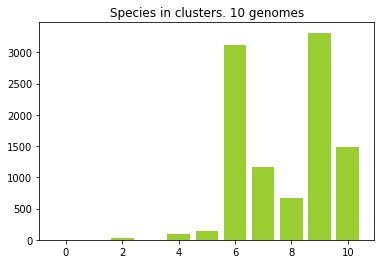

In [ ]:
plt.bar(range(np.min(genomes_bonus['# Species']), np.max(genomes_bonus['# Species']) + 1),
        height=[ genomes_bonus[genomes_bonus['# Species']==i].shape[0] for i in range(np.min(genomes_bonus['# Species']),
                               np.max(genomes_bonus['# Species'])+1) ], color='yellowgreen')
plt.title('Species in clusters. 10 genomes')

Text(0.5, 1.0, 'Genes in clusters. 10 genomes')

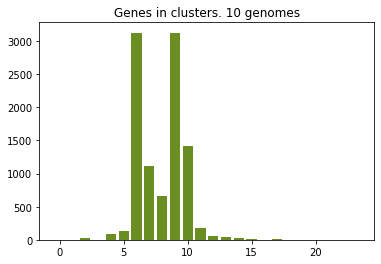

In [ ]:
plt.bar(range(np.min(genomes_bonus['Genes']), np.max(genomes_bonus['Genes']) + 1),
        height=[ genomes_bonus[genomes_bonus['Genes']==i].shape[0] for i in range(np.min(genomes_bonus['Genes']),
                               np.max(genomes_bonus['Genes'])+1) ], color='OliveDrab')
plt.title('Genes in clusters. 10 genomes')

# Ищем консервативность квадруплексов в промотерах


In [ ]:
file_names_intersect = [
                           '/content/drive/MyDrive/group_project_bioinf/quadruplex/Михайлова_Ксения/intersect',
                           '/content/drive/MyDrive/group_project_bioinf/quadruplex/Шилова_Ксения/intersect'
]
for i in range(2):
  lst = []
  for j in range(5):
    lst.append(file_names_intersect[i] + '/intersect' + str(j+1) + '.bed')
  file_names_intersect[i] = lst


In [ ]:
lines = []
for person in range(2):
  lines_p = []
  for j in range(5):
      file_name = file_names_intersect[person][j]
      file1 = open(file_name, "r")
      lines_file = file1.readlines()
      file1.close
      lines_p.append(lines_file)
      
  lines.append(lines_p)
  

In [ ]:
len(lines[1][0])

1370

In [ ]:
cols = genomes_bonus.columns[3:]
# проходимся по каждой строке
for i in range(genomes_bonus.shape[0]):
  if i% 100 == 0:
    print(i, 'out of', genomes_bonus.shape[0])
  for person in range(2):
    for j in range(5):
      # Считываем список белков
      prots = genomes_bonus[cols[person*5 + j]][i].split(',')
      genomes_bonus[cols[person*5 + j]][i] = [prots]
      # Если нет белков
      if prots[0] == '*':
        genomes_bonus[cols[person*5 + j]][i].append(0)
        continue
      # Если есть белки
      lines_file_name = lines[person][j]
      for prot in prots:
        # Надо их найти в соотвествующем файле intersect
        
        for line in lines_file_name:
          
          if prot in line:
            # если это первый белок с квадруплексом, то пишем единичку
            if genomes_bonus[cols[person*5 + j]][i] == [prots]:
              genomes_bonus[cols[person*5 + j]][i].append(1)

            genomes_bonus[cols[person*5 + j]][i].append({'quad': [line.split()[1], line.split()[2]], 
                                                          'score': line.split()[3],
                                                          'promoter': [line.split()[5], line.split()[6]],
                                                          'prot': line.split()[8], 
                                                          'gene': line.split()[9]})  

      if genomes_bonus[cols[person*5 + j]][i] == [prots]:
        genomes_bonus[cols[person*5 + j]][i].append(0)


In [ ]:
genomes_bonus

,# Species,Genes,Alg.-Conn.,e.faa,i.faa,r.faa,t.faa,v.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
0,10,10,1.000,"[[EGE08269.1], 0]","[[KAG8205321.1], 0]","[[EGD88434.1], 0]","[[EGD98773.1], 0]","[[EFE39545.1], 0]","[[XP_003669940.1], 0]","[[XP_003673140.1], 0]","[[EJS43772.1], 0]","[[XP_018222186.1], 0]","[[XP_033766318.1], 0]"
1,9,10,1.000,"[[EGE09583.1], 0]","[[KAG8211841.1], 0]","[[*], 0]","[[EGD94110.1], 1, {'quad': ['83861', '83886'],...","[[EFE38465.1], 0]","[[XP_003668469.1], 1, {'quad': ['465169', '465...","[[XP_003674903.1, XP_003675007.1], 0]","[[EJS43804.1], 0]","[[XP_018222057.1], 0]","[[XP_033766188.1], 0]"
2,9,9,1.000,"[[EGE06321.1], 0]","[[KAG8206147.1], 0]","[[EGD88489.1], 0]","[[EGE00744.1], 1, {'quad': ['40110', '40133'],...","[[EFE45207.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]"
3,10,10,1.000,"[[EGE09370.1], 0]","[[KAG8212437.1], 0]","[[EGD91596.1], 0]","[[EGD93174.1], 0]","[[EFE41246.1], 0]","[[XP_003669045.1], 1, {'quad': ['295382', '295...","[[XP_003677882.1], 0]","[[EJS41670.1], 0]","[[XP_018219354.1], 0]","[[XP_033769271.1], 0]"
4,9,9,0.168,"[[*], 0]","[[KAG8207719.1], 0]","[[EGD89722.1], 0]","[[EGD96583.1], 0]","[[EFE38599.1], 0]","[[XP_003668006.1], 0]","[[XP_003673930.1], 0]","[[EJS42115.1], 0]","[[XP_018219604.1], 0]","[[XP_033768672.1], 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10030,6,6,1.000,"[[*], 0]","[[KAG8205022.1], 1, {'quad': ['3105', '3128'],...","[[EGD91771.1], 0]","[[*], 0]","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]"
10031,6,6,1.000,"[[*], 0]","[[KAG8205022.1], 1, {'quad': ['3105', '3128'],...","[[EGD91771.1], 0]","[[*], 0]","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]"
10032,6,6,1.000,"[[*], 0]","[[KAG8205022.1], 1, {'quad': ['3105', '3128'],...","[[EGD91771.1], 0]","[[*], 0]","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]"
10033,6,6,1.000,"[[*], 0]","[[KAG8205022.1], 1, {'quad': ['3105', '3128'],...","[[EGD91771.1], 0]","[[*], 0]","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]"


In [ ]:
np.savetxt('drive/MyDrive/group_project_bioinf/quadruplex/genomes_bonus_2.txt', genomes_bonus.values, delimiter='\t', fmt = '%s')

Считаем в скольких видах есть квадруплекс в промотере хотя бы в одном гене

In [ ]:
sums = []
for i in range(genomes_bonus.shape[0]):
  if i% 100 == 0:
    print(i, 'out of', genomes_bonus.shape[0])
  summ = 0
  for person in range(2):
    for j in range(5):
      
      summ += genomes_bonus[cols[person*5 + j]][i][1] # тут либо 0, либо 1
  sums.append(summ)
genomes_bonus['Quadruplex in promoter'] = sums


In [ ]:
genomes_bonus = genomes_bonus[genomes_bonus['Quadruplex in promoter'] != 0]
genomes_bonus.index = range(genomes_bonus.shape[0])
genomes_bonus

,# Species,Genes,Alg.-Conn.,e.faa,i.faa,r.faa,t.faa,v.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa,Quadruplex in promoter
0,9,10,1.0,"[[EGE09583.1], 0]","[[KAG8211841.1], 0]","[[*], 0]","[[EGD94110.1], 1, {'quad': ['83861', '83886'],...","[[EFE38465.1], 0]","[[XP_003668469.1], 1, {'quad': ['465169', '465...","[[XP_003674903.1, XP_003675007.1], 0]","[[EJS43804.1], 0]","[[XP_018222057.1], 0]","[[XP_033766188.1], 0]",2
1,9,9,1.0,"[[EGE06321.1], 0]","[[KAG8206147.1], 0]","[[EGD88489.1], 0]","[[EGE00744.1], 1, {'quad': ['40110', '40133'],...","[[EFE45207.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]",1
2,10,10,1.0,"[[EGE09370.1], 0]","[[KAG8212437.1], 0]","[[EGD91596.1], 0]","[[EGD93174.1], 0]","[[EFE41246.1], 0]","[[XP_003669045.1], 1, {'quad': ['295382', '295...","[[XP_003677882.1], 0]","[[EJS41670.1], 0]","[[XP_018219354.1], 0]","[[XP_033769271.1], 0]",1
3,7,7,1.0,"[[*], 0]","[[KAG8205022.1], 1, {'quad': ['3105', '3128'],...","[[EGD91771.1], 0]","[[*], 0]","[[*], 0]","[[XP_003672241.1], 0]","[[XP_003674810.1], 0]","[[EJS42398.1], 0]","[[XP_018223702.1], 0]","[[XP_033765382.1], 0]",1
4,9,9,1.0,"[[EGE08891.1], 0]","[[KAG8206332.1], 0]","[[EGD86194.1], 1, {'quad': ['2292504', '229252...","[[EGE00786.1], 1, {'quad': ['41783', '41801'],...","[[EFE43186.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7371,6,6,1.0,"[[*], 0]","[[KAG8205022.1], 1, {'quad': ['3105', '3128'],...","[[EGD91771.1], 0]","[[*], 0]","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]",1
7372,6,6,1.0,"[[*], 0]","[[KAG8205022.1], 1, {'quad': ['3105', '3128'],...","[[EGD91771.1], 0]","[[*], 0]","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]",1
7373,6,6,1.0,"[[*], 0]","[[KAG8205022.1], 1, {'quad': ['3105', '3128'],...","[[EGD91771.1], 0]","[[*], 0]","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]",1
7374,6,6,1.0,"[[*], 0]","[[KAG8205022.1], 1, {'quad': ['3105', '3128'],...","[[EGD91771.1], 0]","[[*], 0]","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]",1


Ищем максимальный score и средний

In [ ]:
score_max = []
score_mean = []

for i in range(genomes_bonus.shape[0]):
  if i% 100 == 0:
    print(i, 'out of', genomes_bonus.shape[0])
  scores = []
  for person in range(2):
    for j in range(5):
      if genomes_bonus[cols[person*5 + j]][i][1] == 1:
        for k in range(2, len(genomes_bonus[cols[person*5 + j]][i])):
          scores.append(int(genomes_bonus[cols[person*5 + j]][i][k]['score']))
  
  score_max.append(np.max(scores))
  score_mean.append(np.mean(scores))
genomes_bonus['Mean Score'] = score_mean
genomes_bonus['Max Score'] = score_max

0 out of 7376
100 out of 7376
200 out of 7376
300 out of 7376
400 out of 7376
500 out of 7376
600 out of 7376
700 out of 7376
800 out of 7376
900 out of 7376
1000 out of 7376
1100 out of 7376
1200 out of 7376
1300 out of 7376
1400 out of 7376
1500 out of 7376
1600 out of 7376
1700 out of 7376
1800 out of 7376
1900 out of 7376
2000 out of 7376
2100 out of 7376
2200 out of 7376
2300 out of 7376
2400 out of 7376
2500 out of 7376
2600 out of 7376
2700 out of 7376
2800 out of 7376
2900 out of 7376
3000 out of 7376
3100 out of 7376
3200 out of 7376
3300 out of 7376
3400 out of 7376
3500 out of 7376
3600 out of 7376
3700 out of 7376
3800 out of 7376
3900 out of 7376
4000 out of 7376
4100 out of 7376
4200 out of 7376
4300 out of 7376
4400 out of 7376
4500 out of 7376
4600 out of 7376
4700 out of 7376
4800 out of 7376
4900 out of 7376
5000 out of 7376
5100 out of 7376
5200 out of 7376
5300 out of 7376
5400 out of 7376
5500 out of 7376
5600 out of 7376
5700 out of 7376
5800 out of 7376
5900 out 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
genomes_bonus.columns

Index(['# Species', 'Genes', 'Alg.-Conn.', 'e.faa', 'i.faa', 'r.faa', 't.faa',
       'v.faa', 'GCA_000227115.2.faa', 'GCA_000237345.1.faa',
       'GCA_000292725.1.faa', 'GCA_001298625.1.faa', 'GCA_002079055.1.faa',
       'Quadruplex in promoter', 'Mean Score', 'Max Score'],
      dtype='object')

In [ ]:
genomes_bonus_reindexed = genomes_bonus.reindex(columns=[
                              '# Species', 'Genes', 'Alg.-Conn.',
                              'Quadruplex in promoter', 'Mean Score', 'Max Score' ,
                               'e.faa', 'i.faa', 'r.faa', 't.faa',
       'v.faa', 'GCA_000227115.2.faa', 'GCA_000237345.1.faa',
       'GCA_000292725.1.faa', 'GCA_001298625.1.faa', 'GCA_002079055.1.faa'                          
])
genomes_bonus_reindexed

,# Species,Genes,Alg.-Conn.,Quadruplex in promoter,Mean Score,Max Score,e.faa,i.faa,r.faa,t.faa,v.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
0,9,10,1.0,2,85.000000,104,"[[EGE09583.1], 0]","[[KAG8211841.1], 0]","[[*], 0]","[[EGD94110.1], 1, {'quad': ['83861', '83886'],...","[[EFE38465.1], 0]","[[XP_003668469.1], 1, {'quad': ['465169', '465...","[[XP_003674903.1, XP_003675007.1], 0]","[[EJS43804.1], 0]","[[XP_018222057.1], 0]","[[XP_033766188.1], 0]"
1,9,9,1.0,1,153.000000,153,"[[EGE06321.1], 0]","[[KAG8206147.1], 0]","[[EGD88489.1], 0]","[[EGE00744.1], 1, {'quad': ['40110', '40133'],...","[[EFE45207.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]"
2,10,10,1.0,1,62.500000,69,"[[EGE09370.1], 0]","[[KAG8212437.1], 0]","[[EGD91596.1], 0]","[[EGD93174.1], 0]","[[EFE41246.1], 0]","[[XP_003669045.1], 1, {'quad': ['295382', '295...","[[XP_003677882.1], 0]","[[EJS41670.1], 0]","[[XP_018219354.1], 0]","[[XP_033769271.1], 0]"
3,7,7,1.0,1,61.000000,61,"[[*], 0]","[[KAG8205022.1], 1, {'quad': ['3105', '3128'],...","[[EGD91771.1], 0]","[[*], 0]","[[*], 0]","[[XP_003672241.1], 0]","[[XP_003674810.1], 0]","[[EJS42398.1], 0]","[[XP_018223702.1], 0]","[[XP_033765382.1], 0]"
4,9,9,1.0,2,84.666667,112,"[[EGE08891.1], 0]","[[KAG8206332.1], 0]","[[EGD86194.1], 1, {'quad': ['2292504', '229252...","[[EGE00786.1], 1, {'quad': ['41783', '41801'],...","[[EFE43186.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7371,6,6,1.0,1,61.000000,61,"[[*], 0]","[[KAG8205022.1], 1, {'quad': ['3105', '3128'],...","[[EGD91771.1], 0]","[[*], 0]","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]"
7372,6,6,1.0,1,61.000000,61,"[[*], 0]","[[KAG8205022.1], 1, {'quad': ['3105', '3128'],...","[[EGD91771.1], 0]","[[*], 0]","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]"
7373,6,6,1.0,1,61.000000,61,"[[*], 0]","[[KAG8205022.1], 1, {'quad': ['3105', '3128'],...","[[EGD91771.1], 0]","[[*], 0]","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]"
7374,6,6,1.0,1,61.000000,61,"[[*], 0]","[[KAG8205022.1], 1, {'quad': ['3105', '3128'],...","[[EGD91771.1], 0]","[[*], 0]","[[*], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]"


In [ ]:
genomes_bonus_sorted = genomes_bonus_reindexed.sort_values(['Quadruplex in promoter', 'Mean Score'], ascending=[False, False])
genomes_bonus_sorted

,# Species,Genes,Alg.-Conn.,Quadruplex in promoter,Mean Score,Max Score,e.faa,i.faa,r.faa,t.faa,v.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
1243,10,10,0.778,6,72.333333,113,"[[EGE05847.1], 0]","[[KAG8209399.1], 1, {'quad': ['46267', '46289'...","[[KFL60856.1], 1, {'quad': ['2138479', '213850...","[[EGD95545.1], 1, {'quad': ['380589', '380608'...","[[EFE40506.1], 1, {'quad': ['15607', '15625'],...","[[XP_003672560.1], 1, {'quad': ['288623', '288...","[[XP_003675482.1], 0]","[[EJS41398.1], 0]","[[XP_018218870.1], 1, {'quad': ['215637', '215...","[[XP_033769604.1], 0]"
728,10,10,1.000,5,69.583333,109,"[[EGE02708.1], 1, {'quad': ['468891', '468913'...","[[KAG8211120.1], 0]","[[EGD86419.1], 1, {'quad': ['2848521', '284854...","[[EGD94526.1], 1, {'quad': ['473315', '473337'...","[[EFE37743.1], 1, {'quad': ['14089', '14107'],...","[[XP_003672035.1], 0]","[[XP_003676210.1], 0]","[[EJS42544.1], 0]","[[XP_018220678.1], 1, {'quad': ['656639', '656...","[[XP_033768020.1], 0]"
445,10,10,1.000,5,69.454545,104,"[[EGE01081.1], 0]","[[KAG8212616.1], 0]","[[EGD85731.1], 1, {'quad': ['1186409', '118642...","[[EGD96073.1], 1, {'quad': ['80369', '80390'],...","[[EFE39116.1], 1, {'quad': ['14089', '14107'],...","[[XP_003668506.1], 0]","[[XP_003674943.1], 0]","[[EJS43942.1], 1, {'quad': ['499041', '499058'...","[[XP_018222836.1], 1, {'quad': ['531473', '531...","[[XP_033765989.1], 0]"
1359,10,10,0.212,5,68.285714,113,"[[EGE08418.1], 0]","[[KAG8209112.1], 0]","[[EGD84814.2], 0]","[[EGD93493.1], 1, {'quad': ['713441', '713463'...","[[EFE41280.1], 1, {'quad': ['33851', '33869'],...","[[XP_003670591.1], 1, {'quad': ['60219', '6023...","[[XP_003677263.1], 0]","[[EJS43339.1], 1, {'quad': ['43731', '43746'],...","[[XP_018221474.1], 1, {'quad': ['41320', '4134...","[[XP_033766906.1], 0]"
1818,10,10,1.000,5,67.857143,97,"[[EGE05638.1], 0]","[[KAG8210895.1], 0]","[[EGD90124.2], 1, {'quad': ['1016882', '101690...","[[EGD96412.1], 1, {'quad': ['127146', '127164'...","[[EFE42045.1], 1, {'quad': ['1408', '1424'], '...","[[XP_003668815.1], 0]","[[XP_003675263.1], 1, {'quad': ['1541814', '15...","[[EJS42865.1], 0]","[[XP_018221085.1], 0]","[[XP_033767673.1], 1, {'quad': ['565147', '565..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,9,9,1.000,1,51.000000,51,"[[EGE07397.1], 0]","[[KAG8207829.1], 0]","[[EGD89976.2], 0]","[[EGE00181.1], 1, {'quad': ['49608', '49639'],...","[[EFE41637.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]"
2856,9,9,0.500,1,51.000000,51,"[[EGE07504.1], 0]","[[KAG8209008.1], 0]","[[EGD85056.1], 0]","[[EGD93256.1], 1, {'quad': ['49608', '49639'],...","[[EFE38783.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]"
3011,9,9,1.000,1,51.000000,51,"[[EGE03026.1], 0]","[[KAG8210206.1], 0]","[[EGD91318.1], 1, {'quad': ['471468', '471499'...","[[EGE00316.1], 0]","[[EFE43586.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]"
5358,9,9,1.000,1,51.000000,51,"[[EGE01477.1], 0]","[[KAG8210259.1], 0]","[[EGD90458.1], 1, {'quad': ['471468', '471499'...","[[EGD99439.1], 0]","[[EFE37608.1], 0]","[[*], 0]","[[XP_003677020.1], 0]","[[EJS44867.1], 0]","[[XP_018224098.1], 0]","[[XP_033764462.1], 0]"


In [ ]:
np.savetxt('drive/MyDrive/group_project_bioinf/quadruplex/genomes_bonus_sorted.txt', genomes_bonus_sorted.values, delimiter='\t', fmt = '%s')

Text(0.5, 1.0, 'Mean Quadruplex Score in clusters')

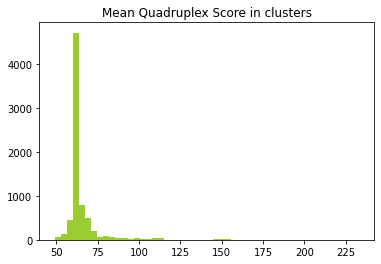

In [ ]:
plt.hist(genomes_bonus_sorted['Mean Score'], color='yellowgreen', bins=50)
plt.title('Mean Quadruplex Score in clusters')

Text(0.5, 1.0, 'Max Quadruplex Score in clusters')

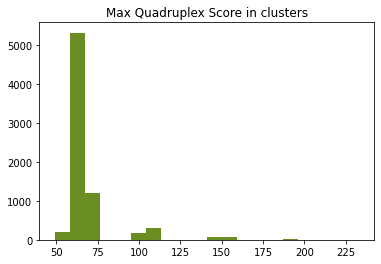

In [ ]:
plt.hist(genomes_bonus_sorted['Max Score'], color='olivedrab', bins=20)
plt.title('Max Quadruplex Score in clusters')

Text(0.5, 1.0, 'Quadruplex in promoter in clusters')

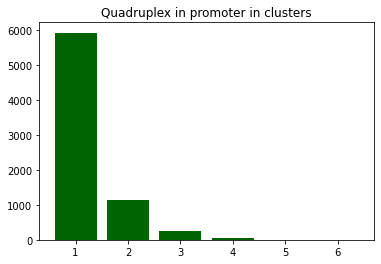

In [ ]:
plt.bar(range(np.min(genomes_bonus_sorted['Quadruplex in promoter']), np.max(genomes_bonus_sorted['Quadruplex in promoter']) + 1),
        height=[ genomes_bonus_sorted[genomes_bonus_sorted['Quadruplex in promoter']==i].shape[0] for i in range(np.min(genomes_bonus_sorted['Quadruplex in promoter']),
                               np.max(genomes_bonus_sorted['Quadruplex in promoter'])+1) ], color='darkgreen')
plt.title('Quadruplex in promoter in clusters')

# Кластеры по консервативности квадруплексов

In [ ]:
clusters = genomes_bonus_sorted[:10]
clusters

,# Species,Genes,Alg.-Conn.,Quadruplex in promoter,Mean Score,Max Score,e.faa,i.faa,r.faa,t.faa,v.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
1243,10,10,0.778,6,72.333333,113,"[[EGE05847.1], 0]","[[KAG8209399.1], 1, {'quad': ['46267', '46289'...","[[KFL60856.1], 1, {'quad': ['2138479', '213850...","[[EGD95545.1], 1, {'quad': ['380589', '380608'...","[[EFE40506.1], 1, {'quad': ['15607', '15625'],...","[[XP_003672560.1], 1, {'quad': ['288623', '288...","[[XP_003675482.1], 0]","[[EJS41398.1], 0]","[[XP_018218870.1], 1, {'quad': ['215637', '215...","[[XP_033769604.1], 0]"
728,10,10,1.000,5,69.583333,109,"[[EGE02708.1], 1, {'quad': ['468891', '468913'...","[[KAG8211120.1], 0]","[[EGD86419.1], 1, {'quad': ['2848521', '284854...","[[EGD94526.1], 1, {'quad': ['473315', '473337'...","[[EFE37743.1], 1, {'quad': ['14089', '14107'],...","[[XP_003672035.1], 0]","[[XP_003676210.1], 0]","[[EJS42544.1], 0]","[[XP_018220678.1], 1, {'quad': ['656639', '656...","[[XP_033768020.1], 0]"
445,10,10,1.000,5,69.454545,104,"[[EGE01081.1], 0]","[[KAG8212616.1], 0]","[[EGD85731.1], 1, {'quad': ['1186409', '118642...","[[EGD96073.1], 1, {'quad': ['80369', '80390'],...","[[EFE39116.1], 1, {'quad': ['14089', '14107'],...","[[XP_003668506.1], 0]","[[XP_003674943.1], 0]","[[EJS43942.1], 1, {'quad': ['499041', '499058'...","[[XP_018222836.1], 1, {'quad': ['531473', '531...","[[XP_033765989.1], 0]"
1359,10,10,0.212,5,68.285714,113,"[[EGE08418.1], 0]","[[KAG8209112.1], 0]","[[EGD84814.2], 0]","[[EGD93493.1], 1, {'quad': ['713441', '713463'...","[[EFE41280.1], 1, {'quad': ['33851', '33869'],...","[[XP_003670591.1], 1, {'quad': ['60219', '6023...","[[XP_003677263.1], 0]","[[EJS43339.1], 1, {'quad': ['43731', '43746'],...","[[XP_018221474.1], 1, {'quad': ['41320', '4134...","[[XP_033766906.1], 0]"
1818,10,10,1.000,5,67.857143,97,"[[EGE05638.1], 0]","[[KAG8210895.1], 0]","[[EGD90124.2], 1, {'quad': ['1016882', '101690...","[[EGD96412.1], 1, {'quad': ['127146', '127164'...","[[EFE42045.1], 1, {'quad': ['1408', '1424'], '...","[[XP_003668815.1], 0]","[[XP_003675263.1], 1, {'quad': ['1541814', '15...","[[EJS42865.1], 0]","[[XP_018221085.1], 0]","[[XP_033767673.1], 1, {'quad': ['565147', '565..."
2212,10,10,0.215,5,66.590909,104,"[[EGE08764.1], 0]","[[KAG8208668.1], 0]","[[EGD87442.1], 1, {'quad': ['2496403', '249642...","[[EGE00407.1], 1, {'quad': ['83861', '83886'],...","[[EFE43088.1], 0]","[[XP_003671296.2], 0]","[[XP_003675698.1], 0]","[[EJS42740.1], 1, {'quad': ['340795', '340810'...","[[XP_018220535.1], 1, {'quad': ['357733', '357...","[[XP_033767880.1], 1, {'quad': ['343794', '343..."
896,7,7,0.167,5,62.666667,70,"[[*], 0]","[[KAG8205022.1], 1, {'quad': ['3105', '3128'],...","[[EGD91771.1], 0]","[[*], 0]","[[*], 0]","[[XP_003669442.1], 0]","[[XP_003674686.1], 1, {'quad': ['380092', '380...","[[EJS44739.1], 1, {'quad': ['617547', '617570'...","[[XP_018223238.1], 1, {'quad': ['809308', '809...","[[XP_033764800.1], 1, {'quad': ['652640', '652..."
1046,10,10,1.000,5,61.750000,73,"[[EGE04469.1], 0]","[[KAG8207370.1], 0]","[[EGD91162.2], 1, {'quad': ['73025', '73055'],...","[[EGD96843.1], 1, {'quad': ['144781', '144796'...","[[EFE37544.1], 0]","[[XP_003672727.1], 0]","[[XP_003676856.1], 1, {'quad': ['21946', '2196...","[[EJS43198.1], 1, {'quad': ['43731', '43746'],...","[[XP_018221145.1], 1, {'quad': ['53039', '5306...","[[XP_033767100.1], 0]"
6695,7,7,0.400,5,61.166667,70,"[[*], 0]","[[KAG8205022.1], 1, {'quad': ['3105', '3128'],...","[[EGD91771.1], 0]","[[*], 0]","[[*], 0]","[[XP_003670864.1], 0]","[[XP_003677464.1], 1, {'quad': ['400930', '400...","[[EJS42009.1], 1, {'quad': ['350541', '350562'...","[[XP_018219741.1], 1, {'quad': ['357733', '357...","[[XP_033768806.1], 1, {'quad': ['360860', '360..."
13,10,11,0.300,4,91.333333,193,"[[EGE04341.1], 0]","[[KAG8208280.1], 0]","[[EGD92289.2, KFL63067.1], 1, {'quad': ['15345...","[[EGD97455.1], 1, {'quad': ['34250', '34274'],...","[[EFE41120.1], 1, {'quad': ['206

In [ ]:
np.savetxt('drive/MyDrive/group_project_bioinf/quadruplex/clusters.txt', clusters.values, delimiter='\t', fmt = '%s')

# Тепловая карта Квадруплексы

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
names = ['# Species', 'Genes', 'Alg.-Conn.',
           'Quadruplex in promoter', 'Mean Score', 'Max Score' ,
           'e.faa', 'i.faa', 'r.faa', 't.faa',
       'v.faa', 'GCA_000227115.2.faa', 'GCA_000237345.1.faa',
       'GCA_000292725.1.faa', 'GCA_001298625.1.faa', 'GCA_002079055.1.faa']

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

columns_species = {
              
        'e.faa' : 'Trichophyton equinum CBS 127.97',
        'i.faa' : 'Trichophyton interdigitale',
        'r.faa' : 'Trichophyton rubrum CBS 118892',
        't.faa' : 'Trichophyton tonsurans CBS 112818',
        'v.faa' : 'Trichophyton verrucosum HKI 0517',
       
        'GCA_000227115.2.faa' : 'Naumovozyma dairenensis CBS 421',
        'GCA_000237345.1.faa' : 'Naumovozyma castellii CBS 4309',
        'GCA_000292725.1.faa' : 'Saccharomyces arboricola H-6',
        'GCA_001298625.1.faa' : 'Saccharomyces eubayanus',
        'GCA_002079055.1.faa' : 'Saccharomyces paradoxus'
       }

new_cols = []
clusters = pd.read_csv('clusters.txt', names=names, sep='\t')
df = clusters.drop(columns=['# Species', 'Genes', 'Alg.-Conn.', 'Quadruplex in promoter', 
                            'Mean Score','Max Score'])

for i in df.columns:
  new_cols.append(columns_species[i])

df.columns = new_cols
df = df.T

for index, row in df.iterrows():
  new_row = []
  for e in row:
    e = e.split("'")
    if e[1] == '*':
      e = float(1)
    else:
      if '0' in e[2]:
        e = 0
      else:
        try:
          e = float(e[11])
        except ValueError:
          e = float(e[13])
    new_row.append(e)
  df.loc[index] = new_row

df = df.replace(0, np.nan)
print(df)

                                       0      1     2      3     4      5  \
Trichophyton equinum CBS 127.97      NaN  109.0   NaN    NaN   NaN    NaN   
Trichophyton interdigitale          63.0    NaN   NaN    NaN   NaN    NaN   
Trichophyton rubrum CBS 118892      52.0   56.0  73.0    NaN  60.0   70.0   
Trichophyton tonsurans CBS 112818  113.0   63.0  64.0   63.0  69.0  104.0   
Trichophyton verrucosum HKI 0517    69.0   69.0  69.0   69.0  72.0    NaN   
Naumovozyma dairenensis CBS 421     73.0    NaN   NaN  113.0   NaN    NaN   
Naumovozyma castellii CBS 4309       NaN    NaN   NaN    NaN  63.0    NaN   
Saccharomyces arboricola H-6         NaN    NaN  70.0   73.0   NaN   73.0   
Saccharomyces eubayanus             63.0   61.0  57.0   56.0   NaN   70.0   
Saccharomyces paradoxus              NaN    NaN   NaN    NaN  64.0   61.0   

                                      6     7     8      9  
Trichophyton equinum CBS 127.97     1.0   NaN   1.0    NaN  
Trichophyton interdigitale    

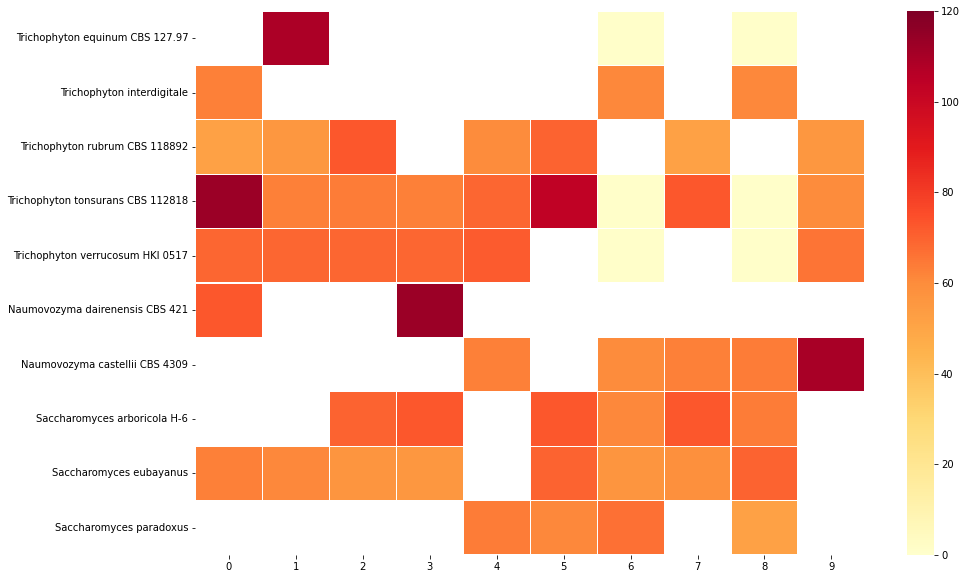

In [ ]:
cmap =  sns.color_palette("YlOrRd", as_cmap=True)
cmap.set_under('gray')
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
sns.heatmap(df, vmax = 120, vmin=0, linewidth=0.05, cmap=cmap, mask=df.isnull())

# Корреляция

In [ ]:
import numpy as np

In [ ]:
gc = [36.3, 45.8, 33.7, 32.2, 33.3, 47.2, 42.5, 44.3, 45.1, 46.7,  49.4, 49.3, 47.9]
zdna = [3622, 19026,4443, 6046, 5467, 42003, 22475, 13887, 22109, 36547,  28353, 28766, 21991]

In [ ]:
len(zdna)

13

In [ ]:
np.corrcoef(gc, zdna)

array([[1.        , 0.84421573],
       [0.84421573, 1.        ]])

# Выравнивание ZDNA

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
clusters = pd.read_csv('drive/MyDrive/group_project_bioinf/clusters.txt', names=['# Species', 'Genes', 'Alg.-Conn.', 'ZDNA in promoter', 'Mean ZH-Score',
       'Max ZH-Score',
       'protein_1.faa', 'protein_2.faa', 'protein_3.faa', 'protein_4.faa',
       'protein_5.faa', 'protein1.faa', 'protein2.faa', 'protein3.faa',
       'protein4.faa', 'protein5.faa', 'protein_aa.faa', 'protein_ar.faa',
       'protein_oa.faa', 'protein_oh.faa', 'protein_op.faa',
       'Bipolaris_maydis_ATCC_48331.faa', 'Bipolaris_oryzae_ATCC_44560.faa',
       'Bipolaris_sorokiniana_ND90Pr.faa', 'Bipolaris_victoriae_FI3.faa',
       'Bipolaris_zeicola_26-R-13.faa', 'e.faa', 'i.faa', 'r.faa', 't.faa',
       'v.faa', 'GCA_001664025.1.faa', 'GCA_001747045.1.faa',
       'GCA_001749795.1.faa', 'GCA_017311265.1.faa', 'GCA_017311285.1.faa',
       'GCA_000149555.1_ASM14955v1_protein.faa',
       'GCA_000303195.2_FP7_protein.faa',
       'GCA_019609905.1_ASM1960990v1_protein.faa',
       'GCA_019915245.1_ASM1991524v1_protein.faa',
       'GCA_900007375.1_ASM90000737v1_protein.faa', 'Ach.faa', 'Afl.faa',
       'Afu.faa', 'Alu.faa', 'Apu.faa',
       'GCF_000026945.1_ASM2694v1_protein.faa',
       'GCF_000091025.4_ASM9102v4_protein.faa',
       'GCF_000182965.3_ASM18296v3_protein.faa',
       'GCF_000235365.1_ASM23536v1_protein.faa',
       'GCF_000315875.1_ASM31587v1_protein.faa', 'GCA_000227115.2.faa',
       'GCA_000237345.1.faa', 'GCA_000292725.1.faa', 'GCA_001298625.1.faa',
       'GCA_002079055.1.faa'], sep='\t')
clusters

,# Species,Genes,Alg.-Conn.,ZDNA in promoter,Mean ZH-Score,Max ZH-Score,protein_1.faa,protein_2.faa,protein_3.faa,protein_4.faa,...,GCF_000026945.1_ASM2694v1_protein.faa,GCF_000091025.4_ASM9102v4_protein.faa,GCF_000182965.3_ASM18296v3_protein.faa,GCF_000235365.1_ASM23536v1_protein.faa,GCF_000315875.1_ASM31587v1_protein.faa,GCA_000227115.2.faa,GCA_000237345.1.faa,GCA_000292725.1.faa,GCA_001298625.1.faa,GCA_002079055.1.faa
0,49,49,0.476,32,22037.523130,302785.5,"[['XP_003955368.1'], 0]","[['XP_022464997.1'], 1, {'zdna': ['150124', '1...","[['XP_041405690.1'], 1, {'zdna': ['662843', '6...","[['SMN19762.1'], 0]",...,"[['XP_002417029.1'], 1, {'zdna': ['823649', '8...","[['NP_982748.1'], 1, {'zdna': ['36294', '36308...","[['XP_713631.2'], 1, {'zdna': ['802914', '8029...","[['XP_003647669.1'], 1, {'zdna': ['931241', '9...","[['XP_003867776.1'], 0]","[['XP_003670945.1'], 0]","[['XP_003677372.1'], 0]","[['EJS42080.1'], 1, {'zdna': ['201984', '20199...","[['XP_018219660.1'], 1, {'zdna': ['207296', '2...","[['XP_033768726.1'], 1, {'zdna': ['212074', '2..."
1,48,49,0.667,29,64996.572626,941334.2,"[['*'], 0]","[['XP_022466876.1'], 0]","[['XP_041408807.1'], 0]","[['SMN21379.1'], 1, {'zdna': ['45938', '45948'...",...,"[['XP_002417050.1'], 1, {'zdna': ['878823', '8...","[['NP_983449.2'], 1, {'zdna': ['441375', '4413...","[['XP_711973.2'], 1, {'zdna': ['851066', '8510...","[['XP_003648354.1'], 1, {'zdna': ['517767', '5...","[['XP_003867982.1'], 1, {'zdna': ['1738523', '...","[['XP_003669277.1'], 1, {'zdna': ['854692', '8...","[['XP_003677065.1'], 1, {'zdna': ['450580', '4...","[['EJS43014.1'], 1, {'zdna': ['403858', '40387...","[['XP_018221305.1'], 1, {'zdna': ['409344', '4...","[['XP_033767262.1'], 1, {'zdna': ['413443', '4..."
2,49,49,1.000,29,59047.386632,941334.2,"[['XP_003958047.1'], 0]","[['XP_022464318.1'], 1, {'zdna': ['580917', '5...","[['XP_041408407.1'], 0]","[['SMN21927.1'], 0]",...,"[['XP_002416845.1'], 1, {'zdna': ['399290', '3...","[['NP_986676.2'], 1, {'zdna': ['1054453', '105...","[['XP_712962.1'], 1, {'zdna': ['384844', '3848...","[['XP_003647990.1'], 1, {'zdna': ['716670', '7...","[['XP_003867941.1'], 1, {'zdna': ['1674087', '...","[['XP_003669836.1'], 0]","[['XP_003673525.1'], 0]","[['EJS43771.1'], 1, {'zdna': ['409509', '40951...","[['XP_018222184.1'], 1, {'zdna': ['414231', '4...","[['XP_033766316.1'], 0]"
3,50,50,1.000,29,44270.848371,941334.2,"[['XP_003958789.1'], 0]","[['XP_022466494.1'], 1, {'zdna': ['307054', '3...","[['XP_041404757.1'], 0]","[['SMN22127.1'], 0]",...,"[['XP_002418994.1'], 1, {'zdna': ['74273', '74...","[['NP_983539.2'], 1, {'zdna': ['589900', '5899...","[['XP_717785.1'], 1, {'zdna': ['72176', '72186...","[['XP_003644951.1'], 1, {'zdna': ['780921', '7...","[['XP_003869653.1'], 0]","[['XP_003670300.1'], 1, {'zdna': ['498992', '4...","[['XP_003675524.1'], 1, {'zdna': ['309871', '3...","[['EJS41408.1'], 0]","[['XP_018218886.1'], 0]","[['XP_033769619.1'], 0]"
4,50,50,0.800,29,38003.635897,941334.2,"[['XP_003954642.1'], 0]","[['XP_022464753.1'], 1, {'zdna': ['490175', '4...","[['XP_041406277.1'], 0]","[['SMN19151.1'], 0]",...,"[['XP_002418758.1'], 1, {'zdna': ['1781569', '...","[['NP_982903.1'], 1, {'zdna': ['312096', '3121...","[['XP_714453.1'], 1, {'zdna': ['1763632', '176...","[['XP_003648046.1'], 1, {'zdna': ['830312', '8...","[['XP_003868523.1'], 1, {'zdna': ['525102', '5...","[['XP_003671641.1'], 0]","[['XP_003673725.1'], 0]","[['EJS42383.1'], 1, {'zdna': ['425543', '42555...","[['XP_018220150.1'], 1, {'zdna': ['446394', '4...","[['XP_033768397.1'], 1, {'zdna': ['438368', '4..."
5,48,48,1.000,29,37989.972827,941334.2,"[['XP_003956089.1'], 0]","[['XP_022462685.1'], 1, {'zdna': ['1253653', '...","[['XP_041407924.1'], 1, {'zdna': ['265926', '2...","[['SMN22335.1'], 1, {'zdna': ['237331', '23733...",...,"[['XP_002418821.1'], 1, {'zdna': ['1921550', '...","[['NP_986920.1'], 1, {'zdna': ['1538263', '153...","[['XP_714267.2'], 1, {'zdna': ['1904632', '190...","[['XP_003646278.1'], 1, {'zdna': ['849055', '8.

In [ ]:
columns_species = {
       'protein_1.faa': 'Kazachstania africana CBS 2517',
       'protein_2.faa' : 'Kazachstania naganishii CBS 8797',
       'protein_3.faa' : 'Kazachstania barnettii]',
       'protein_4.faa' : 'Kazachstania saulgeensis',
       'protein_5.faa' : 'Kazachstania exigua',

        'protein1.faa' : 'Lachancea fermentati',
        'protein2.faa' : 'Lachancea lanzarotensis',
        'protein3.faa' : 'Lachancea mirantina',
        'protein4.faa' : 'Lachancea quebecensis',
        'protein5.faa' : 'Lachancea thermotolerans CBS 6340',
        
        'protein_aa.faa' : 'Alternaria atra',
        'protein_ar.faa' : 'Alternaria rosae',
        'protein_oa.faa' : 'Ogataea angusta',
        'protein_oh.faa' : 'Ogataea haglerorum',
        'protein_op.faa' : 'Ogataea polymorpha',

        'Bipolaris_maydis_ATCC_48331.faa' : 'Bipolaris maydis ATCC 48331',
        'Bipolaris_oryzae_ATCC_44560.faa' : 'Bipolaris oryzae ATCC 44560',
        'Bipolaris_sorokiniana_ND90Pr.faa' : 'Bipolaris sorokiniana ND90Pr',
        'Bipolaris_victoriae_FI3.faa' : 'Bipolaris victoriae FI3',
        'Bipolaris_zeicola_26-R-13.faa' : 'Bipolaris zeicola 26-R-13',
       
        'e.faa' : 'Trichophyton equinum CBS 127.97',
        'i.faa' : 'Trichophyton interdigitale',
        'r.faa' : 'Trichophyton rubrum CBS 118892',
        't.faa' : 'Trichophyton tonsurans CBS 112818',
        'v.faa' : 'Trichophyton verrucosum HKI 0517',
       
        'GCA_001664025.1.faa' : 'Hanseniaspora valbyensis NRRL Y-1626',
        'GCA_001747045.1.faa' : 'Hanseniaspora osmophila',
        'GCA_001749795.1.faa' : 'Hanseniaspora opuntiae',
        'GCA_017311265.1.faa' : 'Pneumocystis canis',
        'GCA_017311285.1.faa' : 'Pneumocystis oryctolagi',

        'GCA_000149555.1_ASM14955v1_protein.faa' : 'Fusarium verticillioides 7600',
        'GCA_000303195.2_FP7_protein.faa' : 'Fusarium pseudograminearum CS3096',
        'GCA_019609905.1_ASM1960990v1_protein.faa' : 'Fusarium poae',
        'GCA_019915245.1_ASM1991524v1_protein.faa' : 'Fusarium musae',
        'GCA_900007375.1_ASM90000737v1_protein.faa' : 'Fusarium venenatum',
       
        'Ach.faa' : 'Aspergillus chevalieri',
        'Afl.faa' : 'Aspergillus flavus NRRL3357',
        'Afu.faa' : 'Aspergillus fumigatus Af293',
        'Alu.faa' : 'Aspergillus luchuensis',
        'Apu.faa' : 'Aspergillus puulaauensis',

        'GCF_000026945.1_ASM2694v1_protein.faa' : 'Candida dubliniensis CD36',
        'GCF_000091025.4_ASM9102v4_protein.faa' : 'Eremothecium gossypii ATCC 10895',
        'GCF_000182965.3_ASM18296v3_protein.faa' : 'Candida albicans SC5314',
        'GCF_000235365.1_ASM23536v1_protein.faa' : 'Eremothecium cymbalariae DBVPG#7215',
        'GCF_000315875.1_ASM31587v1_protein.faa' : 'Candida orthopsilosis Co 90-125',
       
        'GCA_000227115.2.faa' : 'Naumovozyma dairenensis CBS 421',
        'GCA_000237345.1.faa' : 'Naumovozyma castellii CBS 4309',
        'GCA_000292725.1.faa' : 'Saccharomyces arboricola H-6',
        'GCA_001298625.1.faa' : 'Saccharomyces eubayanus',
        'GCA_002079055.1.faa' : 'Saccharomyces paradoxus'
       }


In [ ]:
file_names_fna = [
                           '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Коновалов_Егор/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Крымов_Александр/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Михайлова_Ксения/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Петропавловский_Андрей/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Сесикова_Ксения/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Чекова_Милена/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Шагалкина_Дарья/fna',
                           '/content/drive/MyDrive/group_project_bioinf/Шилова_Ксения/fna'
]
for i in range(10):
  lst = []
  for j in range(5):
    lst.append(file_names_fna[i] + '/'+ str(j+1) + '.fna')
  file_names_fna[i] = lst
file_names_fna

[['/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/fna/1.fna',
  '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/fna/2.fna',
  '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/fna/3.fna',
  '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/fna/4.fna',
  '/content/drive/MyDrive/group_project_bioinf/Абу_Аль_Лабан_Надя/fna/5.fna'],
 ['/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/fna/1.fna',
  '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/fna/2.fna',
  '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/fna/3.fna',
  '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/fna/4.fna',
  '/content/drive/MyDrive/group_project_bioinf/Зелина_Полина/fna/5.fna'],
 ['/content/drive/MyDrive/group_project_bioinf/Коновалов_Егор/fna/1.fna',
  '/content/drive/MyDrive/group_project_bioinf/Коновалов_Егор/fna/2.fna',
  '/content/drive/MyDrive/group_project_bioinf/Коновалов_Егор/fna/3.fna',
  '/content/drive/MyD

In [ ]:
clust = clusters.T[7].T [6:]
clust

protein_1.faa                                                          [['XP_003956420.1'], 0]
protein_2.faa                                [['XP_022465439.1'], 1, {'zdna': ['300967', '3...
protein_3.faa                                                          [['XP_041404455.1'], 0]
protein_4.faa                                                              [['SMN18503.1'], 0]
protein_5.faa                                [['KAG0667811.1'], 1, {'zdna': ['27772', '2778...
protein1.faa                                                               [['SCU87808.1'], 0]
protein2.faa                                                               [['CUS22981.1'], 0]
protein3.faa                                                           [['XP_022626780.1'], 0]
protein4.faa                                                               [['SCW01077.1'], 0]
protein5.faa                                 [['XP_002553760.1'], 1, {'zdna': ['594593', '5...
protein_aa.faa                               [['XP

In [ ]:
res_file = []
for i in range(len(clust)):
  el=clust[i]
  file_name = file_names_fna[i//5][i%5]
  file1 = open(file_name, "r")
  lines = np.array(file1.readlines())
  lines = lines[['>' not in line for line in lines]]
  line = ''.join(lines)
  line = line.replace('\n', '')
  # Запоминаем где zdna
  for j in range(1, len(el.split('\'zdna\': '))):
      gene = el.split('\'gene\': ')[j].split(',')[0].replace('\'', '').split('}')[0]
      zdna = el.split('\'zdna\': ')[j].split(']')[0].replace('\'', '').replace('[', '').split(', ')
      zdna = [int(zdna[0]), int(zdna[1])]
      #print(len(line))
      res_file.append('>' + gene + ' ' + columns_species[clust.index[i]] + '\n')
      res_file.append(line[zdna[0]:(zdna[1]+1)] + '\n')
  
  file1.close  

In [ ]:
f = open( 'clust7_zdna.fasta', 'w' )
f.write(''.join(res_file));
f.close()